# hIAPP WT hIAPP in the Presence of YX-I-1 REST2 Simulation Analysis

Simulation Analysis of hIAPP WT in the presence of inhibitor YX-I-1 REST2 300 K replica at 2.4 microseconds. There was a total of 20 replicas run in a temperature ladder from 300 - 500 K.

In [2]:
import sys 
import os
sys.path.append(os.path.abspath("../scripts"))
from tools import *
from custom_matplotlib_formats import set_custom_formats
from scipy.stats import pearsonr, spearmanr

In [3]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.set_style("whitegrid")
set_custom_formats()

In [4]:
outdir = './outdir_wt_hiapp_yxi1/'
!mkdir $outdir
pdb = '../structure_files/hiapp_wt_yxi1.gro'
rep0 = "../trjs/hiapp_wt_yxi1.xtc"
helixpdb = '../structure_files/helix_wt.pdb'
apodir = '../wt_hiapp_apo/outdir_wt_hiapp_apo/'

# these are the indices of the carbon atoms in the rings and also hydrogen bond donors
# you can use VMD to get these indices too
# Define Aromatic Rings in YX-I-1
# ring 1 benzene on benzotriazole, ring 2 triazole on benzotriazole, ring 3 is phenyl substituted group.
ligand_rings = [[537,538,539,540,541,542,543,544,545], [550,551,552,553,554,555]]
# Definie Hydrogen Bond Donors in YX-I-1
lig_hbond_donors = [[549,575], [565,594]]

# Simulation Length in microseconds
print("outdir:", outdir)
print("pdb:", pdb)
print("helix pdb:", helixpdb)
print("trjaectory:", rep0)


mkdir: ./outdir_wt_hiapp_yxi1/: File exists
outdir: ./outdir_wt_hiapp_yxi1/
pdb: ../structure_files/hiapp_wt_yxi1.gro
helix pdb: ../structure_files/helix_wt.pdb
trjaectory: ../trjs/hiapp_wt_yxi1.xtc


In [5]:
trj = md.load(rep0, top=pdb, stride=1)
trj.center_coordinates()

top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames = trj.n_frames
n_frames = trj.n_frames
sim_length = trj.n_frames * 80 / 1e6

sequence_ol_wt = ['K', 'C', 'N', 'T', 'A', 'T', 'C', 'A', 'T', 'Q', 'R', 'L', 'A', 'N', 'F', 'L', 'V', 'H', 'S', 'S', 'N', 'N', 'F', 'G', 'A', 'I', 'L', 'S', 'S', 'T', 'N', 'V', 'G', 'S', 'N', 'T', 'Y', '      NH$_2$']

In [6]:
print("The simulation length of this trajectory is %f ns"%sim_length)

The simulation length of this trajectory is 2.440000 ns


In [7]:
nres = []
for res in trj.topology.residues:
    nres.append(res.resSeq)
sequence = (' %s' % [residue for residue in trj.topology.residues])
resname = (' %s' % [residue.name for residue in trj.topology.residues])
resindex = (' %s' % [residue.index for residue in trj.topology.residues])
prot_top = top.subset(top.select('protein'))
prot_res = []
for res in prot_top.residues:
    prot_res.append(res.resSeq)
prot_resname = (' %s' % [residue.name for residue in prot_top.residues])
residues = len(set(prot_res))

#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of protein residues: %d\n" % len(set(prot_res)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue index: %s\n" % resindex)

residues = 38
residue_offset = 1
prot_res_renum = np.asarray(prot_res)
print(prot_res_renum)
residue_number = range(0, residues)
residue_number_offsetres = range(residue_offset, residue_offset+residues)
print("Residue Number Range:", residue_number)


** SYSTEM INFO **

Number of atoms: 598

Number of residues: 39

Number of protein residues: 37

Number of frames: 30500

Starting frame: 0

Last frame: 30500

sequence:  [LYS1, CYS2, ASN3, THR4, ALA5, THR6, CYS7, ALA8, THR9, GLN10, ARG11, LEU12, ALA13, ASN14, PHE15, LEU16, VAL17, HIS18, SER19, SER20, ASN21, ASN22, PHE23, GLY24, ALA25, ILE26, LEU27, SER28, SER29, THR30, ASN31, VAL32, GLY33, SER34, ASN35, THR36, TYR37, NH238, LIG39]

residue names:  ['LYS', 'CYS', 'ASN', 'THR', 'ALA', 'THR', 'CYS', 'ALA', 'THR', 'GLN', 'ARG', 'LEU', 'ALA', 'ASN', 'PHE', 'LEU', 'VAL', 'HIS', 'SER', 'SER', 'ASN', 'ASN', 'PHE', 'GLY', 'ALA', 'ILE', 'LEU', 'SER', 'SER', 'THR', 'ASN', 'VAL', 'GLY', 'SER', 'ASN', 'THR', 'TYR', 'NH2', 'LIG']

residue index:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 3

/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:78: RuntimeWarning: invalid value encountered in divide
  M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]


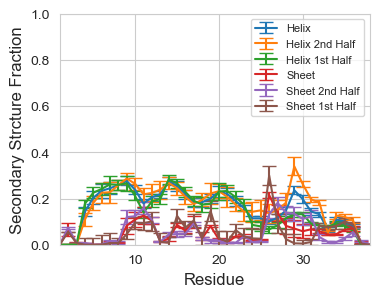

In [8]:
trjH1 = md.load(rep0, top=pdb, stride=1)
H1 = top.select("resid 0 to 37")
trjH1.restrict_atoms(H1)
trjH1.center_coordinates()
frames = trjH1.n_frames
half = int(np.floor(frames/2))

h_res = []
for res in trjH1.topology.residues:
    h_res.append(res.resSeq)
h_residues = len(set(h_res))
hres_renum = np.asarray(h_res)


frames = trj.n_frames
half = int(np.floor(frames/2))

dsspH1 = md.compute_dssp(trjH1, simplified=True)
dsspH1_h2 = md.compute_dssp(trjH1[half:-1], simplified=True)
dsspH1_h1 = md.compute_dssp(trjH1[0:half], simplified=True)

H1_H, H1_E = dssp_convert(dsspH1)
H1_H_h2, H1_E_h2 = dssp_convert(dsspH1_h2)
H1_H_h1, H1_E_h1 = dssp_convert(dsspH1_h1)

plt.errorbar(hres_renum, H1_H[:, 0], yerr=H1_H[:, 1], capsize=5, label='Helix')
plt.errorbar(
    hres_renum, H1_H_h2[:, 0], yerr=H1_H_h2[:, 1], capsize=5, label='Helix 2nd Half')
plt.errorbar(
    hres_renum, H1_H_h1[:, 0], yerr=H1_H_h1[:, 1], capsize=5, label='Helix 1st Half')
plt.errorbar(hres_renum, H1_E[:, 0], yerr=H1_E[:, 1], capsize=5, label='Sheet')
plt.errorbar(
    hres_renum, H1_E_h1[:, 0], yerr=H1_E_h1[:, 1], capsize=5, label='Sheet 2nd Half')
plt.errorbar(
    hres_renum, H1_E_h2[:, 0], yerr=H1_H_h2[:, 1], capsize=5, label='Sheet 1st Half')

plt.ylim(0, 1.0)
plt.xlim(1,38)
plt.legend(loc="upper right")
plt.xlabel('Residue')
plt.ylabel('Secondary Strcture Fraction')

# save the propensities 
np.savetxt(outdir+'Hprop.err.dat',
           np.column_stack((hres_renum, H1_H[:, 0], H1_H[:, 1])))
np.savetxt(outdir+'Eprop.err.dat',
           np.column_stack((hres_renum, H1_E[:, 0], H1_E[:, 1])))

These secondary structure propensities of the 300K temperature replica seem to be well-converged shown in the block analysis above. For further information on the convergence analyses of all 20 replicas of this system please take a look at the hiapp_20rep_analyses folder. 

In [9]:
# report helicity 
dsspH = np.copy(dsspH1)
dsspH[dsspH == 'H'] = 1
dsspH[dsspH == 'E'] = 0
dsspH[dsspH == 'C'] = 0
dsspH[dsspH == 'NA'] = 0
dsspH = dsspH.astype(int)
TotalH = np.sum(dsspH, axis=1)
np.save(outdir+"H_total" + ".npy", TotalH)

# report sheet
dsspE = np.copy(dsspH1)
dsspE[dsspE == 'H'] = 0
dsspE[dsspE == 'E'] = 1
dsspE[dsspE == 'C'] = 0
dsspE[dsspE == 'NA'] = 0
dsspE = dsspE.astype(int)
TotalE = np.sum(dsspE, axis=1)
np.save(outdir+"E_total" + ".npy", TotalE)


print("Average Helical Residues:%6.3lf" %
      (np.average(TotalH)), "+_%6.3lf" % ((block(TotalH)**.5)))
print("Average Fraction Helix:%6.3lf" %
      (np.average(TotalH)/37), "+_%6.3lf" % ((block(TotalH)**.5)/37))

print("Average Sheet Residues:%6.3lf" %
      (np.average(TotalE)), "+_%6.3lf" % ((block(TotalH)**.5)))
print("Average Fraction Sheet:%6.3lf" %
      (np.average(TotalE)/37), "+_%6.3lf" % ((block(TotalH)**.5)/37))

Average Helical Residues: 5.974 +_ 0.279
Average Fraction Helix: 0.161 +_ 0.008
Average Sheet Residues: 1.982 +_ 0.279
Average Fraction Sheet: 0.054 +_ 0.008


In [10]:
# Compute Phi and Psi
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
phi_label = []
for i_phi in range(0, indices_phi.shape[0]):
    resindex = trj.topology.atom(indices_phi[i_phi][3]).residue.resSeq
    phi_label.append(resindex)
phi_label = np.array(phi_label)
psi_label = []
for i_psi in range(0, indices_psi.shape[0]):
    resindex = trj.topology.atom(indices_psi[i_psi][3]).residue.resSeq
    psi_label.append(resindex)
psi_label = np.array(psi_label)
phipsi = []
for i in range(0, len(psi_label)-2):
    current_phipsi = np.column_stack((phis[:, i+1], psis[:, i]))
    phipsi.append(current_phipsi)
phipsi_array = np.array(phipsi)

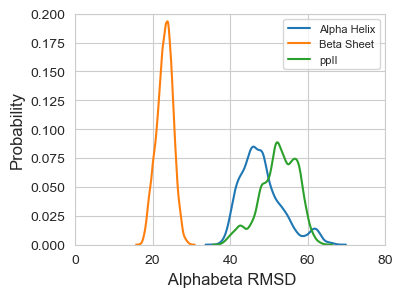

In [11]:
def alphabeta_rmsd(phi, psi, phi_ref, psi_ref):
    alphabetarmsd = np.sum(0.5*(1+np.cos(psi-psi_ref)),
                           axis=1)+np.sum(0.5*(1+np.cos(phi-phi_ref)), axis=1)
    return alphabetarmsd


Phi_all = phis
Psi_all = psis
alphabeta_alpharight = alphabeta_rmsd(Phi_all, Psi_all, -1.05, -0.79)
alphabeta_betasheet = alphabeta_rmsd(Phi_all, Psi_all, 2.36, -2.36)
alphabeta_ppII = alphabeta_rmsd(Phi_all, Psi_all, -1.31, 2.71)

sns.kdeplot(data=alphabeta_alpharight, label='Alpha Helix')
sns.kdeplot(data=alphabeta_betasheet, label='Beta Sheet')
sns.kdeplot(data=alphabeta_ppII, label='ppII')

plt.xlabel(' Alphabeta RMSD')
plt.xlim(0, 80)
plt.ylim(0, 0.20)

plt.ylabel('Probability')
plt.legend(loc='upper right')

plt.show()

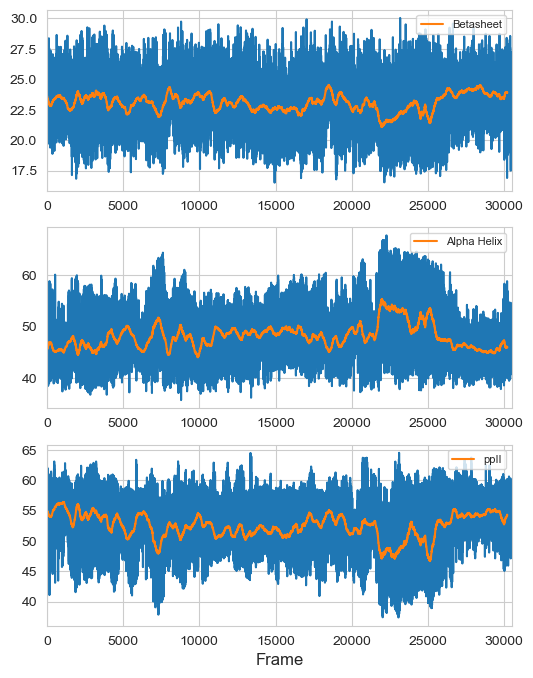

<Figure size 400x300 with 0 Axes>

In [12]:
fig, ax = plt.subplots(3, figsize=((6, 8)))
N = 300
ax[0].plot(alphabeta_betasheet)
ax[0].plot(np.convolve(alphabeta_betasheet, np.ones(
    N)/N, mode='valid'), label='Betasheet')
ax[0].legend(loc='upper right')
ax[0].set_xlim(0,last_frame)

ax[1].plot(alphabeta_alpharight)
ax[1].plot(np.convolve(alphabeta_alpharight, np.ones(
    N)/N, mode='valid'), label='Alpha Helix')
ax[1].legend(loc='upper right')
ax[1].set_xlim(0,last_frame)

ax[2].plot(alphabeta_ppII)
ax[2].plot(np.convolve(alphabeta_ppII, np.ones(
    N)/N, mode='valid'), label='ppII')
ax[2].legend(loc='upper right')
ax[2].set_xlim(0,last_frame)

plt.xlabel('Frame')
plt.show()
plt.clf()

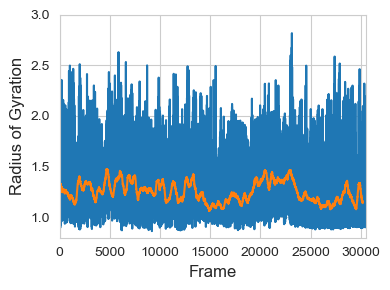

CA Radius of Gyration: 1.253 +_ 0.014
1st Half CA Radius of Gyration: 1.275 +_ 0.014
2nd Half CA Radius of Gyration: 1.231 +_ 0.028


<Figure size 400x300 with 0 Axes>

In [13]:
# compute the CA radius of gyration of each frame 
mass = []
for at in trj.topology.atoms:
    mass.append(at.element.mass)
mass_CA = len(mass)*[0.0]
# put the CA entries equal to 1.0
for i in trj.topology.select("name CA"):
    mass_CA[i] = 1.0
# calculate CA radius of gyration
rg_CA = md.compute_rg(trj, masses=np.array(mass_CA))
np.save(outdir+"Rg_total" + ".npy", rg_CA)

plt.clf()
plt.plot(rg_CA)
plt.plot(np.convolve(rg_CA, np.ones(N)/N, mode='valid'))
plt.xlabel('Frame')
plt.ylabel('Radius of Gyration')
plt.ylim(0.8, 3.0)
plt.xlim(0, n_frames)
plt.tick_params()
plt.tight_layout()
plt.show()
plt.clf()

print("CA Radius of Gyration:%6.3lf" %
      np.average(rg_CA), "+_%6.3lf" % block(rg_CA)**.5)
print("1st Half CA Radius of Gyration:%6.3lf" % np.average(
    rg_CA[0:half]), "+_%6.3lf" % block(rg_CA[0:half])**.5)
print("2nd Half CA Radius of Gyration:%6.3lf" % np.average(
    rg_CA[half:-1]), "+_%6.3lf" % block(rg_CA[half:-1])**.5)


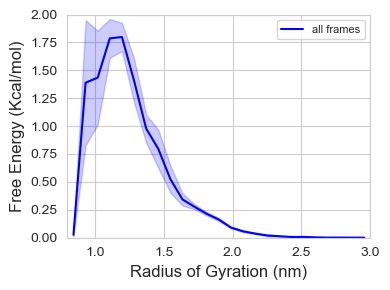

<Figure size 400x300 with 0 Axes>

In [14]:
Rg_all, edges, u_err = histo_blockerror(rg_CA, 0.8, 3.0, 25, 5)

plt.plot(edges, Rg_all, c='blue', label='all frames')
plt.fill_between(edges, Rg_all-u_err, Rg_all+u_err, color='blue', alpha=0.2)

plt.xlim(0.8, 3.0)
plt.ylim(0,2.0)
plt.xlabel('Radius of Gyration (nm)')
plt.ylabel('Free Energy (Kcal/mol)')
plt.tight_layout()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
plt.clf()

[0.001 1.570 0.884 0.150 0.081 0.193 0.078 0.147 0.074 0.015 0.002 0.001
 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.025 1.389 1.434 1.786 1.798 1.408 0.978 0.796 0.524 0.342 0.276 0.213
 0.162 0.090 0.057 0.037 0.019 0.013 0.006 0.007 0.003 0.000 0.001 0.000
 0.000]


/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:119: RuntimeWarning: invalid value encountered in divide
  ferr = -(0.001987*T)*(error / average)


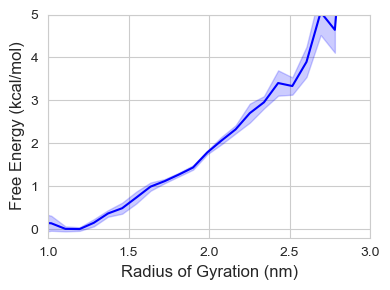

<Figure size 400x300 with 0 Axes>

In [15]:
dG, bin_centers, ferr = free_energy_1D_blockerror(rg_CA, 300, 0.8, 3.0, 25, 5)
sns.lineplot(x=bin_centers, y=dG, color='blue')
plt.fill_between(bin_centers, dG-ferr, dG+ferr, color='blue', alpha=0.2)
plt.ylim(-0.2, 5)
plt.xlim(1.0, 3.0)
plt.xlabel('Radius of Gyration (nm)')
plt.ylabel('Free Energy (kcal/mol)')
plt.tight_layout()
# txt(outdir+'rg.dG.err.dat', np.column_stack((bin_centers, dG, ferr)))
plt.tight_layout()
plt.show()
plt.clf()

[0.002 0.087 0.586 0.155 0.190 0.137 0.051 0.026 0.006 0.002 0.001 0.003
 0.002 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.038 0.659 1.516 1.841 1.915 1.750 1.180 0.767 0.437 0.311 0.263 0.212
 0.178 0.106 0.075 0.050 0.034 0.015 0.010 0.004 0.001 0.000 0.000 0.000
 0.000]
[0.000 2.036 1.289 0.256 0.155 0.073 0.085 0.391 0.174 0.035 0.013 0.005
 0.005 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.013 2.118 1.353 1.732 1.681 1.064 0.775 0.826 0.611 0.373 0.289 0.215
 0.146 0.075 0.038 0.023 0.004 0.010 0.001 0.010 0.004 0.001 0.001 0.000
 0.000]


/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:119: RuntimeWarning: invalid value encountered in divide
  ferr = -(0.001987*T)*(error / average)


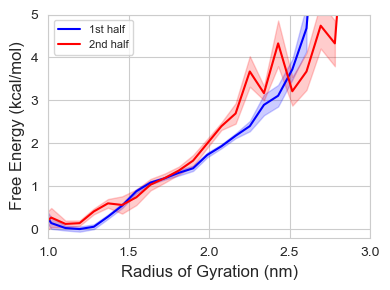

<Figure size 400x300 with 0 Axes>

In [16]:
# [0:half],[half:-1]
dG1, bin_centers, ferr1 = free_energy_1D_blockerror(
    rg_CA[0:half], 300, 0.8, 3.0, 25, 5)
dG2, bin_centers, ferr2 = free_energy_1D_blockerror(
    rg_CA[half:-1], 300, 0.8, 3.0, 25, 5)
sns.lineplot(x=bin_centers, y=dG1, color='blue', label='1st half')
sns.lineplot(x=bin_centers, y=dG2, color='red', label='2nd half')

plt.fill_between(bin_centers, dG1-ferr1, dG1+ferr1, color='blue', alpha=0.2)
plt.fill_between(bin_centers, dG2-ferr2, dG2+ferr2, color='red', alpha=0.2)

plt.ylim(-0.2, 5)
plt.xlim(1.0, 3.0)
plt.xlabel('Radius of Gyration (nm)')
plt.ylabel('Free Energy (kcal/mol)')
plt.legend()
plt.tight_layout()
plt.show()
plt.clf()

In [17]:
CA_atoms = trj.topology.select("name CA")
ca_trj = trj.atom_slice(CA_atoms, inplace=True)
rg = md.compute_rg(ca_trj)

Rg = rg * 10 

N = ca_trj.n_residues

def getRh(rg, N): 
    a1 = 0.216
    a2 = 4.06 
    a3 = 0.821

    return (rg) / ((a1*(rg-a2*N**(0.33)))/(N**(0.60)- N**(0.33))+a3)
Rh = getRh(Rg, N)/10

print("CA Hydrodynamic Radius:%6.3lf" %
      np.average(Rh), "+_%6.3lf" % block(Rh)**.5)
print("1st Half CA Hydrodynamic Radius:%6.3lf" % np.average(
    Rh[0:half]), "+_%6.3lf" % block(Rh[0:half])**.5)
print("2nd Half CA Hydrodynamic Radius:%6.3lf" % np.average(
    Rh[half:-1]), "+_%6.3lf" % block(Rh[half:-1])**.5)

CA Hydrodynamic Radius: 1.565 +_ 0.007
1st Half CA Hydrodynamic Radius: 1.576 +_ 0.007
2nd Half CA Hydrodynamic Radius: 1.555 +_ 0.013


Sα: 3.367 +_ 0.341


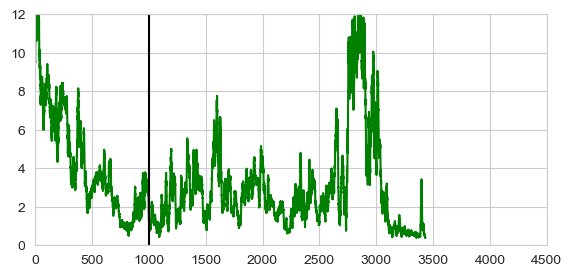

<Figure size 400x300 with 0 Axes>

In [18]:
trj_untrunc = md.load("/Users/f006j60/Robustelli_Group/IAPP/wt_714f9/pbc_trj/pbc_1.xtc", top=pdb, stride=1)
helix = md.load_pdb(helixpdb)
top_helix = helix.topology
backbone_helix = top_helix.select("name CA")
backbone = top.select("name CA")

RMS_start = 1
RMS_stop = 31
RMS = []
for i in range(RMS_start, RMS_stop):
    sel = top_helix.select("residue %s to %s and name CA" % (i, i+6))
    rmsd = md.rmsd(trj_untrunc, helix, atom_indices=sel)
    RMS.append(rmsd)
RMS = np.asarray(RMS)
RMS

Sa_sum = np.zeros((trj_untrunc.n_frames))
Sa = (1.0-(RMS/0.10)**8)/(1-(RMS/0.10)**12)
Sa_ave = np.average(Sa, axis=1)
Sa_total = np.sum(Sa, axis=0)

print("Sα:%6.3lf" % np.average(Sa_total),
      "+_%6.3lf" % block(Sa_total)**.5)

# plt.plot(Sa_total, label='Full', c='g')
# plt.legend()
# plt.xlabel('Frames', size=18)
# plt.ylabel('Sα', size=18)
# plt.tick_params(labelsize=18)
# plt.tight_layout()
# plt.ylim(0, 20)
# plt.savefig(outdir+'Sa.timecourse_untruncated.png', dpi=200)
np.savetxt(outdir+'Sa_total_untruncated.dat', Sa_total)
# plt.show()
# plt.clf()

N = 100
plt.figure(figsize=(6.6, 3))
plt.plot((trj_untrunc.time/1000)[:42902], np.convolve(Sa_total, np.ones(N)/N, mode='valid'), label='Full', c='g')
plt.vlines(1000, 0, 12, colors="k")
# plt.xlabel('Time (ns)')
# plt.ylabel('Sα')
plt.xlim(0, 4500)
plt.ylim(0, 12)
# plt.savefig(outdir+'Sa.timecourse.smooth.untrunc.pdf', dpi=300)
plt.show()
plt.clf()

t_smooth = (trj_untrunc.time/1000)[:42902]
np.savetxt(outdir +"Sa_total_untruncated_smooth.dat" , np.column_stack((t_smooth, np.convolve(Sa_total, np.ones(N)/N, mode='valid'))))


del trj_untrunc

Number of residues: 39

Sα: 2.805 +_ 0.170


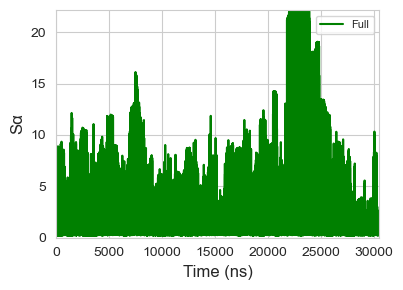

<Figure size 400x300 with 0 Axes>

In [19]:
# reload trj 
trj = md.load(rep0, top=pdb, stride=1)
trj.center_coordinates()

helix = md.load_pdb(helixpdb)
top_helix = helix.topology
backbone_helix = top_helix.select("name CA")
backbone = top.select("name CA")

sel1 = top_helix.select("name CA and resid 0 to 37")

print("Number of residues: %d\n" % len(set(nres)))
RMS_start = 1
RMS_stop = 31
RMS = []
for i in range(RMS_start, RMS_stop):
    sel = top_helix.select("residue %s to %s and backbone" % (i, i+6))
    rmsd = md.rmsd(trj, helix, atom_indices=sel)
    RMS.append(rmsd)
RMS = np.asarray(RMS)
RMS

Sa_sum = np.zeros((trj.n_frames))
Sa = (1.0-(RMS/0.10)**8)/(1-(RMS/0.10)**12)
Sa_ave = np.average(Sa, axis=1)
Sa_total = np.sum(Sa, axis=0)
np.save(outdir+"Sa_total" + ".npy", Sa_total)

print("Sα:%6.3lf" % np.average(Sa_total),
      "+_%6.3lf" % block(Sa_total)**.5)

N = 300
plt.plot(Sa_total, label='Full', c='g')
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('Sα')
plt.tight_layout()
plt.ylim(0, np.max(Sa_total))
plt.xlim(0, n_frames)
plt.show()
plt.clf()

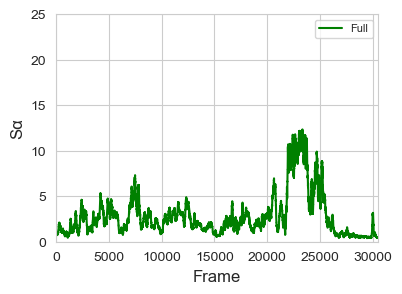

<Figure size 400x300 with 0 Axes>

In [20]:
N = 100
plt.plot(np.convolve(Sa_total, np.ones(N)/N, mode='valid'), label='Full', c='g')
plt.legend()
plt.xlabel('Frame')
plt.ylabel('Sα')
plt.tight_layout()
plt.ylim(0, 25)
plt.xlim(0,n_frames)
plt.show()
plt.clf()

**All Frames- Not Partitioned into Bound and Unbound**
[0.017 0.001 0.001 0.002 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000
 0.000]
[0.565 0.102 0.050 0.070 0.032 0.037 0.029 0.016 0.026 0.006 0.009 0.007
 0.006 0.006 0.002 0.001 0.000 0.004 0.005 0.004 0.004 0.016 0.003 0.000
 0.000]


/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:119: RuntimeWarning: invalid value encountered in divide
  ferr = -(0.001987*T)*(error / average)


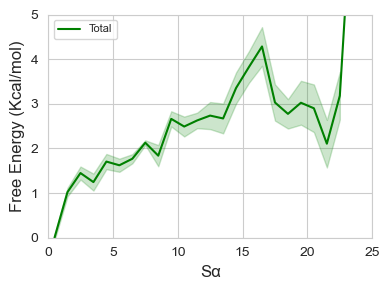

<Figure size 400x300 with 0 Axes>

In [21]:
print("**All Frames- Not Partitioned into Bound and Unbound**")
Sa_dg, edges, Sa_err = free_energy_1D_blockerror(Sa_total, 300, 0, 25, 25, 5)

plt.clf()
plt.plot(edges, Sa_dg, c='g', label='Total')
plt.fill_between(edges, Sa_dg-Sa_err, Sa_dg+Sa_err, color='g', alpha=0.2)
plt.legend()
plt.ylim(0, 5)
plt.xlim(0, 25)
plt.xlabel('Sα')
plt.ylabel('Free Energy (Kcal/mol)')
plt.tight_layout()
np.savetxt(outdir+'Sa_dg.dat', np.column_stack((edges, Sa_dg, Sa_err)))
plt.show()
plt.clf()

In [22]:
# calculate the contacts 
prot_len = len(nres) - 1
contact_map, distance_map = contact_map_avg(trj, prot_len, cutoff=0.8)
np.savetxt(outdir+'contactmap.dat', contact_map)

In [23]:
# create sequence labels 
seq = []
div = 2 
for n,i in enumerate(trj.topology.residues): 
    if n%div == 0: 
        seq.append(str(i))
    else: 
        seq.append("")
seq = seq[:-1] 

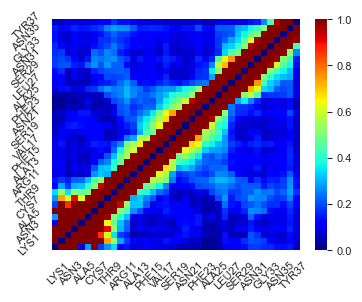

<Figure size 400x300 with 0 Axes>

In [24]:
# the last residue is NH2 
contact_map = np.loadtxt(outdir+'contactmap.dat')
sequence = seq

# Make distance map
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
im = sns.heatmap(contact_map, cmap='jet', ax=ax)
ax.grid(which='both', alpha=0.5)
plt.xticks(residue_number_offsetres, sequence, rotation=45,fontsize=8)
plt.yticks(residue_number_offsetres, sequence, rotation=45,fontsize=8)
cbar = im.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
ax.invert_yaxis()
# plt.savefig(outdir+'contact_map.png')
# plt.savefig(outdir+'contact_map.pdf')
plt.show()
plt.clf()

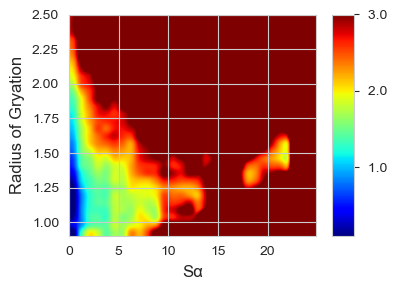

In [25]:
a, xedges, yedges = np.histogram2d(
    rg_CA, Sa_total, 30, [[0.9, 2.5], [0, 25.0]], density=True, weights=None)
a = np.log(np.flipud(a)+.000001)
T = 300
a = -(0.001987*T)*a

fig = plt.figure(figsize=(4, 3))
im = plt.imshow(a, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5]
plt.xlim(0, 24.9)
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()

plt.ylabel("Radius of Gryation", labelpad=5)
plt.xlabel("Sα", labelpad=5)
plt.axes(cb.ax)
plt.clim(vmin=0.1, vmax=3.0)

plt.tight_layout()
# np.savetxt(outdir+'Rg_v_Sa.dG.allframes.dat', a)

Fraction Bound: 0.7165573770491803


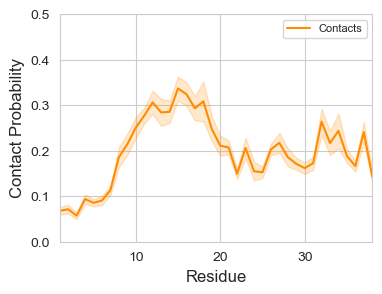

<Figure size 400x300 with 0 Axes>

In [26]:
# Calculate Contact Probabilities between each protein residue and the ligand
# Cutoff is 6 Angstroms to closest heavy atoms 

contact_pairs = np.zeros((residues, 2))
ligand_residue_index = 38

for i in range(0, residues):
    contact_pairs[i] = [i, ligand_residue_index]
contact = md.compute_contacts(trj, contact_pairs, scheme='closest-heavy')
contacts = np.asarray(contact[0]).astype(float)
cutoff = 0.6
contact_matrix = np.where(contacts < cutoff, 1, 0)
contact_prob = np.sum(contact_matrix, axis=0)/trj.n_frames
np.savetxt(outdir+'contacts.traj.dat', contact_matrix, '%i')


contact_rows = np.sum(contact_matrix, axis=1)
contact_frames = np.where(contact_rows > 0)[0]
nocontact_frames = np.where(contact_rows == 0)[0]
contact_fraction = np.sum(np.where(contact_rows > 0, 1, 0))/len(contact_rows)
print("Fraction Bound:", contact_fraction)

# Total Contacts with errors
contact_ave, contact_pyb_be = get_blockerrors_pyblock(contact_matrix, 1.0)
contact_be = np.column_stack((range(1,ligand_residue_index+1), contact_ave, contact_pyb_be))
np.savetxt('%s/contact.be.pyblock.dat' % outdir, contact_be, '%.4f')

Contact = contact_be
sns.lineplot(x=Contact[:, 0], y=Contact[:, 1],
             color='darkorange', label='Contacts')
plt.fill_between(Contact[:, 0], Contact[:, 1]+Contact[:, 2],
                 Contact[:, 1]-Contact[:, 2], color='darkorange', alpha=0.2)

plt.xlabel('Residue')
plt.ylabel('Contact Probability')
plt.xlim(residue_offset, residues) # off by one because no ligand 
plt.tight_layout()
plt.ylim(0, 0.5)
plt.show()
plt.clf()

Contact probability by chemical group

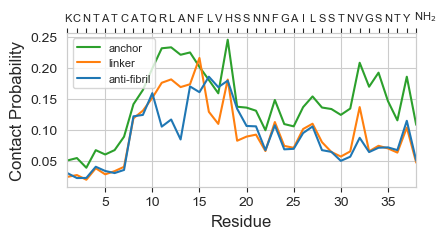

In [27]:
# want 0 to 37 to include NH2 
protein_residues = [res for res in range(residues)]
ligand_anchor_indices = [537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549]
ligand_linker_indices = [550, 551, 552, 553, 554, 555]
ligand_anti_fibril = [556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568]

chemical_group_indices = [ligand_anchor_indices, ligand_linker_indices, ligand_anti_fibril]
labels = ["anchor", "linker", "anti-fibril"]
group_colors = ["tab:green", "tab:orange", "tab:blue"]
fig, axes = plt.subplots(1,1, figsize=(4.5, 2.0))
for n,chemical_group in enumerate(chemical_group_indices): 
    contact_matrix_lig = compute_contact_matrix(trj, protein_residues, chemical_group)
    plt.plot(np.arange(1,residues+1), np.sum(contact_matrix_lig, axis=0)/trj.n_frames, label=labels[n], color=group_colors[n])
plt.xlabel('Residue')
plt.ylabel('Contact Probability')
plt.legend()
plt.xlim(1,38)

ax2 = axes.twiny()
top_ticks = np.arange(0, 38, 1)
ax2.set_xticks(top_ticks)
ax2.set_xticklabels([f'{i}' for i in sequence_ol_wt[0::1]], fontsize=8)
ax2.grid(False)

# plt.savefig(outdir + "contact_probability_by_chemical_group.pdf", dpi=300, bbox_inches="tight")
# # Save the contact matrix
# np.savetxt('contact_matrix.csv', contact_matrix, delimiter=',', fmt='%d')
# print("Contact matrix computed and saved as 'contact_matrix.csv'.")

In [28]:
# benzotriazole, amide, benzyl, tetrahydropyran, amide, isopropyl
# Define the indices for each chemical moiety
chemical_fragments = [[537,538,539,540,541,542,543,544,545], [546,547, 548, 549], [550,551,552,553,554,555], [561, 556, 557, 558, 559, 560], [565, 566, 567, 568], [562, 563, 564]]

In [29]:
chemical_fragment_labels = ["benzotriazole", "amide", "benzyl", "tetrahydropyran", "amide", "isopropyl"]
# Calculate the average contact fraction for each chemical group
for n,chemical_group in enumerate(chemical_fragments): 
    group_frac , group_frac_be = get_fraction_chemical_group(trj, protein_residues, chemical_group)
    print(f"Average contact fraction for {chemical_fragment_labels[n]}: {group_frac*100:.1f} +- {group_frac_be*100:.1f} %")

Average contact fraction for benzotriazole: 65.2 +- 2.5 %
Average contact fraction for amide: 65.6 +- 2.5 %
Average contact fraction for benzyl: 64.0 +- 2.5 %
Average contact fraction for tetrahydropyran: 60.5 +- 2.4 %
Average contact fraction for amide: 45.8 +- 1.7 %
Average contact fraction for isopropyl: 48.5 +- 1.8 %


In [30]:
contact_matrix_anchor = compute_contact_matrix(trj, protein_residues, ligand_anchor_indices)
contact_prob_anchor = np.sum(contact_matrix_lig, axis=0)/trj.n_frames

apo_hprop = np.loadtxt(apodir + "Hprop.err.dat")[:,1]
system_hprop = H1_H[:,1]

print("contact vs change in helical content")
print(pearsonr(contact_prob_anchor, system_hprop - apo_hprop))
print(spearmanr(contact_prob_anchor, system_hprop - apo_hprop))

print("contact vs helical content")
print(pearsonr(contact_prob_anchor, system_hprop ))
print(spearmanr(contact_prob_anchor, system_hprop ))

contact vs change in helical content
PearsonRResult(statistic=np.float64(-0.3496880637612869), pvalue=np.float64(0.03139158768967694))
SignificanceResult(statistic=np.float64(-0.3430197605469138), pvalue=np.float64(0.03500342311005739))
contact vs helical content
PearsonRResult(statistic=np.float64(0.3137145733614066), pvalue=np.float64(0.05511122128256345))
SignificanceResult(statistic=np.float64(0.27068739702904027), pvalue=np.float64(0.10023031153537076))


In [31]:
def protein_atom_specific_probabilities(traj,prot_query, lig_resid = 38, cutoff=0.5): 
    
    # create queries for each 
    lig_atoms = traj.top.select("resid " + str(lig_resid))
    prot_atoms = prot_query # side chains 
    prot_contact_probabilities = []
    prot_contact_probabilities_error = []

    for atoms in prot_atoms: 
        prot_contacts = md.compute_neighbors(traj, cutoff=cutoff, query_indices= atoms,  haystack_indices=lig_atoms)
        prot_contacts = np.array([x.size for x in prot_contacts])
        prot_contacts = np.where(prot_contacts > 0 , 1, 0)
        average, be = get_blockerror(prot_contacts)
        
        prot_contact_probabilities.append(average)
        prot_contact_probabilities_error.append(be)

    return np.array(prot_contact_probabilities), np.array(prot_contact_probabilities_error)

In [32]:
# contacts within 5 angstrom heavy atoms 
protein_contact_all_5, protein_contact_all_5_be = protein_atom_specific_probabilities(trj, [trj.topology.select("resid " + str(n)) for n in range(38)], lig_resid=38, cutoff=0.5)
protein_sidechains_all_5, protein_sidechains_all_5_be= protein_atom_specific_probabilities(trj, [trj.topology.select("protein and resid " + str(n) + " and not backbone") for n in range(38)], lig_resid=38, cutoff=0.5)
protein_backbone_all_5, protein_backbone_all_5_be = protein_atom_specific_probabilities(trj, [trj.topology.select("protein and resid " + str(n) + " and backbone") for n in range(38)], lig_resid=38, cutoff=0.5)

/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:78: RuntimeWarning: invalid value encountered in divide
  M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]


Text(0.5, 1.0, 'WT + YX-I-1, cutoff $ \\leq 5 \\AA$')

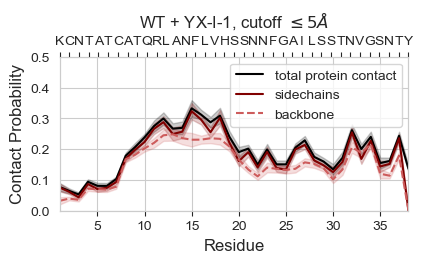

In [33]:
fig, axs = plt.subplots(1,1, figsize=(4.5, 2.0))

ax = axs.twiny()
ax.set_xticks(range(0,37))
ax.set_xticklabels([f'{i}' for i in sequence_ol_wt[:-1]], fontsize=10)
ax.grid(False)

axs.plot(np.arange(1,39), protein_contact_all_5, color="k", label="total protein contact")
axs.fill_between(np.arange(1,39), protein_contact_all_5 + protein_contact_all_5_be, protein_contact_all_5 - protein_contact_all_5_be, alpha=0.2, color="k")

axs.plot(np.arange(1,39), protein_sidechains_all_5, color="maroon", label="sidechains")
axs.fill_between(np.arange(1,39), protein_sidechains_all_5 + protein_sidechains_all_5_be, protein_sidechains_all_5 - protein_sidechains_all_5_be, alpha=0.2, color="maroon")

axs.plot(np.arange(1,39), protein_backbone_all_5, color="indianred", label = "backbone", linestyle="--")
axs.fill_between(np.arange(1,39), protein_backbone_all_5 + protein_backbone_all_5_be, protein_backbone_all_5 - protein_backbone_all_5_be, alpha=0.2, color="indianred")

axs.legend(fontsize=10)
axs.set_xlim(1,38)
axs.set_ylim(0,0.5)
axs.set_ylabel("Contact Probability")
axs.set_xlabel("Residue")
axs.set_title("WT + YX-I-1, cutoff $ \leq 5 \AA$")
# plt.savefig(outdir+'1Dcontacts_total_backbone_sidechains.pdf', bbox_inches="tight", dpi=400)

In [34]:
Box_L = trj.unitcell_lengths[0][0]
# Convert nM to meters for Box_V in M^3
Box_V = (Box_L*10**-9)**3
# Convert Box_V to L
Box_V_L = Box_V*1000
#Concentraion in Mols/L
Concentration = 1/(Box_V_L*(6.023*10**23))
print("L:", Box_L, "V:", Box_V, "Conc:", Concentration)

contact_binary = np.where(contact_rows > 0, 1, 0)
boundfrac, boundfrac_be = get_blockerror_pyblock(contact_binary)
print("Bound Fraction:", boundfrac, "+_", boundfrac_be)
upper = boundfrac+boundfrac_be
KD = Kd_calc(boundfrac, Concentration)
KD_upper = Kd_calc(upper, Concentration)
KD_error = KD-KD_upper
print("KD (mM):", KD*1000, "+_", KD_error*1000)

L: 6.4270005 V: 2.654758e-25 Conc: 0.0062540625
Bound Fraction: 0.7165573770491803 +_ 0.023795075344725105
KD (mM): 2.473867330333681 +_ 0.2805174046132319


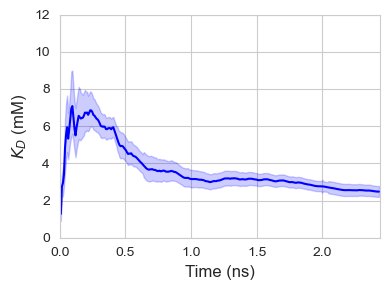

<Figure size 400x300 with 0 Axes>

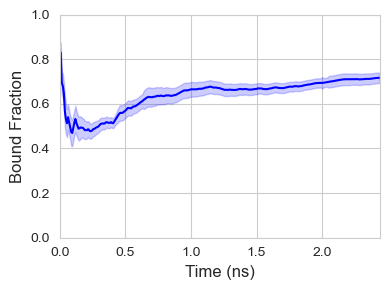

<Figure size 400x300 with 0 Axes>

In [35]:
# Time Series of KD Calculations
time = np.linspace(0, sim_length, len(contact_binary))
boundfrac_by_frame = []
t2 = []
err_by_frame = []
err_upper = []
err_lower = []
stride = 100

for i in range(stride, len(contact_binary), stride):
    Data = np.asarray(contact_binary[0:i])
    bf, be = get_blockerror_pyblock_nanskip(Data)
    boundfrac_by_frame.append(bf)
    err_by_frame.append(be)
    err_upper.append(bf-be)
    err_lower.append(bf+be)
    t2.append(time[i])

Kd = Kd_calc(np.asarray(boundfrac_by_frame), Concentration)*1000
Kd_upper = Kd_calc(np.asarray(err_upper), Concentration)*1000
Kd_lower = Kd_calc(np.asarray(err_lower), Concentration)*1000
# np.savetxt('%s/KD.timecourse.errors.dat' %
#            (outdir), np.column_stack((t2, Kd, Kd_upper, Kd_lower)), '%.4f')

# KD_upper=err_upper
plt.plot(t2, Kd, color='blue')
plt.fill_between(t2, Kd_upper, Kd_lower, color='blue', alpha=0.2)
plt.xlabel('Time (ns)')
plt.ylabel('$K_D$ (mM)')
plt.grid(True)
plt.ylim(0, 12.0)
plt.xlim(0, sim_length)
plt.tight_layout()
plt.show()
plt.clf()

# bound fraction 
np.savetxt('%s/bf.timecourse.errors.dat' %
           (outdir), np.column_stack((t2, boundfrac_by_frame, err_upper, err_lower)), '%.4f')
plt.figure()
plt.plot(t2, boundfrac_by_frame, color='blue')
plt.fill_between(t2, err_upper, err_lower, color='blue', alpha=0.2)
plt.xlabel('Time (ns)')
plt.ylabel('Bound Fraction')
plt.grid(True)
plt.ylim(0, 1.0)
plt.xlim(0, sim_length)
plt.tight_layout()
plt.show()
plt.clf()

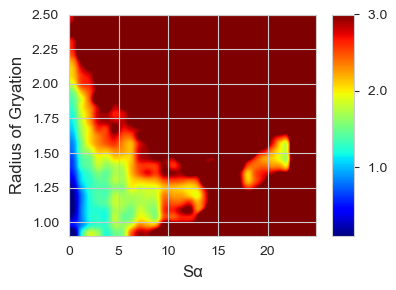

<Figure size 400x300 with 0 Axes>

In [36]:
a, xedges, yedges = np.histogram2d(rg_CA[contact_frames], Sa_total[contact_frames], 30, [
                                   [0.9, 2.5], [0, 25.0]], density=True, weights=None)
a = np.log(np.flipud(a)+.000001)
T = 300
a = -(0.001987*T)*a

fig = plt.figure(figsize=(4, 3))
im = plt.imshow(a, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5]
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.xlim(0, 24.9)
plt.ylabel("Radius of Gryation", labelpad=5)
plt.xlabel("Sα", labelpad=5)
plt.axes(cb.ax)
plt.clim(vmin=0.1, vmax=3.0)
plt.tight_layout()
np.savetxt(outdir+'Rg_v_Sa.dG.allframes.dat', a)
plt.show()
plt.clf()

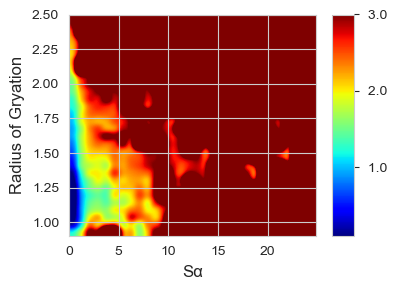

<Figure size 400x300 with 0 Axes>

In [37]:
# unbound 
a, xedges, yedges = np.histogram2d(rg_CA[nocontact_frames], Sa_total[nocontact_frames], 30, [
                                   [0.9, 2.5], [0, 25.0]], density=True, weights=None)
a = np.log(np.flipud(a)+.000001)
T = 300
a = -(0.001987*T)*a

fig = plt.figure(figsize=(4,3))
im = plt.imshow(a, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5]
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.xlim(0, 24.9)

plt.ylabel("Radius of Gryation", labelpad=5)
plt.xlabel("Sα",labelpad=5)
plt.axes(cb.ax)
plt.clim(vmin=0.1, vmax=3.0)
plt.tight_layout()
np.savetxt(outdir+'Rg_v_Sa.unbound.dG.dat', a)
plt.show()
plt.clf()

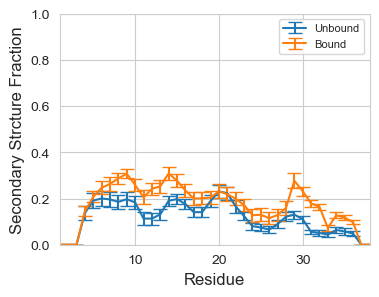

Bound Average Helical Res: 6.589 +_ 0.494
Bound Average Fraction Helix: 0.178 +_ 0.013
Unbound Average Helical Res: 4.419 +_ 0.371
Unbound Average Fraction Helix: 0.116 +_ 0.010
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


<Figure size 400x300 with 0 Axes>

In [38]:
dssp_bound = dsspH1[contact_frames]
dssp_unbound = dsspH1[nocontact_frames]
H1_H_bound, H1_E_bound = dssp_convert(dssp_bound)
H1_H_unbound, H1_E_unbound = dssp_convert(dssp_unbound)

plt.errorbar(hres_renum, H1_H_unbound[:, 0],
             yerr=H1_H_unbound[:, 1], capsize=5, label='Unbound')
plt.errorbar(hres_renum, H1_H_bound[:, 0],
             yerr=H1_H_bound[:, 1], capsize=5, label='Bound')
plt.ylim(0, 1.0)
plt.xlim(residue_offset, residues)
plt.xlim()
plt.legend(loc="upper right")
plt.xlabel('Residue')
plt.ylabel('Secondary Strcture Fraction')
plt.show()
plt.clf()

dsspH = np.copy(dssp_bound)
dsspH[dsspH == 'H'] = 1
dsspH[dsspH == 'E'] = 0
dsspH[dsspH == 'C'] = 0
dsspH[dsspH == 'NA'] = 0
dsspH = dsspH.astype(int)
TotalH = np.sum(dsspH, axis=1)

print("Bound Average Helical Res:%6.3lf" %
      (np.average(TotalH)), "+_%6.3lf" % ((block(TotalH)**.5)))
print("Bound Average Fraction Helix:%6.3lf" %
      (np.average(TotalH)/37.0), "+_%6.3lf" % ((block(TotalH)**.5)/37.0))


dsspH = np.copy(dssp_unbound)
dsspH[dsspH == 'H'] = 1
dsspH[dsspH == 'E'] = 0
dsspH[dsspH == 'C'] = 0
dsspH[dsspH == 'NA'] = 0
dsspH = dsspH.astype(int)
TotalH = np.sum(dsspH, axis=1)

print("Unbound Average Helical Res:%6.3lf" %
      (np.average(TotalH)), "+_%6.3lf" % ((block(TotalH)**.5)))
print("Unbound Average Fraction Helix:%6.3lf" %
      (np.average(TotalH)/residues), "+_%6.3lf" % ((block(TotalH)**.5)/37.0))
print((hres_renum))

Bound Sα: 3.140 +_ 0.474
Unbound Sα: 1.958 +_ 0.294
[0.030 0.004 0.001 0.003 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.002 0.000 0.000
 0.000]
[0.508 0.117 0.056 0.078 0.036 0.042 0.031 0.017 0.029 0.007 0.009 0.008
 0.007 0.008 0.002 0.001 0.001 0.005 0.005 0.005 0.005 0.020 0.003 0.000
 0.000]
[0.009 0.000 0.000 0.001 0.000 0.000 0.001 0.000 0.001 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.707 0.063 0.033 0.049 0.023 0.026 0.023 0.013 0.019 0.005 0.008 0.005
 0.002 0.003 0.003 0.000 0.000 0.001 0.006 0.001 0.002 0.007 0.002 0.000
 0.000]


/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:119: RuntimeWarning: invalid value encountered in divide
  ferr = -(0.001987*T)*(error / average)


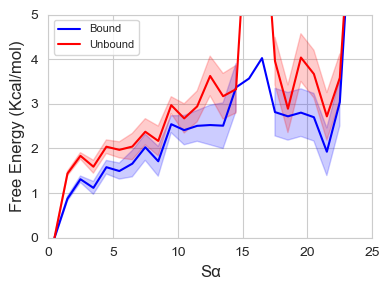

<Figure size 400x300 with 0 Axes>

In [39]:
print("Bound Sα:%6.3lf" % np.average(
    Sa_total[contact_frames]), "+_%6.3lf" % block(Sa_total[contact_frames])**.5)
print("Unbound Sα:%6.3lf" % np.average(
    Sa_total[nocontact_frames]), "+_%6.3lf" % block(Sa_total[nocontact_frames])**.5)

dG1, bin_centers, ferr = free_energy_1D_blockerror(
    Sa_total[contact_frames], 300, 0, 25, 25, 5)
dG2, bin_centers, ferr = free_energy_1D_blockerror(
    Sa_total[nocontact_frames], 300, 0, 25, 25, 5)

sns.lineplot(x=bin_centers, y=dG1, color='blue', label="Bound")
sns.lineplot(x=bin_centers, y=dG2, color='red', label="Unbound")
plt.fill_between(bin_centers, dG1-ferr, dG1+ferr, color='blue', alpha=0.2)
plt.fill_between(bin_centers, dG2-ferr, dG2+ferr, color='red', alpha=0.2)

plt.ylim(0, 5)
plt.xlim(0, 25)
plt.xlabel('Sα')
plt.ylabel('Free Energy (Kcal/mol)')
plt.tight_layout()
plt.show()
plt.clf()


[0.030 0.004 0.001 0.003 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.002 0.000 0.000
 0.000]
[0.508 0.117 0.056 0.078 0.036 0.042 0.031 0.017 0.029 0.007 0.009 0.008
 0.007 0.008 0.002 0.001 0.001 0.005 0.005 0.005 0.005 0.020 0.003 0.000
 0.000]
[0.009 0.000 0.000 0.001 0.000 0.000 0.001 0.000 0.001 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.707 0.063 0.033 0.049 0.023 0.026 0.023 0.013 0.019 0.005 0.008 0.005
 0.002 0.003 0.003 0.000 0.000 0.001 0.006 0.001 0.002 0.007 0.002 0.000
 0.000]


/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:119: RuntimeWarning: invalid value encountered in divide
  ferr = -(0.001987*T)*(error / average)


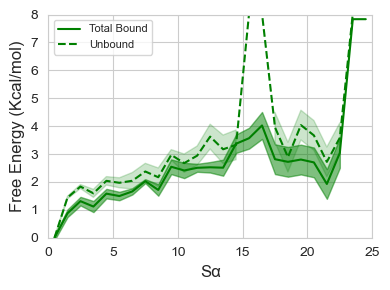

<Figure size 400x300 with 0 Axes>

In [40]:
Sa_dg_b, edges, Sa_b_err = free_energy_1D_blockerror(
    Sa_total[contact_frames], 300, 0, 25, 25, 5)
Sa_dg_u, edges, Sa_u_err = free_energy_1D_blockerror(
    Sa_total[nocontact_frames], 300, 0, 25, 25, 5)

plt.plot(edges, Sa_dg_b, c='g', label='Total Bound')
plt.fill_between(edges, Sa_dg_b-Sa_b_err, Sa_dg_b +
                 Sa_b_err, color='g', alpha=0.5)
plt.plot(edges, Sa_dg_u, c='g', linestyle='dashed', label='Unbound')
plt.fill_between(edges, Sa_dg_u-Sa_u_err, Sa_dg_u +
                 Sa_u_err, color='g', alpha=0.2)

plt.legend()
plt.ylim(0, 8)
plt.xlim(0, 25)
plt.xlabel('Sα')
plt.ylabel('Free Energy (Kcal/mol)')
plt.tight_layout()
plt.show()
plt.clf()

Bound Rg: 1.2395163489532972 +_ 0.015
Unbound Rg: 1.2880520796481334 +_ 0.020
[0.000 0.081 0.783 0.098 0.231 0.376 0.078 0.063 0.027 0.014 0.016 0.003
 0.005 0.002 0.001 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.011 0.402 1.533 1.906 2.170 1.677 1.042 0.714 0.468 0.338 0.361 0.247
 0.181 0.124 0.071 0.051 0.033 0.024 0.005 0.004 0.001 0.000 0.000 0.000
 0.000]
[0.001 2.583 0.639 0.073 0.112 0.172 0.136 0.168 0.079 0.013 0.002 0.000
 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.031 1.779 1.395 1.739 1.651 1.301 0.952 0.829 0.546 0.344 0.242 0.200
 0.154 0.077 0.051 0.031 0.014 0.008 0.006 0.008 0.003 0.001 0.001 0.000
 0.000]


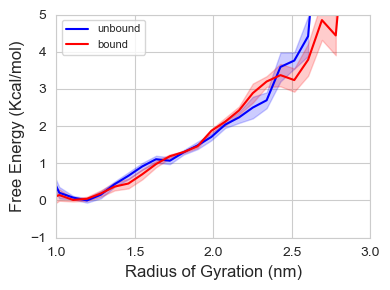

<Figure size 400x300 with 0 Axes>

In [41]:
print("Bound Rg:", np.average(rg_CA[contact_frames]),
      "+_%6.3lf" % block(rg_CA[contact_frames])**.5)
print("Unbound Rg:", np.average(
    rg_CA[nocontact_frames]), "+_%6.3lf" % block(rg_CA[nocontact_frames])**.5)

Rg_dG_unbound, edges, u_err = free_energy_1D_blockerror(
    rg_CA[nocontact_frames], 300, 0.8, 3.0, 25, 5)
Rg_dG_bound, edges, b_err = free_energy_1D_blockerror(
    rg_CA[contact_frames], 300, 0.8, 3.0, 25, 5)

plt.plot(edges, Rg_dG_unbound, c='blue', label='unbound')
plt.plot(edges, Rg_dG_bound, c='red', label='bound')
plt.fill_between(edges, Rg_dG_unbound-u_err, Rg_dG_unbound +
                 u_err, color='blue', alpha=0.2)
plt.fill_between(edges, Rg_dG_bound-b_err, Rg_dG_bound +
                 b_err, color='red', alpha=0.2)

plt.ylim(-1, 5)
plt.xlim(1.0, 3.0)
plt.xlabel('Radius of Gyration (nm)')
plt.ylabel('Free Energy (Kcal/mol)')
plt.tight_layout()
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.clf()

Bound Rg: 1.2395163489532972 +_ 0.015
Unbound Rg: 1.2880520796481334 +_ 0.020
Unbound Rg: 1.3032609009724019 +_ 0.010
[0.000 0.081 0.783 0.098 0.231 0.376 0.078 0.063 0.027 0.014 0.016 0.003
 0.005 0.002 0.001 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.011 0.402 1.533 1.906 2.170 1.677 1.042 0.714 0.468 0.338 0.361 0.247
 0.181 0.124 0.071 0.051 0.033 0.024 0.005 0.004 0.001 0.000 0.000 0.000
 0.000]
[0.001 2.583 0.639 0.073 0.112 0.172 0.136 0.168 0.079 0.013 0.002 0.000
 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.031 1.779 1.395 1.739 1.651 1.301 0.952 0.829 0.546 0.344 0.242 0.200
 0.154 0.077 0.051 0.031 0.014 0.008 0.006 0.008 0.003 0.001 0.001 0.000
 0.000]
[0.002 0.130 0.069 0.036 0.056 0.046 0.015 0.014 0.006 0.002 0.002 0.003
 0.003 0.002 0.002 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.076 0.861 1.321 1.588 1.660 1.499 1.172 0.865 0.639 0.493 0.358 0.255
 0.185 0.139 0.106 0.059 0.041 0.028 0.

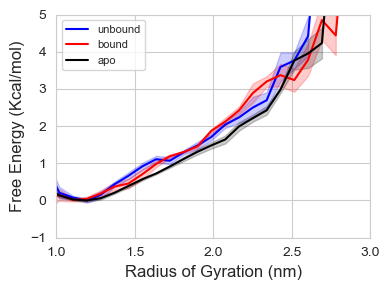

<Figure size 400x300 with 0 Axes>

In [42]:
rg_apo = np.loadtxt(apodir+'rg.dat')

print("Bound Rg:", np.average(rg_CA[contact_frames]),
      "+_%6.3lf" % block(rg_CA[contact_frames])**.5)
print("Unbound Rg:", np.average(
    rg_CA[nocontact_frames]), "+_%6.3lf" % block(rg_CA[nocontact_frames])**.5)
print("Unbound Rg:", np.average(rg_apo), "+_%6.3lf" % block(rg_apo)**.5)

Rg_dG_unbound, edges, u_err = free_energy_1D_blockerror(
    rg_CA[nocontact_frames], 300, 0.8, 3.0, 25, 5)
Rg_dG_bound, edges, b_err = free_energy_1D_blockerror(
    rg_CA[contact_frames], 300, 0.8, 3.0, 25, 5)
Rg_dG_apo, edges, a_err = free_energy_1D_blockerror(
    rg_apo, 300, 0.8, 3.0, 25, 5)

plt.clf()
plt.plot(edges, Rg_dG_unbound, c='blue', label='unbound')
plt.plot(edges, Rg_dG_bound, c='red', label='bound')
plt.plot(edges, Rg_dG_apo, c='black', label='apo')

plt.fill_between(edges, Rg_dG_unbound-u_err, Rg_dG_unbound +
                 u_err, color='blue', alpha=0.2)
plt.fill_between(edges, Rg_dG_bound-b_err, Rg_dG_bound +
                 b_err, color='red', alpha=0.2)
plt.fill_between(edges, Rg_dG_apo-a_err, Rg_dG_apo +
                 a_err, color='black', alpha=0.2)

plt.ylim(-1, 5)
plt.xlim(1.0, 3.0)
plt.xlabel('Radius of Gyration (nm)')
plt.ylabel('Free Energy (Kcal/mol)')
plt.tight_layout()
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.clf()

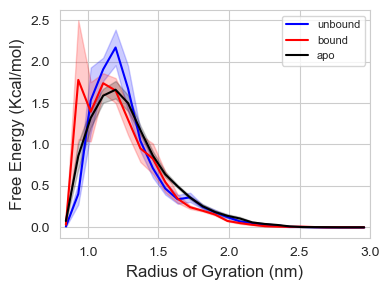

<Figure size 400x300 with 0 Axes>

In [43]:
Rg_unbound, edges, u_err = histo_blockerror(
    rg_CA[nocontact_frames], 0.8, 3.0, 25, 5)
Rg_bound, edges, b_err = histo_blockerror(
    rg_CA[contact_frames], 0.8, 3.0, 25, 5)
Rg_apo, edges, a_err = histo_blockerror(rg_apo, 0.8, 3.0, 25, 5)

plt.plot(edges, Rg_unbound, c='blue', label='unbound')
plt.plot(edges, Rg_bound, c='red', label='bound')
plt.plot(edges, Rg_apo, c='black', label='apo')

plt.fill_between(edges, Rg_unbound-u_err, Rg_unbound +
                 u_err, color='blue', alpha=0.2)
plt.fill_between(edges, Rg_bound-b_err, Rg_bound+b_err, color='red', alpha=0.2)
plt.fill_between(edges, Rg_apo-a_err, Rg_apo+a_err, color='black', alpha=0.2)

#plt.ylim(0, 1)
plt.xlim(0.8, 3.0)
plt.xlabel('Radius of Gyration (nm)')
plt.ylabel('Free Energy (Kcal/mol)')
plt.tight_layout()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
plt.clf()

In [44]:
# add in contact_index 
contact_index = []
for i in range(len(contact_binary)):
    if contact_binary[i] == 1:
        contact_index.append(i)

def calc_err(contact_binary, name):
    boundfrac_by_frame = []
    t2 = []
    err_by_frame = []
    err_upper = []
    err_lower = []
    time = np.linspace(0, sim_length/len(Sa_total)*len(contact_binary), len(contact_binary))
    srtide = 100
    for i in range(stride, len(contact_binary), stride):
        Data = np.asarray(contact_binary[0:i])
        bf, be = get_blockerror_pyblock_nanskip(Data)
        boundfrac_by_frame.append(bf)
        err_by_frame.append(be)
        err_upper.append(bf-be)
        err_lower.append(bf+be)
        t2.append(time[i])
    np.savetxt(outdir + name, np.column_stack((t2, boundfrac_by_frame, err_upper, err_lower)), '%.4f')

calc_err(rg_CA, 'rg.be.dat')
calc_err(Sa_total, 'Sa.be.dat')
calc_err(rg_CA[contact_index], 'rg.bf.be.dat')
calc_err(Sa_total[contact_index], 'Sa.bf.be.dat')


In [45]:
# Calculate Hydrophobic contacts
ligand_hphob = top.select("residue 39 and element C")
protein_hphob = top.select("residue 1 to 38 and element C")


ligand_hphob_atoms = []
for atom in ligand_hphob:
    ligand_hphob_atoms.append(top.atom(atom))

protein_hphob_atoms = []
for atom in protein_hphob:
    protein_hphob_atoms.append(top.atom(atom))

print(ligand_hphob)
print(ligand_hphob_atoms)


def add_contact_pair(pairs, a1, a2, a1_id, a2_id, prot_res, contact_prob):
    if prot_res not in pairs:
        pairs[prot_res] = {}
    if a2 not in pairs[prot_res]:
        pairs[prot_res][a2] = {}
    if a1_id not in pairs[prot_res][a2]:
        pairs[prot_res][a2][a1_id] = contact_prob


hphob_pairs = []
for i in ligand_hphob:
    for j in protein_hphob:
        hphob_pairs.append([i, j])


contact = md.compute_distances(trj, hphob_pairs)
contacts = np.asarray(contact).astype(float)
cutoff = 0.4
contact_frames = np.where(contacts < cutoff, 1, 0)
contact_prob_hphob = np.sum(contact_frames, axis=0)/trj.n_frames


# Hphob Contacts at Atom Pair Resolution
hphob_pair_names = {}
for i in range(0, len(hphob_pairs)):
    a1_id = hphob_pairs[i][0]
    a2_id = hphob_pairs[i][1]
    a1 = top.atom(hphob_pairs[i][0])
    a2 = top.atom(hphob_pairs[i][1])
    prot_res = top.atom(hphob_pairs[i][1]).residue.resSeq
    add_contact_pair(hphob_pair_names, a1, a2, a1_id,
                     a2_id, prot_res, contact_prob_hphob[i])

#residue_number = range(residue_offset, residue_offset+residues)
hphob_max_contacts = {}

# Print Most Populated Contact For Each Aliphatic Carbon in the protein
for i in residue_number:
    if i in hphob_pair_names.keys():
        maxi = 0
        for j in hphob_pair_names[i]:
            max_contact_j = max(
                hphob_pair_names[i][j], key=hphob_pair_names[i][j].get)
            max_contact_fraction = hphob_pair_names[i][j][max_contact_j]
            if max_contact_fraction > maxi:
                max_key_j = j
                max_j_subkey = max_contact_j
                maxi = max_contact_fraction
        hphob_max_contacts[i] = [max_key_j, max_j_subkey, top.atom(
            max_j_subkey), hphob_pair_names[i][max_key_j][max_j_subkey]]


[537 538 539 540 541 542 546 547 550 551 552 553 554 555 556 557 558 559
 560 562 563 564 566 568]
[LIG39-C, LIG39-C1, LIG39-C2, LIG39-C3, LIG39-C4, LIG39-C5, LIG39-C6, LIG39-C7, LIG39-C8, LIG39-C9, LIG39-C10, LIG39-C11, LIG39-C12, LIG39-C13, LIG39-C14, LIG39-C15, LIG39-C16, LIG39-C17, LIG39-C18, LIG39-C19, LIG39-C20, LIG39-C21, LIG39-C22, LIG39-C23]


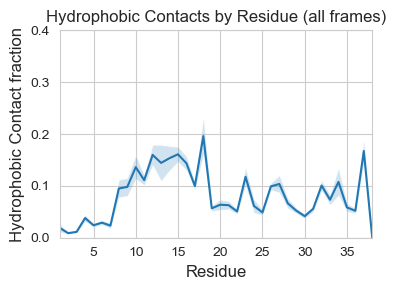

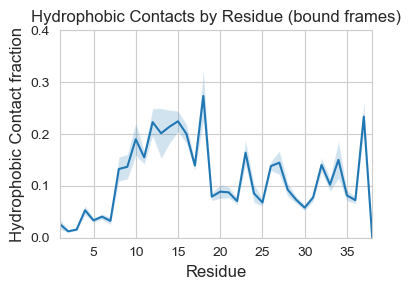

<Figure size 400x300 with 0 Axes>

In [46]:
residues = 38
hydrophob_renum = np.arange(1,residues+1)
# Cast hydrophobic contacts as per residue in each frame
Hphob_res_contacts = np.zeros((n_frames, residues)) # offset because no ligand or NH2
for frame in range(n_frames):
    if np.sum(contact_frames[frame]) > 0:
        contact_pairs = np.where(contact_frames[frame] == 1)
        for j in contact_pairs[0]:
            residue = top.atom(hphob_pairs[j][1]).residue.resSeq
            # the 37th index, or NH2 does not have carbons, so leave out 
            # if residue == 37: 
            #     continue
            # else:
            Hphob_res_contacts[frame][residue-1] = 1


# np.savetxt(outdir+'hphob_contacts.traj.dat', Hphob_res_contacts, '%i')
hphob_ave, hphob_pyb_be = get_blockerrors_pyblock(Hphob_res_contacts, 1.0)
hphob_by_res = np.column_stack(
    (hydrophob_renum, hphob_ave, hphob_pyb_be))
np.savetxt(outdir+'hphob_contacts.be.dat', hphob_by_res)
plt.plot(hydrophob_renum, hphob_by_res[:, 1])
plt.fill_between(hydrophob_renum,
                 hphob_by_res[:, 1]+hphob_by_res[:, 2], hphob_by_res[:, 1]-hphob_by_res[:, 2], alpha=0.2)
plt.title('Hydrophobic Contacts by Residue (all frames)')
plt.xlabel('Residue')
plt.ylabel('Hydrophobic Contact fraction')
plt.xlim(residue_offset, residue_offset+residues-1)
plt.xticks(np.arange(0,residues,5))
plt.xlim(residue_offset,residues)
plt.ylim(0, 0.4)
plt.tight_layout()
# plt.savefig(outdir+"HydrophobicContactFraction.LigandCarbon.ProteinCarbon.pdf")
plt.show()
plt.clf()


hphob_by_res_boundfraction = np.column_stack(
    (hydrophob_renum, hphob_by_res[:, 1]/boundfrac, hphob_by_res[:, 2]/boundfrac))
np.savetxt(outdir+'hphob_contacts.BF.dat', hphob_by_res, fmt='%.4f')
plt.plot(hphob_by_res_boundfraction[:, 0], hphob_by_res_boundfraction[:, 1])
plt.fill_between(hphob_by_res_boundfraction[:, 0], hphob_by_res_boundfraction[:, 1] +
                 hphob_by_res_boundfraction[:, 2], hphob_by_res_boundfraction[:, 1]-hphob_by_res_boundfraction[:, 2], alpha=0.2)
plt.title('Hydrophobic Contacts by Residue (bound frames)')
plt.xlabel('Residue')
plt.ylabel('Hydrophobic Contact fraction')
plt.xlim(residue_offset, residue_offset+residues)
plt.xticks(np.arange(0,residues,5))
plt.xlim(residue_offset,residues)
plt.ylim(0, 0.4)
plt.tight_layout()
# plt.savefig(outdir+"HydrophobicContacts.BoundFraction.pdf")
plt.show()
plt.clf()

In [47]:
n_rings = len(ligand_rings)
print("Ligand Aromatics Rings:", n_rings)

ligand_ring_params = []
for i in range(0, n_rings):
    ring = np.array(ligand_rings[i])
    print(ring)
    positions = trj.xyz[:, ring, :]
    print(ligand_rings[i][0], ligand_rings[i][1], ligand_rings[i][2])
    ligand_centers_normals = get_ring_center_normal_trj_assign_atomid(
        positions, 0, 1, 2)
    ligand_ring_params.append(ligand_centers_normals)

prot_rings = []
aro_residues = []
prot_ring_name = []
prot_ring_index = []

aro_select = top.select("resname TYR PHE HIS TRP and name CA")
for i in aro_select:
    atom = top.atom(i)
    resname = atom.residue.name
    print(atom.index, atom.name, atom.residue.name,
          atom.residue, atom.residue.index)
    if resname == "TYR":
        ring = top.select(
            "resid %s and name CG CD1 CD2 CE1 CE2 CZ" % atom.residue.index)
        print(atom.residue, ring)
    if resname == "TRP":
        ring = top.select(
            "resid %s and name CG CD1 NE1 CE2 CD2 CZ2 CE3 CZ3 CH2" % atom.residue.index)
        print(atom.residue, ring)
    if resname == "HIS":
        ring = top.select("resid %s and name CG ND1 CE1 NE2 CD2" %
                          atom.residue.index)
        print(atom.residue, ring)
    if resname == "PHE":
        ring = top.select(
            "resid %s and name CG CD1 CD2 CE1 CE2 CZ" % atom.residue.index)
        print(atom.residue, ring)
    prot_rings.append(ring)
    prot_ring_name.append(atom.residue)
    prot_ring_index.append(atom.residue.index)


print("Protein Aromatics Rings:", len(prot_rings), prot_ring_name)

prot_ring_params = []
for i in range(0, len(prot_rings)):
    ring = np.array(prot_rings[i])
    positions = trj.xyz[:, ring, :]
    ring_centers_normals = get_ring_center_normal_trj_assign_atomid(
        positions, 0, 1, 2)
    prot_ring_params.append(ring_centers_normals)

Ligand Aromatics Rings: 2
[537 538 539 540 541 542 543 544 545]
537 538 539
() (30500, 3) (30500, 3)
[550 551 552 553 554 555]
550 551 552
() (30500, 3) (30500, 3)
206 CA PHE PHE15 14
PHE15 [211 212 214 216 218 220]
261 CA HIS HIS18 17
HIS18 [266 267 268 270 272]
328 CA PHE PHE23 22
PHE23 [333 334 336 338 340 342]
515 CA TYR TYR37 36
TYR37 [520 521 523 525 528 530]
Protein Aromatics Rings: 4 [PHE15, HIS18, PHE23, TYR37]
() (30500, 3) (30500, 3)
() (30500, 3) (30500, 3)
() (30500, 3) (30500, 3)
() (30500, 3) (30500, 3)


In [48]:
frames = n_frames
sidechains = len(prot_rings)
ligrings = len(ligand_rings)
print(frames, sidechains)
Ringstacked_old = {}
Ringstacked = {}
Quadrants = {}
Stackparams = {}
Aro_Contacts = {}
Pstack = {}
Tstack = {}


def normvector_connect(point1, point2):
    vec = point1-point2
    vec = vec/np.sqrt(np.dot(vec, vec))
    return vec


def angle(v1, v2):
    return np.arccos(np.dot(v1, v2)/(np.sqrt(np.dot(v1, v1))*np.sqrt(np.dot(v2, v2))))


for l in range(0, ligrings):
    name = "Lig_ring.%s" % l
    print(name)
    Stackparams[name] = {}
    Pstack[name] = {}
    Tstack[name] = {}
    Aro_Contacts[name] = {}
    alphas = np.zeros(shape=(frames, sidechains))
    betas = np.zeros(shape=(frames, sidechains))
    dists = np.zeros(shape=(frames, sidechains))
    thetas = np.zeros(shape=(frames, sidechains))
    phis = np.zeros(shape=(frames, sidechains))
    pstacked_old = np.zeros(shape=(frames, sidechains))
    pstacked = np.zeros(shape=(frames, sidechains))
    tstacked = np.zeros(shape=(frames, sidechains))
    stacked = np.zeros(shape=(frames, sidechains))
    aro_contacts = np.zeros(shape=(frames, sidechains))

    for i in range(0, frames):
        ligcenter = ligand_ring_params[l][i][0]
        lignormal = ligand_ring_params[l][i][1]
        for j in range(0, sidechains):
            protcenter = prot_ring_params[j][i][0]
            protnormal = prot_ring_params[j][i][1]
            dists[i, j] = np.linalg.norm(ligcenter-protcenter)
            connect = normvector_connect(protcenter, ligcenter)
            # alpha is the same as phi in gervasio/Procacci definition
            alphas[i, j] = np.rad2deg(angle(connect, protnormal))
            betas[i, j] = np.rad2deg(angle(connect, lignormal))
            theta = np.rad2deg(angle(protnormal, lignormal))
            thetas[i, j] = np.abs(theta)-2*(np.abs(theta)
                                            > 90.0)*(np.abs(theta)-90.0)
            phi = np.rad2deg(angle(protnormal, connect))
            phis[i, j] = np.abs(phi)-2*(np.abs(phi) > 90.0)*(np.abs(phi)-90.0)

    for j in range(0, sidechains):
        name2 = prot_ring_index[j]
        res2 = prot_ring_name[j]
        print(name2, res2)
        Ringstack = np.column_stack(
            (dists[:, j], alphas[:, j], betas[:, j], thetas[:, j], phis[:, j]))
        stack_distance_cutoff = 0.65
        r = np.where(dists[:, j] <= stack_distance_cutoff)[0]
        aro_contacts[:, j][r] = 1

        # New Definitions
        # p-stack: r < 6.5 Å, θ < 60° and ϕ < 60°.
        # t-stack: r < 7.5 Å, 75° < θ < 90° and ϕ < 60°.
        p_stack_distance_cutoff = 0.65
        t_stack_distance_cutoff = 0.75
        r_pstrict = np.where(dists[:, j] <= p_stack_distance_cutoff)[0]
        r_tstrict = np.where(dists[:, j] <= t_stack_distance_cutoff)[0]

        e = np.where(thetas[:, j] <= 45)
        f = np.where(phis[:, j] <= 60)
        g = np.where(thetas[:, j] >= 75)

        pnew = np.intersect1d(np.intersect1d(e, f), r_pstrict)
        tnew = np.intersect1d(np.intersect1d(g, f), r_tstrict)
        pstacked[:, j][pnew] = 1
        tstacked[:, j][tnew] = 1
        stacked[:, j][pnew] = 1
        stacked[:, j][tnew] = 1
        total_stacked = len(pnew)+len(tnew)
        print("Contacts:", len(r), "Total:", total_stacked,
              "P-stack:", len(pnew), "T-stack:", len(tnew))
        Stackparams[name][name2] = Ringstack
    Pstack[name] = pstacked
    Tstack[name] = tstacked
    Aro_Contacts[name] = aro_contacts
    Ringstacked[name] = stacked


30500 4
Lig_ring.0
14 PHE15
Contacts: 1837 Total: 762 P-stack: 434 T-stack: 328
17 HIS18
Contacts: 3738 Total: 947 P-stack: 631 T-stack: 316
22 PHE23
Contacts: 1550 Total: 671 P-stack: 427 T-stack: 244
36 TYR37
Contacts: 2607 Total: 1499 P-stack: 1276 T-stack: 223
Lig_ring.1
14 PHE15
Contacts: 2550 Total: 1073 P-stack: 658 T-stack: 415
17 HIS18
Contacts: 3880 Total: 1052 P-stack: 537 T-stack: 515
22 PHE23
Contacts: 1836 Total: 764 P-stack: 501 T-stack: 263
36 TYR37
Contacts: 1722 Total: 839 P-stack: 640 T-stack: 199


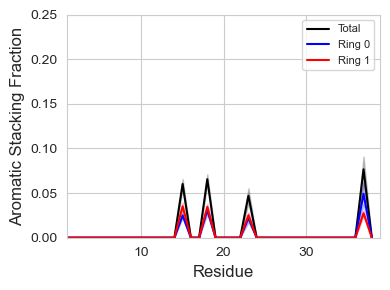

<Figure size 400x300 with 0 Axes>

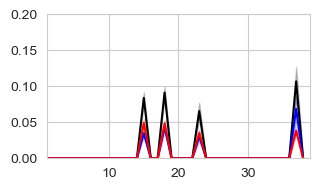

<Figure size 400x300 with 0 Axes>

In [49]:
# Cast aromatic contacts as per residue in each frame
residue_number = range(residue_offset , residues + residue_offset) # not including ligand 
aro_res_index = np.array(prot_ring_index)

aromatic_stacking_contacts_r0 = np.zeros((n_frames, residues))
aromatic_stacking_contacts_r1 = np.zeros((n_frames, residues))
# aromatic_stacking_contacts_r2 = np.zeros((n_frames, residues))
aromatic_stacking_contacts = np.zeros((n_frames, residues))

aromatic_contacts_r0 = np.zeros((n_frames, residues))
aromatic_contacts_r1 = np.zeros((n_frames, residues))
# aromatic_contacts_r2 = np.zeros((n_frames, residues))
aromatic_contacts = np.zeros((n_frames, residues))

# print(aro_res_index)

for i in range(0, len(aro_res_index)):
    aromatic_stacking_contacts_r0[:, aro_res_index[i]
                                  ] = Ringstacked['Lig_ring.0'][:, i]
    aromatic_contacts_r0[:, aro_res_index[i]
                         ] = Aro_Contacts['Lig_ring.0'][:, i]

    aromatic_stacking_contacts_r1[:, aro_res_index[i]
                                  ] = Ringstacked['Lig_ring.1'][:, i]
    aromatic_contacts_r1[:, aro_res_index[i]
                         ] = Aro_Contacts['Lig_ring.1'][:, i]
    
    # aromatic_stacking_contacts_r2[:, aro_res_index[i]
    #                               ] = Ringstacked['Lig_ring.2'][:, i]
    # aromatic_contacts_r2[:, aro_res_index[i]
    #                      ] = Aro_Contacts['Lig_ring.2'][:, i]

    aromatic_stacking_contacts[:, aro_res_index[i]
                               ] += Ringstacked['Lig_ring.0'][:, i]
    aromatic_stacking_contacts[:, aro_res_index[i]
                               ] += Ringstacked['Lig_ring.1'][:, i]
    # aromatic_stacking_contacts[:, aro_res_index[i]
    #                            ] += Ringstacked['Lig_ring.2'][:, i]

    aromatic_contacts[:, aro_res_index[i]] += Aro_Contacts['Lig_ring.0'][:, i]
    aromatic_contacts[:, aro_res_index[i]] += Aro_Contacts['Lig_ring.1'][:, i]
    # aromatic_contacts[:, aro_res_index[i]] += Aro_Contacts['Lig_ring.2'][:, i]


# np.savetxt(outdir+'aromatic_stacking.traj.dat',
#            aromatic_stacking_contacts, '%i')
aro_ave, aro_pyb_be = get_blockerrors_pyblock(aromatic_stacking_contacts, 1.0)
aro_by_res = np.column_stack((residue_number, aro_ave, aro_pyb_be))
# np.savetxt(outdir+'aromatic_stacking.fraction.be.dat', aro_by_res)

# np.savetxt(outdir+'aromatic_stacking.traj.r0.dat',
#            aromatic_stacking_contacts_r0, '%i')
aro_r0_ave, aro_r0_pyb_be = get_blockerrors_pyblock(
    aromatic_stacking_contacts_r0, 1.0)
aro_r0_by_res = np.column_stack(
    (residue_number, aro_r0_ave, aro_r0_pyb_be))
# np.savetxt(outdir+'aromatic_stacking.fraction.r0.be.dat', aro_r0_by_res)

# np.savetxt(outdir+'aromatic_stacking.traj.r1.dat',
#            aromatic_stacking_contacts_r1, '%i')
aro_r1_ave, aro_r1_pyb_be = get_blockerrors_pyblock(
    aromatic_stacking_contacts_r1, 1.0)
aro_r1_by_res = np.column_stack(
    (residue_number, aro_r1_ave, aro_r1_pyb_be))
# np.savetxt(outdir+'aromatic_stacking.fraction.r1.be.dat', aro_r1_by_res)


plt.plot(aro_by_res[:, 0], aro_by_res[:, 1], color='black', label='Total')
plt.fill_between(aro_by_res[:, 0], aro_by_res[:, 1]+aro_by_res[:, 2],
                 aro_by_res[:, 1]-aro_by_res[:, 2], color='black', alpha=0.2)

plt.plot(aro_r0_by_res[:, 0], aro_r0_by_res[:, 1],
         label='Ring 0', color='blue')
plt.fill_between(aro_r0_by_res[:, 0], aro_r0_by_res[:, 1]+aro_r0_by_res[:, 2],
                 aro_r0_by_res[:, 1]-aro_r0_by_res[:, 2], alpha=0.2, color='blue')

plt.plot(aro_r1_by_res[:, 0], aro_r1_by_res[:, 1], label='Ring 1', color='red')
plt.fill_between(aro_r1_by_res[:, 0], aro_r1_by_res[:, 1]+aro_r1_by_res[:, 2],
                 aro_r1_by_res[:, 1]-aro_r1_by_res[:, 2], alpha=0.2, color='red')

# plt.plot(aro_r2_by_res[:, 0], aro_r2_by_res[:, 1], label='Ring 2', color='green')
# plt.fill_between(aro_r2_by_res[:, 0], aro_r2_by_res[:, 1]+aro_r2_by_res[:, 2],
#                  aro_r2_by_res[:, 1]-aro_r2_by_res[:, 2], alpha=0.2, color='green')

plt.legend()
plt.xlabel('Residue')
plt.ylabel('Aromatic Stacking Fraction')
plt.xlim(residue_offset, residue_offset+residues)
plt.ylim(0, 0.25)
plt.tight_layout()
# plt.savefig(outdir+'AromaticStackingFraction.pdf')
plt.show()
plt.clf()


# Scale For Bound Faction
aro_by_res_bf = np.column_stack(
    (residue_number, aro_ave/boundfrac, aro_pyb_be/boundfrac))
np.savetxt(outdir+'aromatic_stacking.boundfraction.be.dat', aro_by_res_bf)

aro_r0_by_res_bf = np.column_stack(
    (residue_number, aro_r0_ave/boundfrac, aro_r0_pyb_be/boundfrac))
# np.savetxt(outdir+'aromatic_stacking.boundfraction.r0.be.dat', aro_r0_by_res_bf)

aro_r1_by_res_bf = np.column_stack(
    (residue_number, aro_r1_ave/boundfrac, aro_r1_pyb_be/boundfrac))
# np.savetxt(outdir+'aromatic_stacking.boundfraction.r1.be.dat', aro_r1_by_res_bf)

# aro_r2_by_res_bf = np.column_stack(
#     (residue_number, aro_r2_ave/boundfrac, aro_r2_pyb_be/boundfrac))
# np.savetxt(outdir+'aromatic_stacking.boundfraction.r2.be.dat', aro_r2_by_res_bf)


plt.figure(figsize=(3.3,2))
plt.plot(aro_by_res_bf[:, 0], aro_by_res_bf[:, 1],
         color='black', label='Total')
plt.fill_between(aro_by_res_bf[:, 0], aro_by_res_bf[:, 1]+aro_by_res_bf[:, 2],
                 aro_by_res_bf[:, 1]-aro_by_res_bf[:, 2], color='black', alpha=0.2)

plt.plot(aro_r0_by_res_bf[:, 0],
         aro_r0_by_res_bf[:, 1], label='Ring 0', color='blue')
plt.fill_between(aro_r0_by_res_bf[:, 0], aro_r0_by_res_bf[:, 1]+aro_r0_by_res_bf[:, 2],
                 aro_r0_by_res_bf[:, 1]-aro_r0_by_res_bf[:, 2], alpha=0.2, color='blue')

plt.plot(aro_r1_by_res_bf[:, 0],
         aro_r1_by_res_bf[:, 1], label='Ring 1', color='red')
plt.fill_between(aro_r1_by_res_bf[:, 0], aro_r1_by_res_bf[:, 1]+aro_r1_by_res_bf[:, 2],
                 aro_r1_by_res_bf[:, 1]-aro_r1_by_res_bf[:, 2], alpha=0.2, color='red')

# plt.plot(aro_r2_by_res_bf[:, 0],
#          aro_r2_by_res_bf[:, 1], label='Ring 2', color='green')
# plt.fill_between(aro_r2_by_res_bf[:, 0], aro_r2_by_res_bf[:, 1]+aro_r2_by_res_bf[:, 2],
#                  aro_r2_by_res_bf[:, 1]-aro_r2_by_res_bf[:, 2], alpha=0.2, color='green')


plt.legend()
# plt.xlabel('Residue')
# plt.ylabel('Aromatic Stacking Fraction')
plt.xlim(residue_offset, residue_offset+residues)
plt.ylim(0, 0.20)
plt.legend(labels=[], frameon=False)
plt.tight_layout()
# plt.title("Bound Fraction")
plt.savefig(outdir+'AromaticStackingFraction.BoundFraction.pdf', dpi=400)
plt.show()
plt.clf()


In [50]:
# aro_contacts 
aro_contacts = Aro_Contacts['Lig_ring.0'] + Aro_Contacts['Lig_ring.1']

aro_indices_one_hot = np.where(np.sum(aro_contacts, axis=1)> 0, 1, 0)

print(get_blockerror_pyblock(aro_indices_one_hot))
# here are the indices of aromatic contacts with ring 0
aro_indices = np.where(aro_indices_one_hot == 1)[0]
print("Fraction of frames with aromatic contacts of ring 1 & 2: ", np.round(len(aro_indices)/ trj.n_frames * 100, 1)," +- ", np.round(get_blockerror_pyblock(aro_indices_one_hot)[1] * 100, 1),  "%")

(np.float64(0.40144262295081967), 0.02837214261296317)
Fraction of frames with aromatic contacts of ring 1 & 2:  40.1  +-  2.8 %


In [51]:

def fraction_hbonds_involving_atoms(traj, atom_indices, frame_indices, distance_cutoff=0.35, angle_cutoff=120.0):
    """
    Compute the fraction of hydrogen bonds involving a set of atom indices over specific frames.

    Parameters
    ----------
    traj : md.Trajectory
        The full MDTraj trajectory.
    atom_indices : list of int
        Atom indices to check for hydrogen bond involvement.
    frame_indices : list of int
        Frame indices to analyze.
    distance_cutoff : float, optional
        Donor-acceptor distance cutoff in nm.
    angle_cutoff : float, optional
        Donor-Hydrogen-Acceptor angle cutoff in degrees.

    Returns
    -------
    fraction : float
        Fraction of hydrogen bonds involving any atom from the given set.
    """
    # Subset the trajectory
    subset_traj = traj.slice(frame_indices)

    # Compute all hydrogen bonds in these frames
    hbonds_all = md.baker_hubbard(subset_traj, periodic=True,
                                  distance_cutoff=distance_cutoff,
                                  angle_cutoff=angle_cutoff)

    if len(hbonds_all) == 0:
        return 0.0

    # Count how many involve the atom_indices
    hbonds_involving_set = [hbond for hbond in hbonds_all if any(atom in atom_indices for atom in hbond)]

    # Return the fraction
    return (len(hbonds_involving_set) / trj.n_frames) 

In [52]:
atom_indices = [545, 544, 543, 548, 549, 575, 561, 565, 594, 567] # donors and acceptors 
atom_indices_tetrahydropyran = [561, 565, 594, 567]
frac = fraction_hbonds_involving_atoms(trj, atom_indices, aro_indices)
print(f"Fraction of hydrogen bonds involving specified atoms: {frac:.4f}")

Fraction of hydrogen bonds involving specified atoms: 0.0001


[2.007 1.997 2.052 ... 1.841 0.207 2.103]


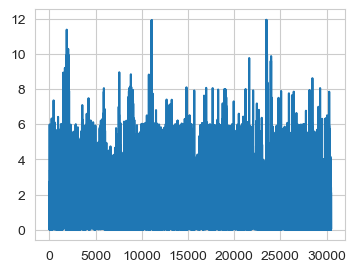

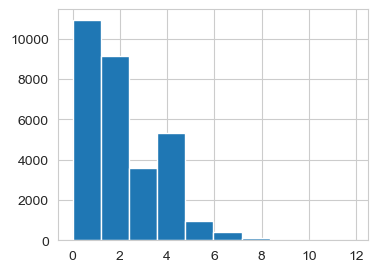

<Figure size 400x300 with 0 Axes>

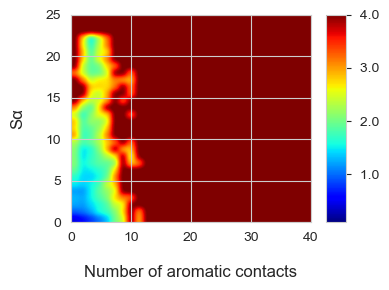

<Figure size 400x300 with 0 Axes>

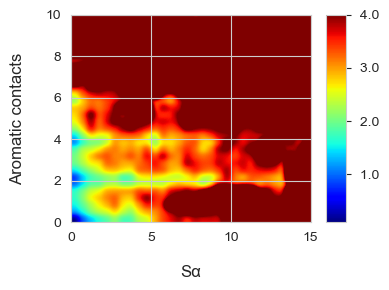

<Figure size 400x300 with 0 Axes>

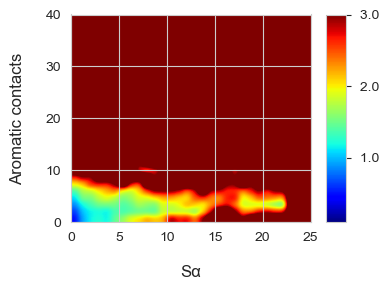

<Figure size 400x300 with 0 Axes>

In [53]:
# Protein-protein
# Cut-off 4A, 7A
# 'closest-heavy'
prot_aromatic_res_index = [14,17,22,36]
aromatic_contact_pairs = []
for i in range(len(prot_aromatic_res_index)):
    aromatic_contact_pair = []
    for j in range(len(prot_aromatic_res_index)): 
        pair = [prot_aromatic_res_index[i], prot_aromatic_res_index[j]]
        dist = md.compute_contacts(trj, [pair], scheme='closest-heavy')
        dists = np.asarray(dist[0]).astype(float)
        switch_aro = sigmoid(dists*10, 3, -16.3)
        aromatic_contact_pair.append(switch_aro)
    aromatic_contact_pairs.append(aromatic_contact_pair) 
aromatic_contact_pairs = np.asarray(aromatic_contact_pairs).astype(float)
aromatic_contact_sum = aromatic_contact_pairs.sum(axis = 0).sum(axis = 0)- len(prot_aromatic_res_index)
aromatic_contact_sum = aromatic_contact_sum[:,0]
print(aromatic_contact_sum)
plt.plot(aromatic_contact_sum)
plt.show()
plt.clf()

plt.hist(aromatic_contact_sum)
plt.show()
plt.clf()


dG, xedges, yedges = free_energy(Sa_total, aromatic_contact_sum, 150, 0, 25, 0, 40)

fig = plt.figure(figsize=(4, 3))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4]
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("Sα", labelpad=15)
plt.xlabel("Number of aromatic contacts", labelpad=15)
plt.axes(cb.ax)
plt.clim(vmin=0.1, vmax=4.0)
plt.tight_layout()
# np.savetxt(outdir+'Sa_v_aromatic.dG.dat', dG)
# plt.savefig(outdir+'Sa_v_aromatic.pdf')
plt.show()
plt.clf()


dG, xedges, yedges = free_energy(aromatic_contact_sum[contact_index], Sa_total[contact_index], 300, 0, 10, 0, 15)

fig = plt.figure(figsize=(4, 3))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4]
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.xlabel("Sα", labelpad=15)
plt.ylabel("Aromatic contacts", labelpad=15)
plt.axes(cb.ax)
plt.clim(vmin=0.1, vmax=4.0)
plt.tight_layout()
plt.show()
plt.clf()
# np.savetxt(outdir+'Sa_v_aromatic.dG.dat', dG)
# plt.savefig(outdir+'Sa_v_aromatic.bf.pdf')

dG, xedges, yedges = free_energy(aromatic_contact_sum[contact_index], Sa_total[contact_index], 150, 0, 40, 0, 25)

fig = plt.figure(figsize=(4, 3))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3]
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.xlabel("Sα",labelpad=15)
plt.ylabel("Aromatic contacts",labelpad=15)

plt.axes(cb.ax)
plt.clim(vmin=0.1, vmax=3.0)
plt.tight_layout()
plt.show()
plt.clf()
# np.savetxt(outdir+'Sa_v_aromatic.dG.dat', dG)
# plt.savefig(outdir+'Sa_v_aromatic.bf.pdf')

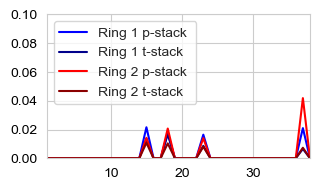

<Figure size 400x300 with 0 Axes>

In [54]:
# Cast aromatic contacts as per residue in each frame
aro_res_index = np.array(prot_ring_index)

aromatic_stacking_contacts_r0_p = np.zeros((n_frames, residues))
aromatic_stacking_contacts_r0_t = np.zeros((n_frames, residues))
aromatic_stacking_contacts_r1_p = np.zeros((n_frames, residues))
aromatic_stacking_contacts_r1_t = np.zeros((n_frames, residues))

for i in range(0, len(aro_res_index)):
    aromatic_stacking_contacts_r0_p[:,
                                    aro_res_index[i]] = Pstack['Lig_ring.0'][:, i]
    aromatic_stacking_contacts_r1_p[:,
                                    aro_res_index[i]] = Pstack['Lig_ring.1'][:, i]
    aromatic_stacking_contacts_r0_t[:,
                                    aro_res_index[i]] = Tstack['Lig_ring.0'][:, i]
    aromatic_stacking_contacts_r1_t[:,
                                    aro_res_index[i]] = Tstack['Lig_ring.1'][:, i]

# np.savetxt(outdir+'aromatic_pstacking.traj.r0.dat',
#            aromatic_stacking_contacts_r0_p, '%i')
aromatic_pstacking_fraction_r0 = np.sum(
    aromatic_stacking_contacts_r0_p, axis=0)/trj.n_frames
# np.savetxt(outdir+'aromatic_pstacking.traj.r1.dat',
#            aromatic_stacking_contacts_r1_p, '%i')
aromatic_pstacking_fraction_r1 = np.sum(
    aromatic_stacking_contacts_r1_p, axis=0)/trj.n_frames

# np.savetxt(outdir+'aromatic_tstacking.traj.r0.dat',
#            aromatic_stacking_contacts_r0_t, '%i')
aromatic_tstacking_fraction_r0 = np.sum(
    aromatic_stacking_contacts_r0_t, axis=0)/trj.n_frames
# np.savetxt(outdir+'aromatic_tstacking.traj.r1.dat',
#            aromatic_stacking_contacts_r1_t, '%i')
aromatic_tstacking_fraction_r1 = np.sum(
    aromatic_stacking_contacts_r1_t, axis=0)/trj.n_frames


aromatic_by_res_r0_p = np.column_stack(
    (residue_number, aromatic_pstacking_fraction_r0/boundfrac))
# np.savetxt(outdir+'aromatic_pstacking.fraction.r0.dat',
#            aromatic_by_res_r0_p, fmt='%.4f')
aromatic_by_res_r0_t = np.column_stack(
    (residue_number, aromatic_tstacking_fraction_r0/boundfrac))
# np.savetxt(outdir+'aromatic_tstacking.fraction.r0.dat',
#            aromatic_by_res_r0_t, fmt='%.4f')
aromatic_by_res_r1_p = np.column_stack(
    (residue_number, aromatic_pstacking_fraction_r1/boundfrac))
# np.savetxt(outdir+'aromatic_pstacking.fraction.r1.dat',
#            aromatic_by_res_r1_p, fmt='%.4f')
aromatic_by_res_r1_t = np.column_stack(
    (residue_number, aromatic_tstacking_fraction_r1/boundfrac))
# np.savetxt(outdir+'aromatic_tstacking.fraction.r1.dat',
#            aromatic_by_res_r1_t, fmt='%.4f')


plt.figure(figsize=(3.3, 2.0))
plt.plot(residue_number, aromatic_pstacking_fraction_r1,
         label='Ring 1 p-stack ', color='blue')
plt.plot(residue_number, aromatic_tstacking_fraction_r1,
         label='Ring 1 t-stack ', color='darkblue')
plt.plot(residue_number, aromatic_pstacking_fraction_r0,
         label='Ring 2 p-stack ', color='red')
plt.plot(residue_number, aromatic_tstacking_fraction_r0,
         label='Ring 2 t-stack ', color='darkred')

plt.legend(fontsize=10)
# plt.xlabel('Residue')
# plt.ylabel('Aromatic Stacking Fraction')
plt.xticks(color="k")
plt.yticks(color="k")
plt.xlim(residue_offset, residue_offset+residues-1)
plt.ylim(0, 0.10)
plt.tight_layout()
# plt.savefig(outdir+'AromaticStackingFraction.p_vs_t.pdf', dpi=400)
plt.show()
plt.clf()


In [55]:
sidechains = len(prot_rings)
print(n_frames)
stack_distance_cutoff = 0.65
bound_fraction = boundfrac
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print("Ring_Contacts", "Stacked", "P-stacked", "T-stacked")
for j in range(0, sidechains):
    name = prot_ring_index[j]
    res = prot_ring_name[j]
    theta = Stackparams['Lig_ring.0'][name][:, 3]
    newtheta = np.abs(theta)-2*(np.abs(theta) > 90.0)*(np.abs(theta)-90.0)
    phi = Stackparams['Lig_ring.0'][name][:, 4]
    newphi = np.abs(phi)-2*(np.abs(phi) > 90.0)*(np.abs(phi)-90.0)
    # Procacci: We define p-stack a domain S in the r, θ, ϕ space as the subset of points such that 3.5 < r < 4.5 Å, θ < 15° and ϕ < 30°.
    # Here: p-stack a domain S in the r<0.6, θ < 45° and ϕ < 45°.
    contacts = np.where(Stackparams['Lig_ring.0']
                        [name][:, 0] <= stack_distance_cutoff)
    b = np.where(newtheta[contacts] <= 45)
    c = np.where(newphi[contacts] <= 60)
    pstack = np.intersect1d(b, c)
    # Procacci: T-stack is the volume of the following T domain: 4.5 < r < 5.5 Å, 75° < θ < 90° and ϕ < 15°.
    # Here :  r < 6.0 Å, 75° < θ < 90° and ϕ < 15°.
    d = np.where(newtheta[contacts] >= 75)
    e = np.where(newphi[contacts] <= 60)
    tstack = np.intersect1d(d, e)
    print(name, res)
    arocontacts = len(contacts[0])/n_frames
    stacked = (len(pstack)+len(tstack))/n_frames
    pstacked = len(pstack)/n_frames
    tstacked = len(tstack)/n_frames
    print("Ring 0: %6.3lf %6.3lf %6.3lf %6.3lf" %
          (arocontacts, stacked, pstacked, tstacked))

    theta = Stackparams['Lig_ring.1'][name][:, 3]
    newtheta = np.abs(theta)-2*(np.abs(theta) > 90.0)*(np.abs(theta)-90.0)
    phi = Stackparams['Lig_ring.1'][name][:, 4]
    newphi = np.abs(phi)-2*(np.abs(phi) > 90.0)*(np.abs(phi)-90.0)
    # Procacci: We define p-stack a domain S in the r, θ, ϕ space as the subset of points such that 3.5 < r < 4.5 Å, θ < 15° and ϕ < 30°.
    # Here: p-stack a domain S in the r<0.6, θ < 45° and ϕ < 60°.
    contacts = np.where(Stackparams['Lig_ring.1']
                        [name][:, 0] <= stack_distance_cutoff)
    b = np.where(newtheta[contacts] <= 45)
    c = np.where(newphi[contacts] <= 60)
    pstack = np.intersect1d(b, c)
    # Procacci: T-stack is the volume of the following T domain: 4.5 < r < 5.5 Å, 75° < θ < 90° and ϕ < 15°.
    # Here :  r < 7.5 Å, 45° < θ and ϕ < 60°.
    d = np.where(newtheta[contacts] >= 75)
    e = np.where(newphi[contacts] <= 60)
    tstack = np.intersect1d(c, e)
    arocontacts = len(contacts[0])/n_frames
    stacked = (len(pstack)+len(tstack))/n_frames
    pstacked = len(pstack)/n_frames
    tstacked = len(tstack)/n_frames
    print("Ring 1: %6.3lf %6.3lf %6.3lf %6.3lf" %
          (arocontacts, stacked, pstacked, tstacked))


30500
Ring_Contacts Stacked P-stacked T-stacked
14 PHE15
Ring 0:  0.060  0.021  0.014  0.006
Ring 1:  0.084  0.073  0.022  0.051
17 HIS18
Ring 0:  0.123  0.028  0.021  0.007
Ring 1:  0.127  0.062  0.018  0.044
22 PHE23
Ring 0:  0.051  0.019  0.014  0.005
Ring 1:  0.060  0.053  0.016  0.037
36 TYR37
Ring 0:  0.085  0.046  0.042  0.004
Ring 1:  0.056  0.064  0.021  0.043


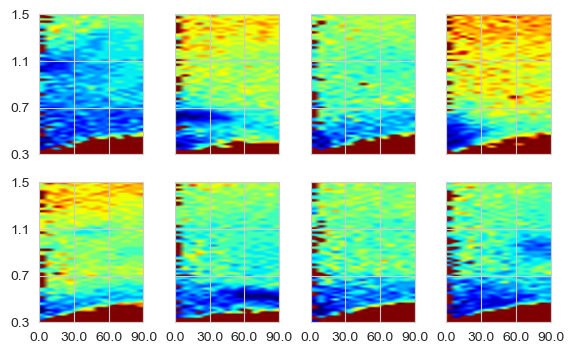

<Figure size 400x300 with 0 Axes>

In [56]:
sidechains = len(prot_rings)
fig, ax = plt.subplots(2, sidechains, figsize=(6.6, 4), sharey=True, sharex=True)

y0 = 0
ymax = 90.0
x0 = 0.3
xmax = 1.5
maxangle = ymax
maxdist = xmax
mindist = x0
minangle = y0

j = 0
name = prot_ring_index[j]
res = prot_ring_name[j]
theta = Stackparams['Lig_ring.0'][name][:, 3]
newtheta = np.abs(theta)-2*(np.abs(theta) > 90.0)*(np.abs(theta)-90.0)
d = Stackparams['Lig_ring.0'][name][:, 0]
a, xedges, yedges = np.histogram2d(d, newtheta, [65, 15], [[x0, xmax], [
                                   y0, ymax]], density=True, weights=None)
bin_centers_d = np.zeros((len(xedges)-1, len(yedges)-1))
bin_centers_theta = np.zeros((len(xedges)-1, len(yedges)-1))
norm = np.zeros((len(xedges)-1, len(yedges)-1))
kbT = 300*0.008314/4.184  # kT in kcal/mol

for i in range(1, len(xedges)):
    for j in range(1, len(yedges)):
        bin_centers_d[i-1, j-1] = (xedges[i-1]+xedges[i])/2
        bin_centers_theta[i-1, j-1] = (yedges[j-1]+yedges[j])/2

for i in range(1, len(xedges)):
    for j in range(1, len(yedges)):
        dist = bin_centers_d[i-1, j-1]
        thet = bin_centers_theta[i-1, j-1]
        norm[i-1, j-1] = np.sin(np.deg2rad(thet))*dist**2*a.sum()

for j in range(0, sidechains):
    name = prot_ring_index[j]
    res = prot_ring_name[j]
    theta = Stackparams['Lig_ring.0'][name][:, 3]
    newtheta = np.abs(theta)-2*(np.abs(theta) > 90.0)*(np.abs(theta)-90.0)
    d = Stackparams['Lig_ring.0'][name][:, 0]
    a, xedges, yedges = np.histogram2d(d, newtheta, [65, 15], [[x0, xmax], [
                                       y0, ymax]], density=True, weights=None)

    kbT = 300*0.008314/4.184  # kT in kcal/mol
    dG_norm = np.log((a/norm)+.000001)
    dG_norm = -(kbT)*dG_norm  # Convert to kcal/mol
    minvalue = np.min(dG_norm)
    dG_norm = dG_norm-minvalue
    fes_cutoff = 3.60
    above_threshold = np.where(dG_norm > 5)
    dG_norm[above_threshold] = 5
    # ax[0, j].set_title("%s %s" % (name, res), fontsize=12)
    # ax[0, j].set_title("%s " % (res), fontsize=12)
    ax[0, j].set_xticks(np.linspace(0, maxangle, 4))
    ax[0, j].set_yticks(np.linspace(mindist, maxdist, 4))
    ax[0, j].set_xticklabels([str(round(a, 2))
                             for a in np.linspace(0, maxangle, 4)])
    ax[0, j].set_yticklabels([str(round(a, 2))
                             for a in np.linspace(mindist, maxdist, 4)])
    cmap = plt.get_cmap('jet', 15)
    maxangle = ymax
    maxdist = xmax
    ax[0, j].imshow(dG_norm, extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],
                    origin='lower', aspect='auto', cmap=cmap, interpolation='spline36', vmin=0, vmax=4)

    theta = Stackparams['Lig_ring.1'][name][:, 3]
    newtheta = np.abs(theta)-2*(np.abs(theta) > 90.0)*(np.abs(theta)-90.0)
    d = Stackparams['Lig_ring.1'][name][:, 0]
    a, xedges, yedges = np.histogram2d(d, newtheta, [65, 15], [[x0, xmax], [
                                       y0, ymax]], density=True, weights=None)
    dG_norm = np.log((a/norm)+.000001)
    dG_norm = -(kbT)*dG_norm  # Convert to kcal/mol
    minvalue = np.min(dG_norm)
    dG_norm = dG_norm-minvalue
    fes_cutoff = 3.60
    above_threshold = np.where(dG_norm > 5)
    dG_norm[above_threshold] = 5
    cax = ax[1, j].imshow(dG_norm, extent=[0, maxangle, mindist, maxdist], origin='lower',
                    aspect='auto', cmap=cmap, interpolation='spline36', vmin=0, vmax=4)
    # ax[1, j].set_title("%s %s" % (name, res), fontsize=12)
    # ax[1, j].set_title("%s " % (res), fontsize=12)
    ax[1, j].set_xticks(np.linspace(0, maxangle, 4))
    ax[1, j].set_yticks(np.linspace(mindist, maxdist, 4))
    ax[1, j].set_xticklabels([str(round(a, 2))
                             for a in np.linspace(0, maxangle, 4)])
    ax[1, j].set_yticklabels([str(round(a, 2))
                             for a in np.linspace(mindist, maxdist, 4)])
plt.subplots_adjust(wspace=0.3)  
# plt.savefig(outdir+'AromaticStackingFraction.RvTheta.pdf', dpi=300)
plt.show()
plt.clf()

/var/folders/dm/wwztwm7s07d_s0pbc4_c0y_c0000gn/T/ipykernel_1909/2901612959.py:4: UserWarning: Adding colorbar to a different Figure <Figure size 660x400 with 8 Axes> than <Figure size 20x250 with 1 Axes> which fig.colorbar is called on.
  colorbar = fig2.colorbar(cax, cax=ax2, orientation='vertical')


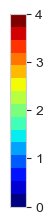

<Figure size 400x300 with 0 Axes>

In [57]:
# Create a separate figure for the colorbar
fig2, ax2 = plt.subplots(figsize=(0.2, 2.5))  # Adjust the size for the colorbar figure
# Add the colorbar in the new figure
colorbar = fig2.colorbar(cax, cax=ax2, orientation='vertical')
colorbar.ax.tick_params(labelsize=10)
# plt.savefig(outdir+'AromaticStackingFraction.RvTheta.colorbar.pdf', dpi=300, bbox_inches="tight")
plt.show()
plt.clf()

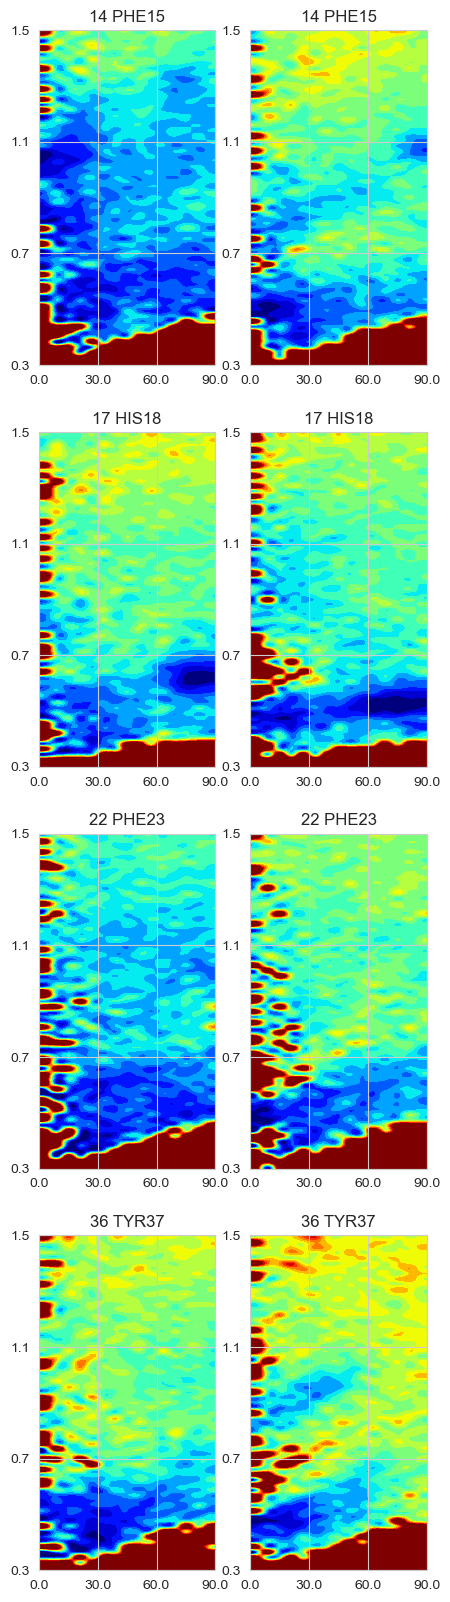

<Figure size 400x300 with 0 Axes>

In [58]:
sidechains = len(prot_rings)
fig, ax = plt.subplots(sidechains, 2, figsize=(5, 20))

y0 = 0
ymax = 90.0
x0 = 0.3
xmax = 1.5
maxangle = ymax
maxdist = xmax
mindist = x0
minangle = y0

j = 0
name = prot_ring_index[j]
res = prot_ring_name[j]
phi = Stackparams['Lig_ring.0'][name][:, 4]
newphi = np.abs(theta)-2*(np.abs(theta) > 90.0)*(np.abs(phi)-90.0)
d = Stackparams['Lig_ring.0'][name][:, 0]
a, xedges, yedges = np.histogram2d(d, newtheta, [65, 15], [[x0, xmax], [
                                   y0, ymax]], density=True, weights=None)
bin_centers_d = np.zeros((len(xedges)-1, len(yedges)-1))
bin_centers_theta = np.zeros((len(xedges)-1, len(yedges)-1))
norm = np.zeros((len(xedges)-1, len(yedges)-1))
kbT = 300*0.008314/4.184  # kT in kcal/mol

for i in range(1, len(xedges)):
    for j in range(1, len(yedges)):
        bin_centers_d[i-1, j-1] = (xedges[i-1]+xedges[i])/2
        bin_centers_theta[i-1, j-1] = (yedges[j-1]+yedges[j])/2

for i in range(1, len(xedges)):
    for j in range(1, len(yedges)):
        dist = bin_centers_d[i-1, j-1]
        thet = bin_centers_theta[i-1, j-1]
        norm[i-1, j-1] = np.sin(np.deg2rad(thet))*dist**2*a.sum()

for j in range(0, sidechains):
    name = prot_ring_index[j]
    res = prot_ring_name[j]
    phi = Stackparams['Lig_ring.0'][name][:, 4]
    newphi = np.abs(phi)-2*(np.abs(phi) > 90.0)*(np.abs(phi)-90.0)
    d = Stackparams['Lig_ring.0'][name][:, 0]
    a, xedges, yedges = np.histogram2d(
        d, newphi, [65, 15], [[x0, xmax], [y0, ymax]], density=True, weights=None)

    kbT = 300*0.008314/4.184  # kT in kcal/mol
    dG_norm = np.log((a/norm)+.000001)
    dG_norm = -(kbT)*dG_norm  # Convert to kcal/mol
    minvalue = np.min(dG_norm)
    dG_norm = dG_norm-minvalue
    fes_cutoff = 3.60
    above_threshold = np.where(dG_norm > 5)
    dG_norm[above_threshold] = 5
    ax[j, 0].set_title("%s %s" % (name, res), fontsize=12)
    ax[j, 0].set_xticks(np.linspace(0, maxangle, 4))
    ax[j, 0].set_yticks(np.linspace(mindist, maxdist, 4))
    ax[j, 0].set_xticklabels([str(round(a, 2))
                             for a in np.linspace(0, maxangle, 4)])
    ax[j, 0].set_yticklabels([str(round(a, 2))
                             for a in np.linspace(mindist, maxdist, 4)])
    cmap = plt.get_cmap('jet', 15)
    maxangle = ymax
    maxdist = xmax
    ax[j, 0].imshow(dG_norm, extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],
                    origin='lower', aspect='auto', cmap=cmap, interpolation='spline36', vmin=0, vmax=4)
    phi = Stackparams['Lig_ring.1'][name][:, 4]
    newphi = np.abs(phi)-2*(np.abs(phi) > 90.0)*(np.abs(phi)-90.0)
    d = Stackparams['Lig_ring.1'][name][:, 0]
    a, xedges, yedges = np.histogram2d(
        d, newphi, [65, 15], [[x0, xmax], [y0, ymax]], density=True, weights=None)
    dG_norm = np.log((a/norm)+.000001)
    dG_norm = -(kbT)*dG_norm  # Convert to kcal/mol
    minvalue = np.min(dG_norm)
    dG_norm = dG_norm-minvalue
    fes_cutoff = 3.60
    above_threshold = np.where(dG_norm > 5)
    dG_norm[above_threshold] = 5
    ax[j, 1].imshow(dG_norm, extent=[0, maxangle, mindist, maxdist], origin='lower',
                    aspect='auto', cmap=cmap, interpolation='spline36', vmin=0, vmax=4)
    ax[j, 1].set_title("%s %s" % (name, res), fontsize=12)
    ax[j, 1].set_title("%s %s" % (name, res), fontsize=12)
    ax[j, 1].set_xticks(np.linspace(0, maxangle, 4))
    ax[j, 1].set_yticks(np.linspace(mindist, maxdist, 4))
    ax[j, 1].set_xticklabels([str(round(a, 2))
                             for a in np.linspace(0, maxangle, 4)])
    ax[j, 1].set_yticklabels([str(round(a, 2))
                             for a in np.linspace(mindist, maxdist, 4)])
    cmap = plt.get_cmap('jet', 15)

# plt.savefig(outdir+'AromaticStackingFraction.RvPhi.pdf')
plt.show()
plt.clf()

In [59]:
# Select Ligand Residues
ligand = top.select("resid 38")
# Select Protein Residues
protein = top.select("resid 0 to 37")


HBond_PD = np.zeros((n_frames, residues))
HBond_LD = np.zeros((n_frames, residues))
Hbond_pairs_PD = {}
Hbond_pairs_LD = {}


def add_hbond_pair(donor, acceptor, hbond_pairs, donor_res):
    """
    counting the types of bonds with a dictionary donor_res-->donor-->accepptor
    """
    if donor_res not in hbond_pairs:
        hbond_pairs[donor_res] = {}
    if donor not in hbond_pairs[donor_res]:
        hbond_pairs[donor_res][donor] = {}
    if acceptor not in hbond_pairs[donor_res][donor]:
        hbond_pairs[donor_res][donor][acceptor] = 0
    hbond_pairs[donor_res][donor][acceptor] += 1

# Donor & Acceptors Definitions from DESRES paper:
# ligdon = mol.select('chain B and (nitrogen or oxygen or sulfur) and (withinbonds 1 of hydrogen)')
# ligacc = mol.select('chain B and (nitrogen or oxygen or sulfur)')
# protdon = mol.select('chain A and (nitrogen or oxygen or sulfur) and (withinbonds 1 of hydrogen)')
# protacc = mol.select('chain A and (nitrogen or oxygen or sulfur)')


for frame in range(n_frames):
    hbonds = baker_hubbard2(trj[frame], angle_cutoff=150,
                            distance_cutoff=0.35, lig_donor_index=lig_hbond_donors)
    for hbond in hbonds:
        if ((hbond[0] in protein) and (hbond[2] in ligand)):
            donor = top.atom(hbond[0])
            donor_id = hbond[0]
            donor_res = top.atom(hbond[0]).residue.resSeq
            acc = top.atom(hbond[2])
            acc = top.atom(hbond[2])
            acc_res = top.atom(hbond[2]).residue.resSeq
            HBond_PD[frame][donor_res - 1] = 1 # off by one due to indexing 
            add_hbond_pair(donor, acc, Hbond_pairs_PD, donor_res)

        if ((hbond[0] in ligand) and (hbond[2] in protein)):
            donor = top.atom(hbond[0])
            donor_id = hbond[0]
            donor_res = top.atom(hbond[0]).residue.resSeq
            acc = top.atom(hbond[2])
            acc_id = hbond[2]
            acc_res = top.atom(hbond[2]).residue.resSeq
            HBond_LD[frame][acc_res - 1] = 1 # off by one due to indexing 
            add_hbond_pair(donor, acc, Hbond_pairs_LD, acc_res)


Here, we define a couple probabilities that are used in the main text between the ligand and protein interactions 
1. probability of least aromatic contact 
2. probability of at least 1 hydrogen bond  
2. probability of at least 1 aromatic contact and hydrogen bond 

In [60]:
# aro_contacts 
aro_contacts = Aro_Contacts['Lig_ring.0'] + Aro_Contacts['Lig_ring.1']

aro_indices_one_hot = np.where(np.sum(aro_contacts, axis=1)> 0, 1, 0)

print(get_blockerror_pyblock(aro_indices_one_hot))
# here are the indices of aromatic contacts with ring 0
aro_indices = np.where(aro_indices_one_hot == 1)[0]
print("Fraction of frames with aromatic contacts of ring 1 & 2: ", np.round(len(aro_indices)/ trj.n_frames * 100, 1)," +- ", np.round(get_blockerror_pyblock(aro_indices_one_hot)[1] * 100, 1),  "%")

(np.float64(0.40144262295081967), 0.02837214261296317)
Fraction of frames with aromatic contacts of ring 1 & 2:  40.1  +-  2.8 %


In [ ]:
aro_frac_r1 = np.where(np.sum(Aro_Contacts['Lig_ring.0'] , axis=1)> 0, 1, 0)
print(get_blockerror_pyblock(aro_frac_r1))
aro_frac_r2 = np.where(np.sum(Aro_Contacts['Lig_ring.1'] , axis=1)> 0, 1, 0)
print(get_blockerror_pyblock(aro_frac_r2))

(np.float64(0.2677377049180328), 0.02429664406463665)
(np.float64(0.2998360655737705), 0.027809809124149102)


In [ ]:
# want to view acceptors and donors
atom_indices = [545, 544, 543, 548, 549, 575, 561, 565, 594, 567] 
one_hot_hbond = np.zeros(shape = (n_frames), dtype=int)
for frame in range(n_frames): 
        hbonds_all = md.baker_hubbard(trj[frame], angle_cutoff=150, distance_cutoff=0.35, freq=0.0 )
        hbonds_involving_idx = [hbond for hbond in hbonds_all if any(atom in atom_indices for atom in hbond)]

        # one hot encode if 
        if len(hbonds_involving_idx) > 0:
            one_hot_hbond[frame] = 1

In [ ]:
hbond_frac, hbond_frac_be = get_blockerror_pyblock(one_hot_hbond)
print(f"Average HBOND fraction: {hbond_frac*100:.1f} +- {hbond_frac_be*100:.1f} %")

hbond_indices = np.where(one_hot_hbond == 1)[0]
hbond_aro_indices = np.intersect1d(hbond_indices, aro_indices)
hbond_aro_one_hot = np.zeros(shape=(n_frames), dtype=int)
hbond_aro_one_hot[hbond_aro_indices] = 1
hbond_aro_frac, hbond_aro_frac_be = get_blockerror_pyblock(hbond_aro_one_hot)
print(f"Average HBOND fraction involving aromatic contacts: {hbond_aro_frac*100:.1f} +- {hbond_aro_frac_be*100:.1f} %")

Average HBOND fraction: 33.7 +- 1.7 %
Average HBOND fraction involving aromatic contacts: 22.3 +- 2.4 %


In [ ]:
atom_indices = [565, 594, 567] 
one_hot_hbond = np.zeros(shape = (n_frames), dtype=int)
for frame in range(n_frames): 
        hbonds_all = md.baker_hubbard(trj[frame], angle_cutoff=150, distance_cutoff=0.35, freq=0.0 )
        hbonds_involving_idx = [hbond for hbond in hbonds_all if any(atom in atom_indices for atom in hbond)]

        # one hot encode if 
        if len(hbonds_involving_idx) > 0:
            one_hot_hbond[frame] = 1
# get it for just the tetrahydropyran ring and substituents
hbond_frac, hbond_frac_be = get_blockerror_pyblock(one_hot_hbond)
print(f"Average HBOND fraction: {hbond_frac*100:.1f} +- {hbond_frac_be*100:.1f} %")

Average HBOND fraction: 3.8 +- 0.3 %


In [ ]:
atom_indices = [565] 
one_hot_hbond = np.zeros(shape = (n_frames), dtype=int)
for frame in range(n_frames): 
        hbonds_all = md.baker_hubbard(trj[frame], angle_cutoff=150, distance_cutoff=0.35, freq=0.0 )
        hbonds_involving_idx = [hbond for hbond in hbonds_all if any(atom in atom_indices for atom in hbond)]

        # one hot encode if 
        if len(hbonds_involving_idx) > 0:
            one_hot_hbond[frame] = 1
# get it for just the tetrahydropyran ring O
hbond_frac, hbond_frac_be = get_blockerror_pyblock(one_hot_hbond)
print(f"Average HBOND fraction: {hbond_frac*100:.1f} +- {hbond_frac_be*100:.1f} %")

Average HBOND fraction: 0.4 +- 0.0 %


Finally, we compute per-residue interaction probabilities. 

In [ ]:
residue_number = range(residue_offset, residues + residue_offset) # to include ligand? 

HB_Total = HBond_PD+HBond_LD
HB_Total_ave = np.mean(HB_Total, axis=0)


PD_ave = np.mean(HBond_PD, axis=0)
LD_ave = np.mean(HBond_LD, axis=0)


# np.savetxt(outdir+'Hbond.PD.traj.dat', HBond_PD, '%i')
# np.savetxt(outdir+'Hbond.LD.traj.dat', HBond_LD, '%i')
# np.savetxt(outdir+'Hbond.all.traj.dat', HB_Total, '%i')
hbond_by_res = np.column_stack((residue_number, HB_Total_ave))
hbond_by_res_PD = np.column_stack((residue_number, PD_ave))
hbond_by_res_LD = np.column_stack((residue_number, LD_ave))


HBond_PD_ave, HBond_PD_pyb_be = get_blockerrors_pyblock(HBond_PD, 1.0)
HBond_LD_ave, HBond_LD_pyb_be = get_blockerrors_pyblock(HBond_LD, 1.0)
HBond_ave, HBond_pyb_be = get_blockerrors_pyblock(HB_Total, 1.0)

Hbond_by_res = np.column_stack(
    (residue_number, HBond_ave, HBond_pyb_be))
Hbond_by_res_bf = np.column_stack(
    (residue_number, HBond_ave/boundfrac, HBond_pyb_be/boundfrac))
np.savetxt(outdir+'hbond_fraction.be.dat', Hbond_by_res)
np.savetxt(outdir+'hbond_fraction.boundfraction.be.dat', Hbond_by_res_bf)


Hbond_by_res_LD = np.column_stack(
    (residue_number, HBond_LD_ave, HBond_LD_pyb_be))
np.savetxt(outdir+'hbond_fraction.PD.be.dat', Hbond_by_res_LD)
Hbond_by_res_LD_bf = np.column_stack(
    (residue_number, HBond_LD_ave/boundfrac, HBond_LD_pyb_be/boundfrac))
np.savetxt(outdir+'hbond_fraction.PD.boundfraction.be.dat', Hbond_by_res_LD_bf)


Hbond_by_res_PD = np.column_stack(
    (residue_number, HBond_PD_ave, HBond_PD_pyb_be))
np.savetxt(outdir+'hbond_fraction.LD.be.dat', Hbond_by_res_PD)
Hbond_by_res_PD_bf = np.column_stack(
    (residue_number, HBond_PD_ave/boundfrac, HBond_PD_pyb_be/boundfrac))
np.savetxt(outdir+'hbond_fraction.PD.boundfraction.be.dat', Hbond_by_res_PD_bf)


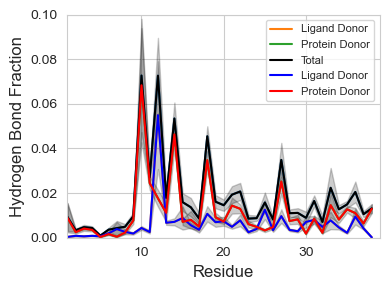

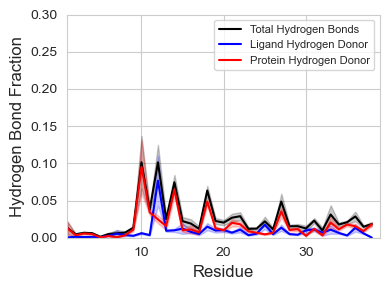

<Figure size 400x300 with 0 Axes>

In [ ]:
residue_number = range(residue_offset, residue_offset+residues)
plt.plot(residue_number, HB_Total_ave)
plt.plot(residue_number, LD_ave, label="Ligand Donor")
plt.plot(residue_number, PD_ave, label="Protein Donor")


plt.plot(Hbond_by_res[:, 0], Hbond_by_res[:, 1], color='black', label='Total')
plt.fill_between(Hbond_by_res[:, 0], Hbond_by_res[:, 1]+Hbond_by_res[:, 2],
                 Hbond_by_res[:, 1]-Hbond_by_res[:, 2], color='black', alpha=0.2)
plt.plot(Hbond_by_res_LD[:, 0], Hbond_by_res_LD[:, 1],
         color='blue', label='Ligand Donor')
plt.fill_between(Hbond_by_res_LD[:, 0], Hbond_by_res_LD[:, 1]+Hbond_by_res_LD[:, 2],
                 Hbond_by_res_LD[:, 1]-Hbond_by_res_LD[:, 2], color='black', alpha=0.2)
plt.plot(Hbond_by_res_PD[:, 0], Hbond_by_res_PD[:, 1],
         color='red', label='Protein Donor')
plt.fill_between(Hbond_by_res_PD[:, 0], Hbond_by_res_PD[:, 1]+Hbond_by_res_PD[:, 2],
                 Hbond_by_res_PD[:, 1]-Hbond_by_res_PD[:, 2], color='black', alpha=0.2)


plt.legend()
plt.ylim(0, 0.10)
plt.xlabel('Residue')
plt.ylabel('Hydrogen Bond Fraction')
plt.xlim(residue_offset, residue_offset+residues)
plt.tight_layout()
# plt.savefig(outdir+'HbondFraction.allframes.pdf')
plt.show()
plt.clf()


plt.plot(Hbond_by_res_bf[:, 0], Hbond_by_res_bf[:, 1],
         color='black', label='Total Hydrogen Bonds')
plt.fill_between(Hbond_by_res_bf[:, 0], Hbond_by_res_bf[:, 1]+Hbond_by_res_bf[:, 2],
                 Hbond_by_res_bf[:, 1]-Hbond_by_res_bf[:, 2], color='black', alpha=0.2)
plt.plot(Hbond_by_res_LD_bf[:, 0], Hbond_by_res_LD_bf[:,
         1], color='blue', label='Ligand Hydrogen Donor')
plt.fill_between(Hbond_by_res_LD_bf[:, 0], Hbond_by_res_LD_bf[:, 1]+Hbond_by_res_LD_bf[:, 2],
                 Hbond_by_res_LD_bf[:, 1]-Hbond_by_res_LD_bf[:, 2], color='blue', alpha=0.2)
plt.plot(Hbond_by_res_PD_bf[:, 0], Hbond_by_res_PD_bf[:,
         1], color='red', label='Protein Hydrogen Donor')
plt.fill_between(Hbond_by_res_PD_bf[:, 0], Hbond_by_res_PD_bf[:, 1]+Hbond_by_res_PD_bf[:, 2],
                 Hbond_by_res_PD_bf[:, 1]-Hbond_by_res_PD_bf[:, 2], color='red', alpha=0.2)


plt.legend()
plt.xlabel('Residue')
plt.ylabel('Hydrogen Bond Fraction')
plt.ylim(0, 0.30)
plt.xlim(residue_offset, residue_offset+residues)
plt.tight_layout()
# plt.savefig(outdir+'HbondFraction.boundfraction.pdf')
plt.show()
plt.clf()


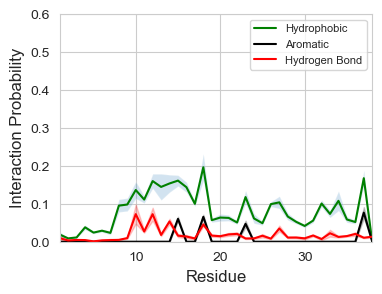

<Figure size 400x300 with 0 Axes>

In [ ]:
plt.plot(range(1,residues + 1),
         hphob_by_res[:, 1], label='Hydrophobic', color='green')
plt.fill_between(range(1,residues+1),
                 hphob_by_res[:, 1]+hphob_by_res[:, 2], hphob_by_res[:, 1]-hphob_by_res[:, 2], alpha=0.2)

plt.plot(aro_by_res[:, 0], aro_by_res[:, 1], color='black', label='Aromatic')
plt.fill_between(aro_by_res[:, 0], aro_by_res[:, 1]+aro_by_res[:, 2],
                 aro_by_res[:, 1]-aro_by_res[:, 2], color='black', alpha=0.2)

plt.plot(Hbond_by_res[:, 0], Hbond_by_res[:, 1],
         label='Hydrogen Bond', color='red')
plt.fill_between(Hbond_by_res[:, 0], Hbond_by_res[:, 1]+Hbond_by_res[:, 2],
                 Hbond_by_res[:, 1]-Hbond_by_res[:, 2], color='red', alpha=0.2)

plt.xlabel('Residue')
plt.ylabel('Interaction Probability')
plt.xlim(residue_offset, residue_offset+residues-1)
plt.legend()
plt.tight_layout()
# plt.savefig(outdir+'LigandInteractions.allframes.pdf')
plt.ylim(0, 0.6)
plt.show()
plt.clf()

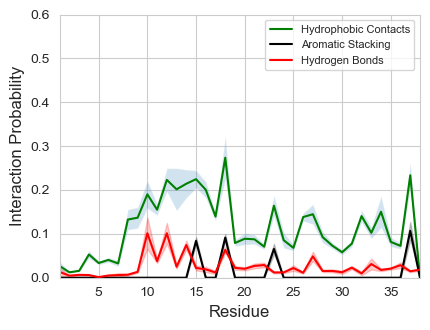

<Figure size 400x300 with 0 Axes>

In [ ]:
plt.figure(figsize=(4.4,3.4))
plt.plot(range(1,residues+1),
         hphob_by_res[:, 1]/boundfrac, label='Hydrophobic Contacts', color='green')
plt.fill_between(range(1,residues+1), hphob_by_res[:, 1]/boundfrac+hphob_by_res[:, 2] /
                 boundfrac, hphob_by_res[:, 1]/boundfrac-hphob_by_res[:, 2]/boundfrac, alpha=0.2)

plt.plot(aro_by_res[:, 0], aro_by_res[:, 1]/boundfrac,
         color='black', label='Aromatic Stacking')
plt.fill_between(aro_by_res[:, 0], aro_by_res[:, 1]/boundfrac+aro_by_res[:, 2]/boundfrac,
                 aro_by_res[:, 1]/boundfrac-aro_by_res[:, 2]/boundfrac, color='black', alpha=0.2)

plt.plot(Hbond_by_res[:, 0], Hbond_by_res[:, 1] /
         boundfrac, label='Hydrogen Bonds', color='red')
plt.fill_between(Hbond_by_res[:, 0], Hbond_by_res[:, 1]/boundfrac+Hbond_by_res[:, 2]/boundfrac,
                 Hbond_by_res[:, 1]/boundfrac-Hbond_by_res[:, 2]/boundfrac, color='red', alpha=0.2)

plt.xlabel('Residue')
plt.ylabel('Interaction Probability')
plt.xlim(residue_offset, residue_offset+residues-1)
plt.ylim(0, 0.6)
#plt.title("Bound Ensemble",size=18)
plt.tight_layout()
plt.legend()
# plt.savefig(outdir+'LigandInteractions.boundfraction.pdf')
plt.show()
plt.clf()


In [ ]:
# Make dual contact map
final_map = make_dual_map(trj, prot_len=38, ligand_idx=38, cutoff=0.5)
np.savetxt('%s/dual_contact_map.dat' % outdir, final_map, fmt='%1.3f')

In [ ]:
sequence = []
residue_offset = 1
count = 0

for residue in trj.topology.residues:
    if count % 2 == 0: 
        index = residue.index
        renum = int(index) + residue_offset
        sequence.append(residue.name + "%s" % (renum))
    else: 
        sequence.append("")
    count +=1
print(sequence)

['LYS1', '', 'ASN3', '', 'ALA5', '', 'CYS7', '', 'THR9', '', 'ARG11', '', 'ALA13', '', 'PHE15', '', 'VAL17', '', 'SER19', '', 'ASN21', '', 'PHE23', '', 'ALA25', '', 'LEU27', '', 'SER29', '', 'ASN31', '', 'GLY33', '', 'ASN35', '', 'TYR37', '', 'LIG39']


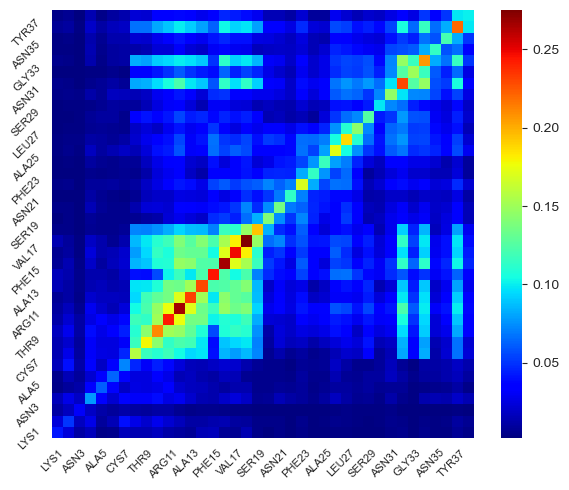

In [ ]:
# Make dual contact map
final_map = np.loadtxt('%s/dual_contact_map.dat' % outdir)

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
im = sns.heatmap(final_map, cmap = 'jet', ax = ax)
ax.grid(which='both', alpha=0.5)
ax.tick_params(width = 3)
plt.xticks(range(38), sequence[:-1], rotation=45, size=8)
plt.yticks(range(0, 38), sequence[:-1], rotation=45, size=8)
cbar = im.collections[0].colorbar
# cbar.set_ticklabels(0, 0.45)
# cbar.mappable.set_clim(0,0.4)
ax.invert_yaxis()
plt.tight_layout()

# plt.savefig('%s/dual_contact_map.png' % outdir)
# plt.savefig('%s/dual_contact_map.pdf' % outdir)

# Circuit Topology Analysis 


In [ ]:
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from cycler import cycler
from matplotlib import colormaps 
import pickle

# Define the number of shades in the gradient
num_grays = 8
# Create a list of distinct gray values
grays = np.linspace(0.0, 0.8, num_grays)
# Create a ListedColormap with distinct gray values
custom_pastel_gray_cmap = ListedColormap([(gray, gray, gray) for gray in grays])

# create color map and cycler for clusters 
max_num_clusters = 6
viridis = colormaps['viridis'].resampled(max_num_clusters)
default_cycler = cycler(color=viridis(range(max_num_clusters)))
viridis_hex = ['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

######## Clusters ########
t_dir = outdir + "/outdir_vis_basins/"
if not os.path.exists(t_dir):
    os.makedirs(t_dir)

psystem = "wt_hiapp_yxi1"
with open(outdir+"/_concat_all_6c_kmeans_cluster_indices.pkl", "rb") as f: 
    c_dict = pickle.load(f)

## Circuit Topology Figures

In [ ]:
from scipy.sparse import load_npz
sparse_circuit_matrix = load_npz("../circuit_topology_matrices/" + psystem+"_ctop_model.npz")
viridis = colormaps['viridis'].resampled(7)

In [ ]:
s_counts = count_vals_per_row(sparse_circuit_matrix, 1) + count_vals_per_row(sparse_circuit_matrix, 2)
p_counts = count_vals_per_row(sparse_circuit_matrix, 3) + count_vals_per_row(sparse_circuit_matrix, 4) + count_vals_per_row(sparse_circuit_matrix, 5) + count_vals_per_row(sparse_circuit_matrix, 6)
x_counts = count_vals_per_row(sparse_circuit_matrix, 7)

In [ ]:
pos_contact_all_bf = create_pos_contact(trj, cutoff=0.01) # indices of all positive contacts 

this is the population of the bound frames for the given cutoff: 0.7165573770491803


In [ ]:
bound_sparse_matrix = sparse_circuit_matrix[pos_contact_all_bf]
s_bound_counts = count_vals_per_row(bound_sparse_matrix, 1) + count_vals_per_row(bound_sparse_matrix, 2)
p_bound_counts = count_vals_per_row(bound_sparse_matrix, 3) + count_vals_per_row(bound_sparse_matrix, 4) + count_vals_per_row(bound_sparse_matrix, 5) + count_vals_per_row(bound_sparse_matrix, 6)
x_bound_counts = count_vals_per_row(bound_sparse_matrix, 7)

In [ ]:
print("p_bound_counts", np.average(p_bound_counts))
print("s_bound_counts", np.average(s_bound_counts)) 
print("x_bound_counts", np.average(x_bound_counts))

p_bound_counts 0.05955855711734771
s_bound_counts 0.08274297571266831
x_bound_counts 0.042512073898845565


In [ ]:
topology_assn = np.column_stack((s_counts, p_counts))
topology_assn = np.column_stack((topology_assn, x_counts))
np.save(outdir + "topology_per_frame.npy", topology_assn)

topology_assn = np.column_stack((s_bound_counts, p_bound_counts))
topology_assn = np.column_stack((topology_assn, x_bound_counts))
np.save(outdir + "topology_bound_per_frame.npy", topology_assn)

In [ ]:
# unbound? 
unbound_sparse_matrix = sparse_circuit_matrix[np.setdiff1d(np.arange(0,sparse_circuit_matrix.shape[0]), pos_contact_all_bf)]
s_unbound_counts = count_vals_per_row(unbound_sparse_matrix, 1) + count_vals_per_row(unbound_sparse_matrix, 2)
p_unbound_counts = count_vals_per_row(unbound_sparse_matrix, 3) + count_vals_per_row(unbound_sparse_matrix, 4) + count_vals_per_row(unbound_sparse_matrix, 5) + count_vals_per_row(unbound_sparse_matrix, 6)
x_unbound_counts = count_vals_per_row(unbound_sparse_matrix, 7)

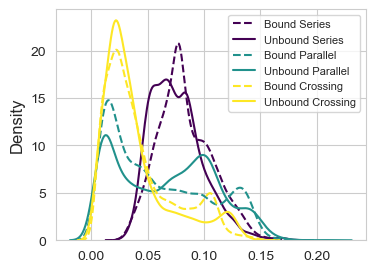

<Figure size 400x300 with 0 Axes>

In [ ]:
# sns.kdeplot(s_counts, label="Series", c=viridis.colors[0])
sns.kdeplot(s_bound_counts, label="Bound Series", linestyle="--", c=viridis.colors[0])
sns.kdeplot(s_unbound_counts, label="Unbound Series", linestyle="-", c=viridis.colors[0])

# sns.kdeplot(p_counts, label="Parallel", c=viridis.colors[3])
sns.kdeplot(p_bound_counts, label="Bound Parallel", linestyle="--", c=viridis.colors[3])
sns.kdeplot(p_unbound_counts, label="Unbound Parallel", linestyle="-", c=viridis.colors[3])

# sns.kdeplot(x_counts, label="Crossing", c= viridis.colors[6])
sns.kdeplot(x_bound_counts, label="Bound Crossing", linestyle="--", c= viridis.colors[6])
sns.kdeplot(x_unbound_counts, label="Unbound Crossing", linestyle="-", c= viridis.colors[6])

plt.legend()
plt.show()
plt.clf()

cluster 	parallel	series	crossing
cluster 1	0.02	0.08	0.02
cluster 2	0.09	0.07	0.04
cluster 3	0.06	0.09	0.04
cluster 4	0.13	0.08	0.10
cluster 5	0.13	0.08	0.08
cluster 6	nan	nan	nan


/Users/f006j60/miniconda3/envs/interface_app/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/f006j60/miniconda3/envs/interface_app/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


total  	0.06	0.08	0.04


/var/folders/dm/wwztwm7s07d_s0pbc4_c0y_c0000gn/T/ipykernel_4822/1177118006.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


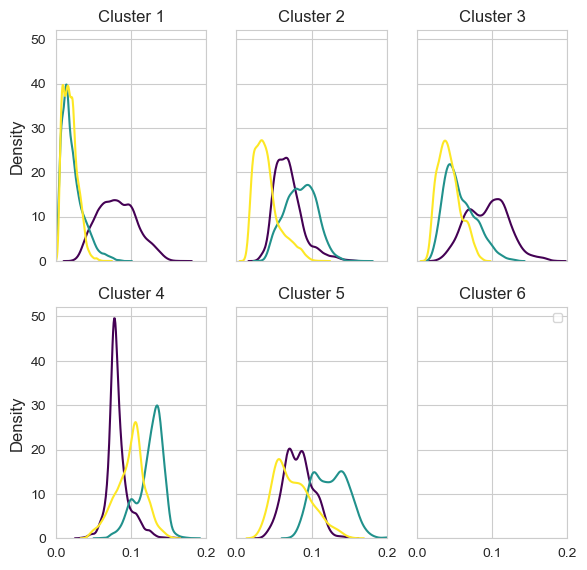

<Figure size 400x300 with 0 Axes>

In [ ]:
# plot for each cluster 
table_by_cluster = np.zeros((len(c_dict)+1, 3))

fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True, figsize=(6.6,6.6))
print(f"cluster \tparallel\tseries\tcrossing")
for n,ax in enumerate(axs.flatten()): 
    idxs = c_dict[n]
    csr_matrx = sparse_circuit_matrix[idxs]
    
    # based on matrix assignments 
    s_counts = count_vals_per_row(csr_matrx, 1) + count_vals_per_row(csr_matrx, 2)
    p_counts = count_vals_per_row(csr_matrx, 3) + count_vals_per_row(csr_matrx, 4) \
        + count_vals_per_row(csr_matrx, 5) + count_vals_per_row(csr_matrx, 6)
    x_counts = count_vals_per_row(csr_matrx, 7)

    sns.kdeplot(s_counts, label="Series", c=viridis.colors[0], ax=ax)
    sns.kdeplot(p_counts, label="Parallel", c=viridis.colors[3], ax=ax)
    sns.kdeplot(x_counts, label="Crossing", c= viridis.colors[6], ax=ax)

    ax.set_title("Cluster " + str(n+1))

    # print line in cluster 
    # print(f"cluster {n+1}\t{np.median(s_counts):.2f}\t{np.median(p_counts):.2f}\t{np.median(x_counts):.2f}")
    print(f"cluster {n+1}\t{np.average(p_counts):.2f}\t{np.average(s_counts):.2f}\t{np.average(x_counts):.2f}")
    table_by_cluster[n,0] = np.average(p_counts)
    table_by_cluster[n,1] = np.average(s_counts)
    table_by_cluster[n,2] = np.average(x_counts)    

# total 
s_counts = count_vals_per_row(sparse_circuit_matrix, 1) + count_vals_per_row(sparse_circuit_matrix, 2)
p_counts = count_vals_per_row(sparse_circuit_matrix, 3) + count_vals_per_row(sparse_circuit_matrix, 4) + count_vals_per_row(sparse_circuit_matrix, 5) + count_vals_per_row(sparse_circuit_matrix, 6)
x_counts = count_vals_per_row(sparse_circuit_matrix, 7)

table_by_cluster[-1,0] = np.average(p_counts)
table_by_cluster[-1,1] = np.average(s_counts)
table_by_cluster[-1,2] = np.average(x_counts)

print(f"total  \t{np.average(p_counts):.2f}\t{np.average(s_counts):.2f}\t{np.average(x_counts):.2f}")
plt.legend()
plt.xlim(0.0,0.2)
plt.show()
plt.clf()

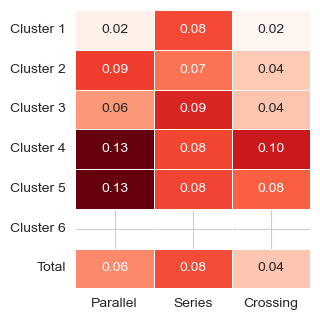

<Figure size 400x300 with 0 Axes>

In [ ]:
plt.figure(figsize=(3.3, 3.3))
sns.heatmap(table_by_cluster, cmap="Reds", cbar=False, annot=True, fmt=".2f", linewidths=.5)
plt.xticks([0.5,1.5,2.5], ['Parallel', 'Series', 'Crossing'], fontsize=10)
plt.yticks(np.arange(len(c_dict)+1) +0.5, ['Cluster ' + str(i+1) for i in range(len(c_dict))] + ['Total'], fontsize=10, rotation=0)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
# save memory 
del sparse_circuit_matrix

## Clustering Analysis on CT space 

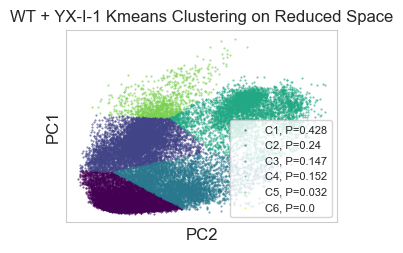

<Figure size 400x300 with 0 Axes>

In [ ]:
metric = np.load(outdir + "/concat_all_incpca.npy")

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(3.5,2.5))

lbl = "WT + YX-I-1"
# plot by the cluster 
for i in range(len(c_dict.keys())):
    frame_ind = c_dict[i]
    x = metric[frame_ind][:,0]
    y = metric[frame_ind][:,1]
    ax.scatter(x,y, label='C%s' %
        str(i+1) + ", P=" + str(np.round(len(frame_ind)/int(metric.shape[0]), 3)), marker = ".", alpha=0.7, s=1, color=viridis_hex[i])
    ax.set_title('%s Kmeans Clustering on Reduced Space'% lbl)
plt.ylabel("PC1")
plt.xlabel("PC2")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()
plt.clf()

/Users/f006j60/miniconda3/envs/interface_app/lib/python3.11/site-packages/numpy/lib/_histograms_impl.py:1085: RuntimeWarning: invalid value encountered in divide
  hist /= s


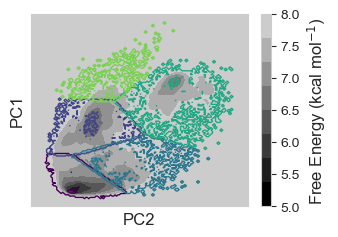

<Figure size 400x300 with 0 Axes>

In [ ]:

PCs = np.load(outdir+"/concat_all_incpca.npy")
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(3.5,2.5))

# Create free energy surface with an inverse boltzmann 
counts,xbins,ybins=np.histogram2d(PCs[:,1],PCs[:,0],bins=50,density=True, range=[[np.min(PCs[:,1])-50, np.max(PCs[:,1])+50], [np.min(PCs[:,0])-50, np.max(PCs[:,0])+50]]) # LogNorm()
a = np.log(np.flipud(counts)+.000001)
T = 300
a = -(0.001987*T)*a

# Create a colored density map using ax.imshow
im = ax.imshow(a, interpolation='gaussian', extent=[ybins[0], ybins[-1], 
                                                    xbins[0], xbins[-1]], cmap=custom_pastel_gray_cmap, aspect='auto')
im.set_clim(5.0, 8.0)  # Adjust these values based on your data
# Add a colorbar to the plot
cbar = plt.colorbar(im, ax=ax, label='Free Energy (kcal mol$^{-1}$)')

# plot the outlines with a thicker line 
for i in range(len(c_dict.keys())):
        frame_ind = c_dict[i]
        x = PCs[frame_ind][:,0]
        y = PCs[frame_ind][:,1]
        
        # calculate the 2D density of the data given
        counts,xbins,ybins=np.histogram2d(x,y,bins=150,density=True, range=[[np.min(PCs[:,0])-50, np.max(PCs[:,0])+50], [np.min(PCs[:,1])-50, np.max(PCs[:,1])+50]]) # LogNorm()
        # make the contour plot
        ax.contour(counts.transpose(),extent=[xbins.min(),xbins.max(), ybins.min(),ybins.max()],linewidths=1.0,colors=viridis_hex[i],
            linestyles='solid', levels=1)


# Add a colorbar to the plot
# cbar = plt.colorbar(contour_plot, ax=ax, label='Density')
# plt.plot(PCs[:,0], PCs[:,1])
plt.ylim(ybins.min(), ybins.max())
plt.xlim(xbins.min(), xbins.max())
plt.ylabel("PC1")
plt.xlabel("PC2")
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.savefig(outdir + "iapp_wt_yxi1_FES_on_PCs.pdf", dpi=400, bbox_inches="tight")

plt.show()
plt.clf()

In [ ]:
# # compute SASA
# solv = md.shrake_rupley(trj, mode="residue")
# np.save(outdir+"/sasa.npy", solv)

25.0
29.669918 60.224995 0.8651319249032136 2.815920061139608 0 30
29.669918 60.224995 0.8651319249032136 2.815920061139608 0 30
29.669918 60.224995 0.8651319249032136 2.815920061139608 0 30


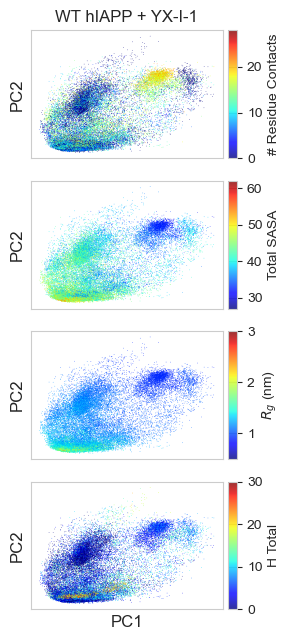

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable 
PCs = np.load(outdir+"/concat_all_incpca.npy")
bds = [[0,28], [27,62], [0.5,3.0], [0,30]]

# load in quantities 
Rg = np.load(outdir+"/Rg_total" + ".npy")
Sa = np.load(outdir+"/Sa_total" + ".npy")
H_tot = np.load(outdir+"/H_total" + ".npy")
solv_sum = np.sum(np.load(outdir+"/sasa.npy"), axis=1)

# labels 
cbar_lbl = ["# Residue Contacts", "Total SASA", "$R_g$ (nm)", "H Total"]

# create one plot to show all 4 quantities 
fig, axes = plt.subplots(4,1, figsize=(3,6.5), sharey=True, sharex=True)
ax = axes.flatten()

# # plot the outlines with a thicker line 
# create pos_contact 
pos_contact, res_num_contact = create_pos_contact_avg_contact(trj, cutoff=0.5)
scatt = ax[0].scatter(PCs[:,0],PCs[:,1], marker = ".", alpha=0.8, c=res_num_contact, cmap="jet", s=1, edgecolors="None", vmin=bds[0][0], vmax=bds[0][1])
print(res_num_contact.max())
ax[0].set_ylabel("PC2")
# Add color bar
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(scatt, cax=cax)
cbar.set_label(cbar_lbl[0],fontsize=10)  # Set your desired label
ax[0].grid(False)

# project onto the surface 
for k, var in enumerate([solv_sum, Rg, H_tot]): 
    print(solv_sum.min(), solv_sum.max(), Rg.min(), Rg.max(), H_tot.min(), H_tot.max())
    scatt = ax[k+1].scatter(PCs[:,0],PCs[:,1], marker = ".", alpha=0.8, c=var, cmap="jet", s=1, edgecolors="None", vmin=bds[k+1][0], vmax=bds[k+1][1])
    # ax.legend(loc='best', ncol=1)
    
    ax[k+1].set_ylabel("PC2")
    
    ax[k+1].grid(False)
    ax[k+1].set_xticks([])
    ax[k+1].set_yticks([])
    # Add color bar
    divider = make_axes_locatable(ax[k+1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(scatt, cax=cax)
    cbar.set_label(cbar_lbl[k+1],fontsize=10)  # Set your desired label
axes[0].set_title("WT hIAPP + YX-I-1")
axes[-1].set_xlabel("PC1")
plt.tight_layout()
# plt.savefig( outdir + "res_num_in_contact_project_SASA_Rg_H_total.png", dpi=400, bbox_inches="tight")
plt.show()

In [ ]:
pos_contact = create_pos_contact(trj, cutoff=0.4)
pos_contact_all_bf = create_pos_contact(trj, cutoff=0.01)

this is the population of the bound frames for the given cutoff: 0.1278032786885246
this is the population of the bound frames for the given cutoff: 0.7165573770491803


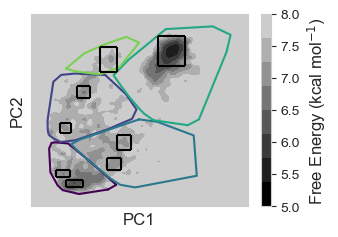

In [ ]:
from scipy.spatial import ConvexHull

# load in the correct c_dict and the correct PCs
# get pcs 
PCs_old = np.load(outdir+"/concat_all_incpca.npy")

# only care about the PCs in contact
frame_range = PCs_old.shape[0]
PCs = PCs_old[np.intersect1d(pos_contact,np.arange(0,frame_range))]

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(3.5,2.5))
counts,xbins,ybins=np.histogram2d(PCs[:,1],PCs[:,0],bins=50,density=True, range=[[np.min(PCs[:,1])-50, np.max(PCs[:,1])+50], [np.min(PCs[:,0])-50, np.max(PCs[:,0])+50]]) # LogNorm()
a = np.log(np.flipud(counts)+.000001)
T = 300
a = -(0.001987*T)*a

# Create a colored density map using ax.imshow
im = ax.imshow(a, interpolation='gaussian', extent=[ybins[0], ybins[-1], 
                                                    xbins[0], xbins[-1]], cmap=custom_pastel_gray_cmap, aspect='auto') 

im.set_clim(5.0, 8.0)  # Adjust these values based on your data
# Add a colorbar to the plot
cbar = plt.colorbar(im, ax=ax, label='Free Energy (kcal mol$^{-1}$)')

# plot the outlines with a thicker line 

for i in range(len(c_dict.keys())):
        frame_ind = c_dict[i]
        in_contact = np.intersect1d(pos_contact,frame_ind)
        if len(in_contact) < 3: 
                continue
        cluster_points = PCs_old[in_contact]
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        # Close the loop
        hull_points = np.concatenate([hull_points, hull_points[:1]])
        plt.plot(hull_points[:, 0], hull_points[:, 1], color=viridis_hex[i])  # outline

        # x = PCs_old[in_contact][:,0]
        # y = PCs_old[in_contact][:,1]
        # ax.scatter(x,y, s=1, marker=".", c=viridis_hex[i])

        # # calculate the 2D density of the data given
        # counts,xbins,ybins=np.histogram2d(x,y,bins=60,density=True, range=[[np.min(PCs[:,0])-50, np.max(PCs[:,0])+50], [np.min(PCs[:,1])-50, np.max(PCs[:,1])+50]]) # LogNorm()
        # # make the contour plot
        # ax.contour(counts.transpose(),extent=[xbins.min(),xbins.max(), ybins.min(),ybins.max()],linewidths=1.0,colors=viridis_hex[i],
        #     linestyles='solid', levels=1)

plt.xlim(ybins.min(), ybins.max())
plt.ylim(xbins.min(), xbins.max())
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.savefig(outdir + "iapp_wt_yxi1_FES_on_PCs_0.4_in_contact.pdf", dpi=400, bbox_inches="tight")
plt.savefig(outdir + "iapp_wt_yxi1_FES_on_PCs_0.4_in_contact.png", dpi=400, bbox_inches="tight")


# bound poses for 0.4

# cluster 1 
plt_box(-150, -100,-140,-110)
plt_box(-180, -140,-100,-70)

# cluster 2 
plt_box(-120,-80 , 220, 270) 
plt_box(-170,-135 , 80, 120) 

# cluster 3 
plt_box(0, 40,10,70)
plt_box(-30, 10,-70,-20)

# cluster 4
plt_box(120, 200, 350,470) # done 

# cluster 5 
plt_box(-50, 0, 325,425) # done

# cluster 6

plt.savefig(outdir + "iapp_wt_yxi1_FES_on_PCs_0.4_w_bounds_in_contact.png", dpi=300, bbox_inches="tight")

plt.show()

/Users/f006j60/miniconda3/envs/interface_app/lib/python3.11/site-packages/numpy/lib/_histograms_impl.py:1085: RuntimeWarning: invalid value encountered in divide
  hist /= s


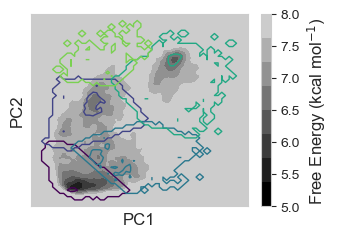

<Figure size 400x300 with 0 Axes>

In [ ]:
# get pcs 
PCs_old = np.load(outdir+"/concat_all_incpca.npy")

# only care about the PCs in contact
frame_range = PCs_old.shape[0]
PCs = PCs_old[np.intersect1d(pos_contact_all_bf,np.arange(0,frame_range))]

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(3.5,2.5))
counts,xbins,ybins=np.histogram2d(PCs[:,1],PCs[:,0],bins=50,density=True, range=[[np.min(PCs[:,1])-50, np.max(PCs[:,1])+50], [np.min(PCs[:,0])-50, np.max(PCs[:,0])+50]]) # LogNorm()
a = np.log(np.flipud(counts)+.000001)
T = 300
a = -(0.001987*T)*a

# Create a colored density map using ax.imshow
im = ax.imshow(a, interpolation='gaussian', extent=[ybins[0], ybins[-1], 
                                                    xbins[0], xbins[-1]], cmap=custom_pastel_gray_cmap, aspect='auto') 

im.set_clim(5.0, 8.0)  # Adjust these values based on your data
# Add a colorbar to the plot
cbar = plt.colorbar(im, ax=ax, label='Free Energy (kcal mol$^{-1}$)')

# plot the outlines with a thicker line 

for i in range(len(c_dict.keys())):
        frame_ind = c_dict[i]
        in_contact = np.intersect1d(pos_contact_all_bf,frame_ind)
        x = PCs_old[in_contact][:,0]
        y = PCs_old[in_contact][:,1]
        # ax.scatter(x,y, s=1, marker=".", c=viridis_hex[i])

        # calculate the 2D density of the data given
        counts,xbins,ybins=np.histogram2d(x,y,bins=60,density=True, range=[[np.min(PCs[:,0])-50, np.max(PCs[:,0])+50], [np.min(PCs[:,1])-50, np.max(PCs[:,1])+50]]) # LogNorm()
        # make the contour plot
        ax.contour(counts.transpose(),extent=[xbins.min(),xbins.max(), ybins.min(),ybins.max()],linewidths=1.0,colors=viridis_hex[i],
            linestyles='solid', levels=1)

plt.ylim(ybins.min(), ybins.max())
plt.xlim(xbins.min(), xbins.max())

plt.ylabel("PC2")
plt.xlabel("PC1")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.savefig(outdir + "iapp_wt_yxi1_FES_on_all_bf.pdf", dpi=300, bbox_inches="tight")
plt.show()
plt.clf()

#### Smaller cooperative bound mode Analysis 

Save the corresponding trajectories, and run analysis on each of the bins. 

In [ ]:
bounds = [ # cluster 1 
[[-150, -100,-140,-110], [-180, -140,-100,-70]],

# cluster 2 
[[-120,-80 , 220, 270], [-170,-135 , 80, 120]],

# cluster 3 
[[0, 40,10,70], [-30, 10,-70,-20]],

# cluster 4
[[120, 200, 350,470]],

# cluster 5 
[[-50, 0, 325,425]],

[[]]
]
# save the bound ensemble for each cluster and the total 
psystem = "iapp_wt_yxi1"

# the population that is reported here is that over the total amount of bound frames. 
populations = []

# loop through the clusters
for c in range(len(bounds)):
    # get all the frames 
    frame_ind = c_dict[c]
    in_contact = np.intersect1d(pos_contact,frame_ind)

    if len(in_contact) < 1: 
        continue

    # in contact and cluster 
    c_x = PCs_old[:,0]
    c_y = PCs_old[:,1]
    
    # loop through the number of bins in each cluster
    for n, bound in enumerate(bounds[c]): 
        if len(bound) < 1: 
            continue 
        # unpack bound 
        xmin, xmax, ymin, ymax = bound

        # get the pos contact within the bounds 
        x_bound = np.intersect1d(np.where(c_x > xmin)[0], np.where(c_x < xmax)[0])
        y_bound = np.intersect1d(np.where(c_y > ymin)[0], np.where(c_y < ymax)[0])
        bf_in_bounds = np.intersect1d(x_bound, y_bound)
        bf_in_bounds = np.intersect1d(in_contact, bf_in_bounds)

        if len(bf_in_bounds) < 1: 
            continue

        c_file = t_dir+ psystem + "_0.4_bf_centroid_c" + str(c+1) + "_b"+ str(n)+".gro"
        trj_file = t_dir + psystem+ "_0.4_bf_c" + str(c+1)+ "_b"+ str(n) + ".xtc"

        # get only bf and compute centroid
        temp = trj.slice(bf_in_bounds)
        temp2 = temp.atom_slice(trj.topology.select("residue 1 to 38"))
        c_i = get_centroid(temp2)

        # save the files 
        temp.slice(c_i).save_gro(c_file)
        temp.save_xtc(trj_file)

        populations.append(((len(bf_in_bounds)/ len(pos_contact))*100, (len(bf_in_bounds)/trj.n_frames) * 100))
print("% over total bound frames, % over total frames")
for pop in populations: 
    print(pop)
    print("\n")

% over total bound frames, % over total frames
(4.386865059004618, 0.560655737704918)


(0.8978963571062083, 0.11475409836065574)


(1.2057465366854798, 0.1540983606557377)


(0.48742945100051305, 0.06229508196721311)


(0.9492047203694202, 0.12131147540983607)


(1.2570548999486917, 0.16065573770491803)


(36.121087737301174, 4.61639344262295)


(1.154438173422268, 0.14754098360655737)




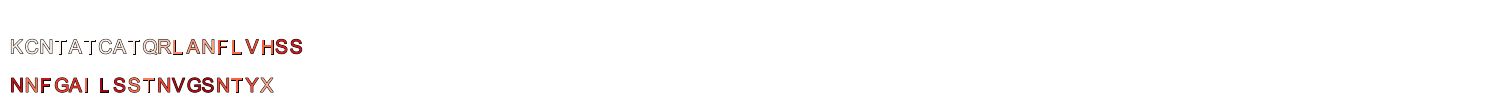

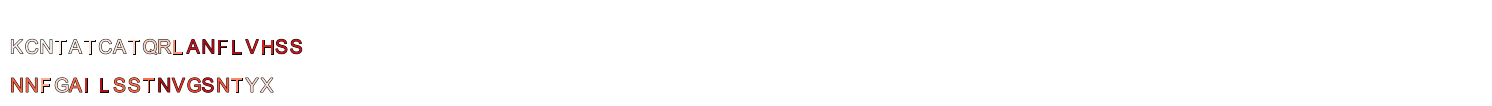

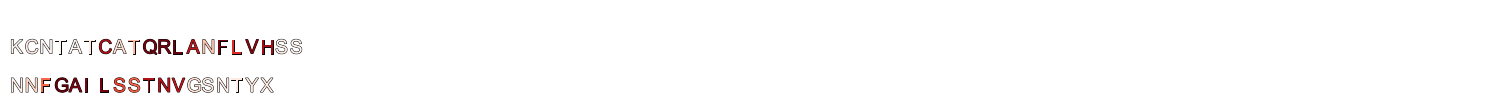

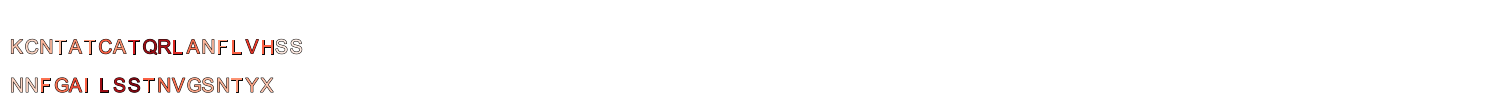

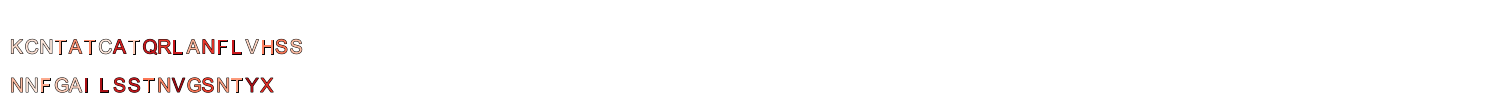

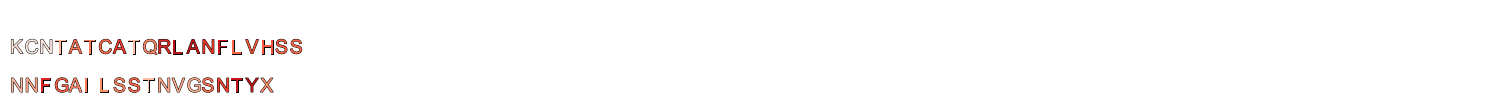

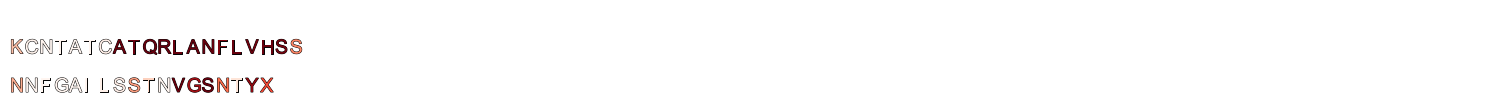

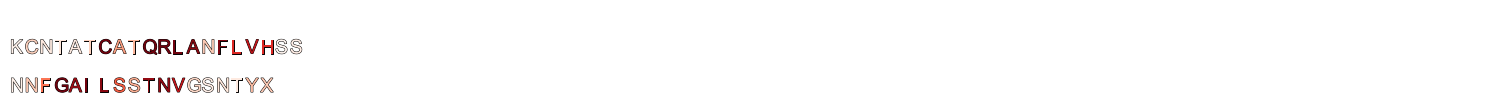

In [ ]:
wt_seq_str_ol = "KCNTATCATQRLANFLVHSSNNFGAILSSTNVGSNTYX"
for c in range(len(bounds)):
    for n, bound in enumerate(bounds[c]): 
        if len(bound) < 1: 
            continue
        
        c_file =  t_dir+ psystem + "_0.4_bf_centroid_c" + str(c+1) + "_b"+ str(n)+".gro"
        trj_file = t_dir + psystem+ "_0.4_bf_c" + str(c+1)+ "_b"+ str(n) + ".xtc"
        trj_c = md.load(trj_file, top=c_file)
        avg_contact = contact_arr_avg(trj_c)
        
        trj_c = md.load(c_file)
        # save pdb so better visualize with chimera with cystine bond 
        trj_c.save_pdb(t_dir + psystem + "_0.4_bf_centroid_c" + str(c+1) + "_b"+ str(n)+".pdb")
        make_chimera_prot_contact_file(avg_contact, t_dir, psystem, c=str(c+1)+ "_b"+ str(n))
        add_color_to_string(wt_seq_str_ol, avg_contact, cmap_name="Reds", vmin=0, vmax=1.0, fname= t_dir+ psystem +"_bf_c" + str(c+1)+ "_b"+ str(n) +"seq_colored_2lines.pdf")

        del trj_c

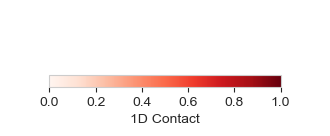

In [ ]:
def create_colorbar(vmin, vmax, cmap_name='viridis', fname=None):
    fig, ax = plt.subplots(figsize=(4,1))
    ax.axis('off')

    norm = Normalize(vmin=vmin, vmax=vmax)
    sm = ScalarMappable(norm=norm, cmap=cmap_name)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation="horizontal")
    cbar.set_label('1D Contact', fontsize=10)
    # plt.tight_layout()
    plt.savefig(fname, dpi=400,  bbox_inches="tight")
    plt.show()

create_colorbar(vmin=0, vmax=1.0, cmap_name='Reds', fname=outdir + psystem + "_seq_colorbar.pdf")

### Small Molecule and Protein interactions by Cluster Analysis

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# compuate bound fraction of each cluster
n_cluster=6
bf_err_pop_by_cluster = np.zeros(shape=(3, n_cluster+1)) 
# get the total first 
boundfrac, boundfrac_be = get_blockerror_pyblock(contact_binary)
bf_err_pop_by_cluster[0,-1] = boundfrac
bf_err_pop_by_cluster[1,-1] = boundfrac_be
bf_err_pop_by_cluster[2,-1] = 1.0 
for i in range(0, n_cluster):
    frame_ind = c_dict[i]
    if len(frame_ind) < 1: 
        continue

    boundfrac, boundfrac_be = get_blockerror_pyblock_nanskip(contact_binary[frame_ind])
    bf_err_pop_by_cluster[0,i] = boundfrac
    bf_err_pop_by_cluster[1,i] = boundfrac_be
    print("Bound Fraction Cluster "+str(i+1)+":", np.round(boundfrac*100, 2), "+_", np.round(boundfrac_be*100, 2))
    
    population = np.round(len(c_dict[i])/trj.n_frames*100, 2)
    bf_err_pop_by_cluster[2,i] = population
    print("Population Cluster "+str(i+1)+": ", population)

Bound Fraction Cluster 1: 75.22 +_ 2.41
Population Cluster 1:  42.8
Bound Fraction Cluster 2: 58.34 +_ 5.59
Population Cluster 2:  23.99
Bound Fraction Cluster 3: 77.81 +_ 3.29
Population Cluster 3:  14.73
Bound Fraction Cluster 4: 80.2 +_ 10.01
Population Cluster 4:  15.23
Bound Fraction Cluster 5: 55.1 +_ 8.35
Population Cluster 5:  3.25


In [ ]:
bound_indices = np.array(contact_index)
# save the total bound ensemble
temptrj = trj.slice(contact_index)
temptrj.save_xtc(t_dir + psystem + "_all_bound.xtc")
temptrj.slice([0]).save_gro(t_dir + psystem + "_all_bound.gro")

# save bound frames by cluster 
for i in range(0, n_cluster):
    frame_ind = c_dict[i]

    if len(frame_ind) < 1:
        continue

    bound_cluster_indices = np.intersect1d(frame_ind, bound_indices)
    temptrj = trj.slice(bound_cluster_indices)
    temptrj.save_xtc(t_dir + psystem + "_cluster"+str(i+1)+"_bound.xtc")
    
    # find the centroid
    protein = temptrj.atom_slice(temptrj.top.select("protein"))
    centroid = np.mean([protein.xyz[i].mean(axis=0) for i in range(protein.n_frames)], axis=0)
    distances = np.linalg.norm([protein.xyz[i].mean(axis=0) - centroid for i in range(protein.n_frames)], axis=1)
    closest_frame = np.argmin(distances)

    
    temptrj.slice([closest_frame]).save_gro(t_dir + psystem + "_cluster"+str(i+1)+"_bound.gro")

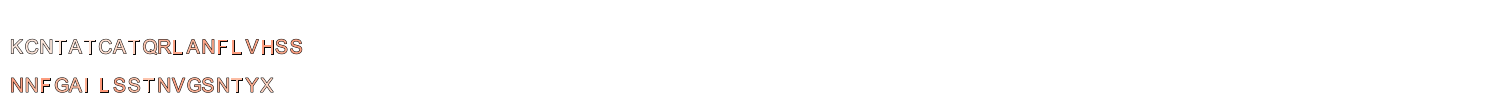

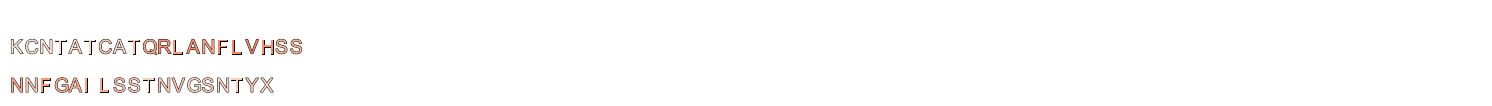

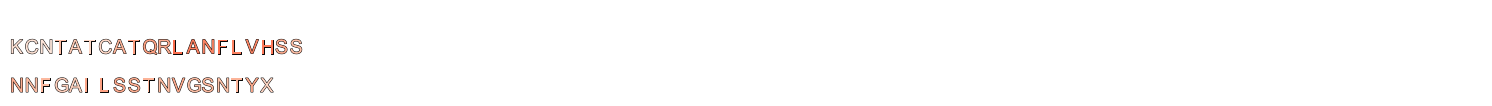

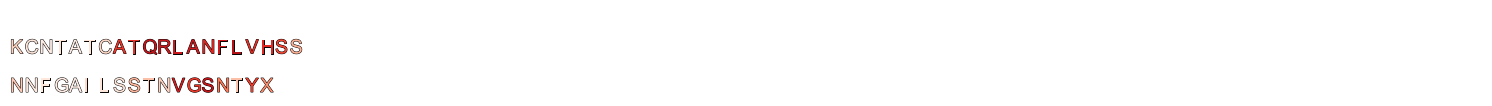

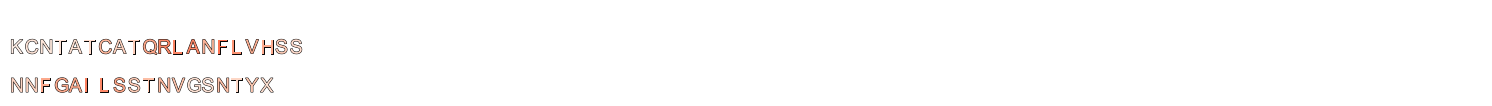

In [ ]:
wt_seq_str_ol = "KCNTATCATQRLANFLVHSSNNFGAILSSTNVGSNTYX"
for c in range(n_cluster):      
    if c > n_cluster -2:
        continue # skip the last cluster, which is empty 
    c_file = t_dir+  psystem + "_cluster"+str(c+1)+"_bound.gro"
    trj_file = t_dir + psystem+ "_cluster"+str(c+1)+"_bound.xtc"
    trj_c = md.load(trj_file, top=c_file)
    avg_contact = contact_arr_avg(trj_c)
    add_color_to_string(wt_seq_str_ol, avg_contact, cmap_name="Reds", vmin=0, vmax=1.0, fname= t_dir+ psystem +"_all_bf_c" + str(c+1) + "seq_colored_2lines.pdf")

    del trj_c

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Cluster 1, P=42.8'),
  Text(1, 0, 'Cluster 2, P=23.99'),
  Text(2, 0, 'Cluster 3, P=14.73'),
  Text(3, 0, 'Cluster 4, P=15.23'),
  Text(4, 0, 'Cluster 5, P=3.25'),
  Text(5, 0, 'Cluster 6, P=0.0'),
  Text(6, 0, 'Total')])

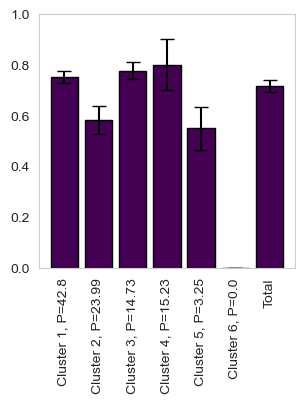

In [ ]:
bar_plot_labels = ["Cluster " + str(i+1) + ", P="+ str(bf_err_pop_by_cluster[2,i]) for i in range(0, n_cluster)]
bar_plot_labels.append("Total")
plt.figure(figsize=(3.3, 3.3))
plt.bar(bar_plot_labels, bf_err_pop_by_cluster[0,:], yerr=bf_err_pop_by_cluster[1,:], capsize=5, color=viridis_hex[0], edgecolor='black')
plt.grid(False)
plt.ylim(0,1.0)
plt.xticks(rotation=90)

/Users/f006j60/miniconda3/envs/interface_app/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/f006j60/miniconda3/envs/interface_app/lib/python3.11/site-packages/numpy/_core/_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


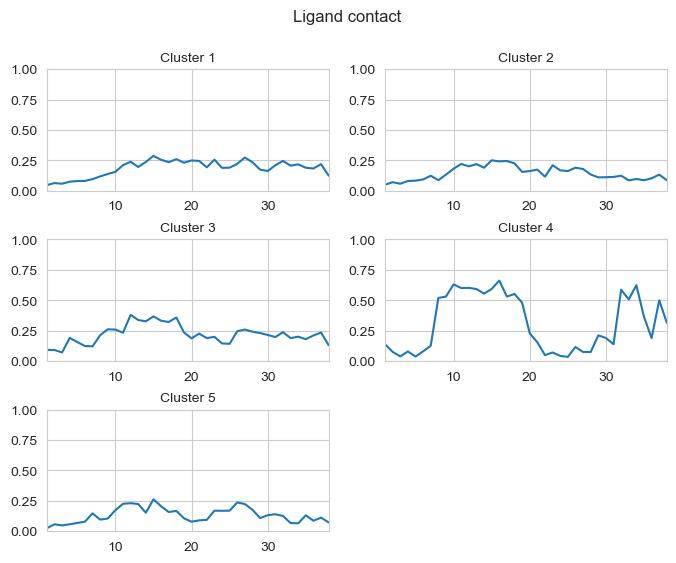

<Figure size 400x300 with 0 Axes>

In [ ]:
nrows = 3 
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(8, 6))
for i in range(0, n_cluster):
    frame_ind = c_dict[i]
    ax[int(i/2), i % 2].plot(hres_renum, np.average(contact_matrix[frame_ind], axis=0))
    ax[int(i/2), i % 2].set_title('Cluster %s' % str(i+1), size=10)
    ax[int(i/2), i % 2].tick_params(axis='both', labelsize=10)
    ax[int(i/2), i % 2].set_xlim(1, 38)
    ax[int(i/2), i % 2].set_ylim(0, 1.0)
fig.suptitle('Ligand contact')
ax.flatten()[-1].set_visible(False)  # Hide the empty subplot
plt.subplots_adjust(hspace=0.4)
plt.show()
plt.clf()

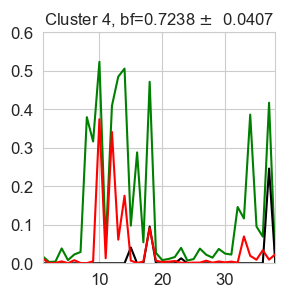

<Figure size 400x300 with 0 Axes>

In [ ]:
# 0.8020 $\pm$ 0.1269
fig, ax = plt.subplots(figsize=(3, 3))
# cluster 2 is the 
largest_bf = 3
frame_ind = c_dict[largest_bf]
ax.plot(hres_renum, np.average(Hphob_res_contacts[frame_ind], axis=0), color = 'green')
ax.plot(hres_renum, np.average(aromatic_stacking_contacts[frame_ind], axis=0), color = 'black')
ax.plot(hres_renum, np.average(HB_Total[frame_ind], axis=0), color = 'red')    
ax.set_title('Cluster %s' % str(largest_bf+1) + ", bf=0.7238 $\pm$  0.0407", size=12)
ax.tick_params(axis='both', labelsize=12)
ax.set_xlim(1, 38)
ax.set_ylim(0, 0.6)
# plt.savefig(outdir + "cluster"+str(largest_bf+1)+"_largest_bf_interaction_type.pdf", dpi=300)
plt.show()
plt.clf()

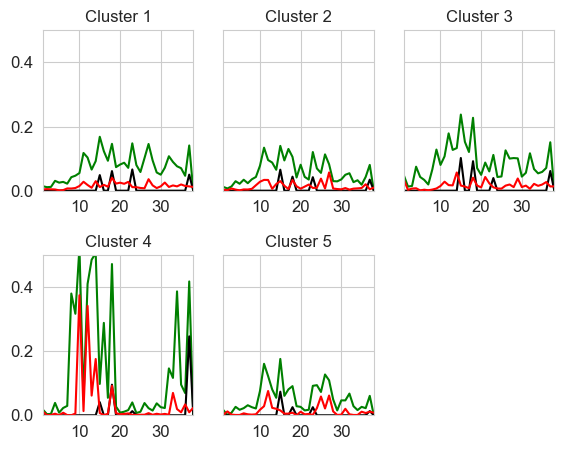

<Figure size 400x300 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(6.6, 5), sharey=True)

for i, ax in zip(range(0, n_cluster), axes.flatten()):
    frame_ind = c_dict[i]
    ax.plot(hres_renum, np.average(Hphob_res_contacts[frame_ind], axis=0), color = 'green')
    ax.plot(hres_renum, np.average(aromatic_stacking_contacts[frame_ind], axis=0), color = 'black')
    ax.plot(hres_renum, np.average(HB_Total[frame_ind], axis=0), color = 'red')    
    ax.set_title('Cluster %s' % str(i+1), size=12)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_xlim(1, 38)
    ax.set_ylim(0, 0.5)
plt.subplots_adjust(hspace=0.4)
axes.flatten()[-1].set_visible(False)  # Hide the empty subplot
# plt.savefig(outdir + "/interaction_type_by_cluster.pdf", dpi=300)
plt.show()
plt.clf()

In [ ]:
dual_contact_maps = []
prot_len=38 
for i in range(len(c_dict.keys())):
    if len(c_dict[i]) < 1: 
        continue    
    frame_ind = c_dict[i]
    temptrj = trj.slice(frame_ind)
    # dual contact map 
    dual_contact_map = make_dual_map(temptrj, prot_len)
    dual_contact_maps.append(dual_contact_map)

np.save(outdir+'dualcontactmap_by_basin.npy', np.array(dual_contact_maps))

C1, P=42.8
C2, P=24.0
C3, P=14.7
C4, P=15.2
C5, P=3.2


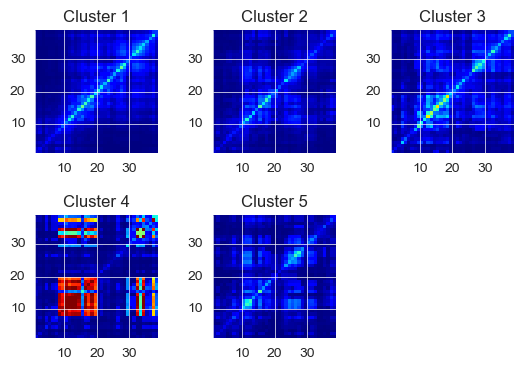

<Figure size 400x300 with 0 Axes>

In [ ]:
dual_contact_maps = np.load(outdir+'dualcontactmap_by_basin.npy')
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6.5,4))
n_clusters = 6
# Loop through the axes and images to populate the subplots
for i, (ax, d_map) in enumerate(zip(axs.flat, dual_contact_maps)):
    im = sns.heatmap(d_map, cmap='jet', ax=ax, vmin=0.0, vmax = 0.5, square=True, cbar=False)
    ax.grid(which='major', alpha=0.5)
    ax.set_title('Cluster %s' % str(i+1), size=12)
    ax.set_xticks([9, 19, 29], [ 10, 20, 30], rotation=0, size=10)
    ax.set_yticks([9,19,29], [ 10, 20, 30], rotation=0, size=10)
    ax.invert_yaxis()
    ax.set_ylim(0,38.0)
    ax.set_xlim(0,38.0)
    for x in [0, 9, 19, 29]:
        ax.axvline(x=x, color='white', linestyle='-', linewidth=0.5)
        ax.axhline(y=x, color='white', linestyle='-', linewidth=0.5)
    print("C" + str(i+1) + ", P=%0.1f" % np.round(len(c_dict[i])/trj.n_frames *100, 1))

plt.subplots_adjust( hspace=0.5)  # Increased vertical spacing
axs.flatten()[-1].set_visible(False)  # Hide the empty subplot
# plt.savefig(outdir+"/wt_iapp_yxi1_dual_contact_by_cluster.pdf", dpi=400)
# Show the plot
plt.show()
plt.clf()

C1, P=0.4
C2, P=0.2
C3, P=0.1
C4, P=0.1
C5, P=0.0


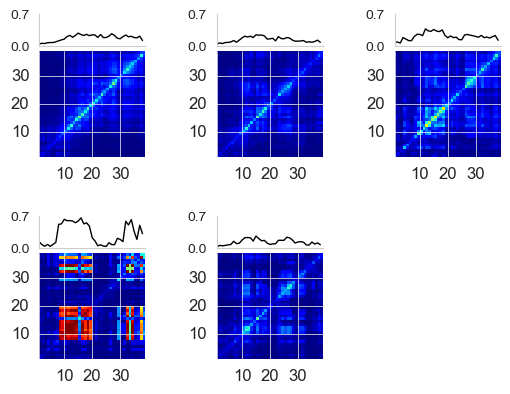

<Figure size 400x300 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6.5,4))
n_clusters = 6
# Loop through the axes and images to populate the subplots
for i, (ax, d_map) in enumerate(zip(axs.flat, dual_contact_maps)):
    im = sns.heatmap(d_map, cmap='jet', ax=ax, vmin=0.0, vmax = 0.5, square=True, cbar=False)
    ax.grid(which='major', alpha=0.5)
    ax.set_xticks([9, 19, 29], [ 10, 20, 30], rotation=0, size=12)
    ax.set_yticks([9,19,29], [ 10, 20, 30], rotation=0, size=12)
    ax.invert_yaxis()
    ax.set_ylim(0,38.0)
    ax.set_xlim(0,38.0)
    for x in [0, 9, 19, 29]:
        ax.axvline(x=x, color='white', linestyle='-', linewidth=0.5)
        ax.axhline(y=x, color='white', linestyle='-', linewidth=0.5)
    
    frame_ind = c_dict[i]
    prob_1d = np.average(contact_matrix[frame_ind], axis=0)
    # Create an inset axis above each heatmap
    ax_inset = inset_axes(ax, width="100%", height="50%", loc='upper center', bbox_to_anchor=(0, 0.8, 1, 0.6), bbox_transform=ax.transAxes)
    ax_inset.plot(prob_1d, color='black', lw=1)
    ax_inset.set_xlim(0, 38)
    ax_inset.set_xticks([])  # Remove x-ticks to avoid clutter
    ax_inset.set_yticks([0,0.7])  # Remove y-ticks
    ax_inset.grid(False)

    ax_inset.spines['top'].set_visible(False)
    ax_inset.spines['right'].set_visible(False)
    ax_inset.spines['left'].set_linewidth(0.8)
    ax_inset.spines['bottom'].set_linewidth(0.8)
    
    print("C" + str(i+1) + ", P=%0.1f" % np.round(len(c_dict[i])/trj.n_frames, 2))

plt.subplots_adjust( hspace=0.9)  # Increased vertical spacing
axs.flatten()[-1].set_visible(False)  # Hide the empty subplot
plt.savefig(outdir+"/wt_iapp_yxi1_dual_contact_by_cluster_1d_on_top.pdf", dpi=400)
# Show the plot
plt.show()
plt.clf()

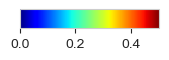

In [ ]:
from matplotlib import colors, colorbar
# Create a separate figure for the colorbar
fig_colorbar, ax_cbar = plt.subplots(figsize=(1.8, 0.25))  # Set width to 0.5 for a slim colorbar

# Generate a colorbar with the same colormap and value range
norm = colors.Normalize(vmin=0.0, vmax=0.5)
cbar = colorbar.ColorbarBase(ax_cbar, cmap='jet', norm=norm, orientation = "horizontal")

# Label the colorbar, if desired
# cbar.set_label('Contact Probability')

plt.savefig(outdir+"/wt_iapp_yxi1_contact_by_cluster_cbar.pdf", dpi=400, bbox_inches="tight")

plt.show()

/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:78: RuntimeWarning: invalid value encountered in divide
  M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]


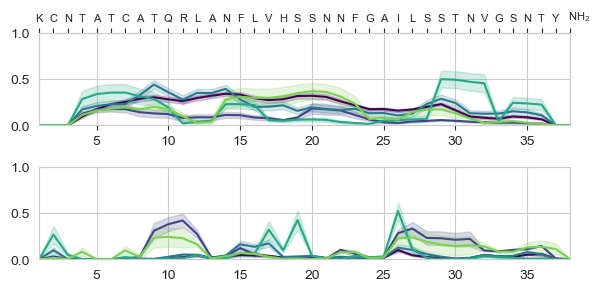

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(6,3.0))

for i in range(6): 
    if len(c_dict[i]) < 1:
        continue

    H1_H, H1_E = dssp_convert(dsspH1[c_dict[i]])

    axes[0].plot(residue_number_offsetres, H1_H[:, 0], label='Helix', color=viridis_hex[i])
    axes[0].fill_between(residue_number_offsetres, H1_H[:, 0]-H1_H[:, 1],
                     H1_H[:, 0]+H1_H[:, 1], alpha=0.2, color=viridis_hex[i])
    axes[0].set_xlim(1,38)
    axes[0].set_ylim(0,1.0)
    
    axes[1].plot(residue_number_offsetres, H1_E[:, 0], label='Sheet', color=viridis_hex[i])
    axes[1].fill_between(residue_number_offsetres, H1_E[:, 0]-H1_E[:, 1],
                     H1_E[:, 0]+H1_E[:, 1], alpha=0.2, color=viridis_hex[i])
    axes[1].set_xlim(1,38)
    axes[1].set_ylim(0,1.0)
ax2 = axes[0].twiny()
top_ticks = np.arange(0, 38, 1)
plt.grid(True)
plt.tight_layout()
ax2.set_xticks(top_ticks)
ax2.set_xticklabels([f'{i}' for i in sequence_ol_wt[0::1]], fontsize=8)
ax2.grid(False)
plt.savefig(outdir+'/Hprop.Eprop.wt.yxi1.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# check contact maps 
contact_maps = []
distance_maps = []
populations = []

# trjs = []
for i in range(len(c_dict.keys())):
    frame_ind = c_dict[i]
    temptrj = trj.slice(frame_ind)
    print(temptrj.n_frames)
    populations.append(np.round(temptrj.n_frames/trj.n_frames, 2))
    # trjs.append(trj)
    # contact map 
    final_map, final_distance = contact_map_avg(temptrj, prot_len, cutoff=0.8)
    contact_maps.append(final_map)
    distance_maps.append(final_distance)

np.save(outdir+'contactmap_by_basin.npy', np.array(contact_maps))

13054
7316
4493
4646
991
0


/Users/f006j60/miniconda3/envs/interface_app/lib/python3.11/site-packages/mdtraj/utils/unitcell.py:78: UserWarning: All your angles were less than 2*pi. Did you accidentally give me radians?
  warnings.warn("All your angles were less than 2*pi. Did you accidentally give me radians?")
/Users/f006j60/miniconda3/envs/interface_app/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/f006j60/miniconda3/envs/interface_app/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/f006j60/miniconda3/envs/interface_app/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


C1, P=42.8
C2, P=24.0
C3, P=14.7
C4, P=15.2
C5, P=3.2
C6, P=0.0


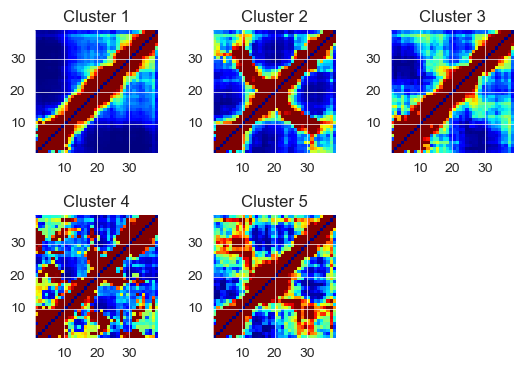

<Figure size 400x300 with 0 Axes>

In [ ]:
contact_maps = np.load(outdir+'contactmap_by_basin.npy')
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6.5,4))
n_clusters = 6
# Loop through the axes and images to populate the subplots
for i, (ax, d_map) in enumerate(zip(axs.flat, contact_maps)):
    im = sns.heatmap(d_map, cmap='jet', ax=ax, vmin=0.0, vmax = 0.5, square=True, cbar=False)
    ax.grid(which='major', alpha=0.5)
    ax.set_title('Cluster %s' % str(i+1), size=12)
    ax.set_xticks([9, 19, 29], [ 10, 20, 30], rotation=0, size=10)
    ax.set_yticks([9,19,29], [ 10, 20, 30], rotation=0, size=10)
    ax.invert_yaxis()
    ax.set_ylim(0,38.0)
    ax.set_xlim(0,38.0)
    for x in [0, 9, 19, 29]:
        ax.axvline(x=x, color='white', linestyle='-', linewidth=0.5)
        ax.axhline(y=x, color='white', linestyle='-', linewidth=0.5)
    print("C" + str(i+1) + ", P=%0.1f" % np.round(len(c_dict[i])/trj.n_frames *100, 1))

axs.flatten()[-1].set_visible(False)  # Hide the empty subplot
plt.subplots_adjust( hspace=0.5)  # Increased vertical spacing
# plt.savefig(outdir+"/wt_iapp_yxi1_dual_contact_by_cluster.pdf", dpi=400)
# Show the plot
plt.show()
plt.clf()

/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:78: RuntimeWarning: invalid value encountered in divide
  M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]
/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:78: RuntimeWarning: invalid value encountered in divide
  M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]


/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:78: RuntimeWarning: invalid value encountered in divide
  M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]
/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:78: RuntimeWarning: invalid value encountered in divide
  M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]


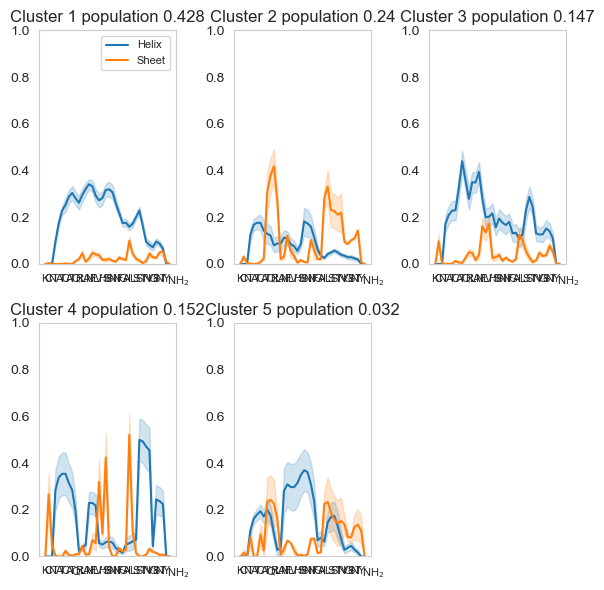

<Figure size 400x300 with 0 Axes>

In [ ]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))

# Loop through the axes and images to populate the subplots
for i, ax in enumerate(axes.flat):
    if i > n_cluster-2: 
        break
    H1_H, H1_E = dssp_convert(dsspH1[c_dict[i]])

    ax.plot(hres_renum, H1_H[:, 0], label='Helix', color="C0")
    ax.fill_between(hres_renum, H1_H[:, 0]-H1_H[:, 1],
                     H1_H[:, 0]+H1_H[:, 1], alpha=0.2, color="C0")
    
    ax.plot(hres_renum, H1_E[:, 0], label='Sheet', color="C1")
    ax.fill_between(hres_renum, H1_E[:, 0]-H1_E[:, 1],
                     H1_E[:, 0]+H1_E[:, 1], alpha=0.2, color="C1")
    
    ax.set_xticks(range(1,39), sequence_ol_wt, fontsize=8)
    ax.set_ylim(0,1.0)
    # Add a title to the subplot
    ax.set_title(f'Cluster {i+1} population ' + str(np.round((c_dict[i].size/trj.n_frames), decimals=3)))  # Customize title as needed
    ax.grid(False)

# add legend only to last cluster
axes[0,0].legend(loc = "upper right")
axes.flatten()[-1].set_visible(False)  # Hide the empty subplot
# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.3)  # Increased vertical spacing
plt.tight_layout()
plt.xlim(1, 38)
plt.show()
plt.clf()

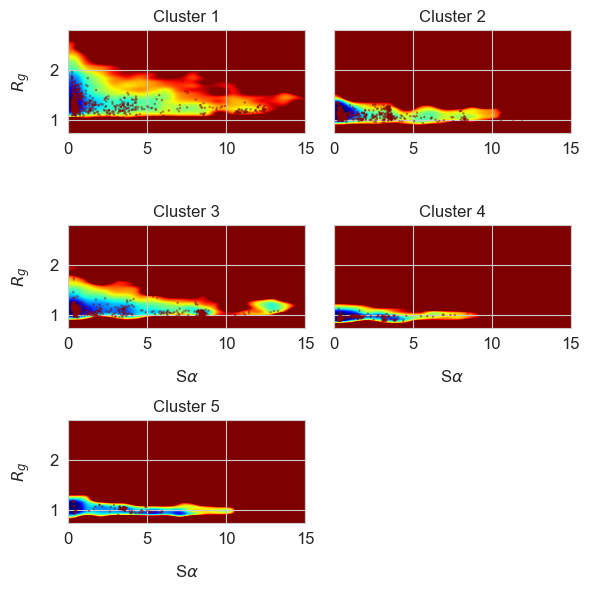

<Figure size 400x300 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(nrows, ncols, figsize=(6, 6), sharey=True)
Rg = np.load(outdir+"/Rg_total" + ".npy")
Sa = np.load(outdir+"/Sa_total" + ".npy")

for i, ax in enumerate(axes.flat):
    if i > n_cluster-2: 
        break
    
    frame_ind = c_dict[i]

    a, xedges, yedges = np.histogram2d(Rg[frame_ind], Sa[frame_ind], 30, [
        [0.5, 2.8], [0, 25.0]], density=True, weights=None)
    a = np.log(np.flipud(a)+.000001)
    T = 300
    a = -(0.001987*T)*a

    in_contact = np.intersect1d(pos_contact,frame_ind)
    ax.scatter(Sa[in_contact], Rg[in_contact], s=3, c="darkred", alpha=0.5, marker="o",edgecolors="None")

    im = ax.imshow(a, interpolation='gaussian', extent=[
        yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap="jet", aspect='auto')
    im.set_clim(0.1, 3)
    ax.set_xlim(0, 15)
    ax.set_ylim(0.75,2.8)
    if i % 2 <1: 
        ax.set_ylabel("$R_g$", size=12, labelpad=12)
    if i > 1: 
        ax.set_xlabel(r'S$\alpha$', size=12, labelpad=12)
    ax.set_title('Cluster %s' % str(i+1), size=12)
    ax.tick_params(axis='both', labelsize=12)
axes.flatten()[-1].set_visible(False)  # Hide the empty subplot
plt.tight_layout()
plt.show()
plt.clf()

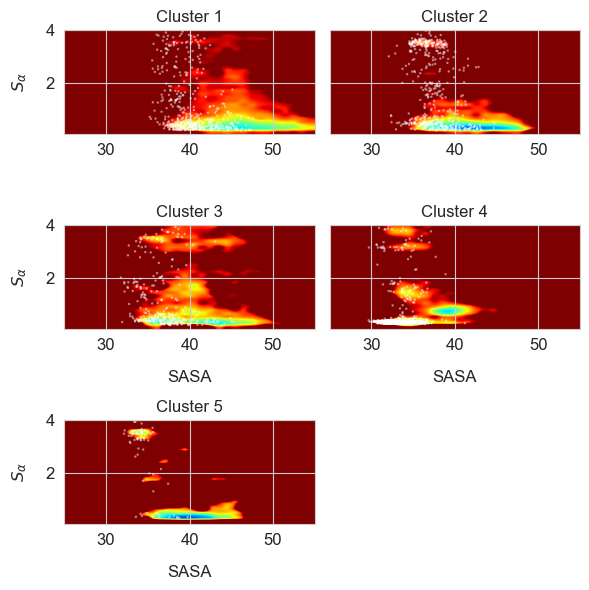

<Figure size 400x300 with 0 Axes>

In [ ]:
n=0
fig, axes = plt.subplots(nrows, ncols, figsize=(6, 6), sharey=True)
Rg = np.load(outdir+"/Rg_total" + ".npy")
solv_sum = np.sum(np.load(outdir+"/sasa.npy"), axis=1)

for i, ax in enumerate(axes.flat):
    if i > n_cluster-2: 
        break
    
    frame_ind = c_dict[i]

    a, xedges, yedges = np.histogram2d(Sa[frame_ind], solv_sum[frame_ind], 30, [
        [0.1, 4], [25, 55.0]], density=True, weights=None)
    a = np.log(np.flipud(a)+.000001)
    T = 300
    a = -(0.001987*T)*a

    in_contact = np.intersect1d(pos_contact,frame_ind)
    ax.scatter(solv_sum[in_contact], Sa[in_contact], s=3, c="white", alpha=0.5, marker="o",edgecolors="None")

    im = ax.imshow(a, interpolation='gaussian', extent=[
        yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap="jet", aspect='auto')
    im.set_clim(0.1, 3)
    ax.set_xlim(25, 55)
    ax.set_ylim(0.1,4)
    if i % 2 <1: 
        ax.set_ylabel("$S_{\\alpha}$", size=12, labelpad=12)
    if i > 1: 
        ax.set_xlabel(r'SASA', size=12, labelpad=12)
    ax.set_title('Cluster %s' % str(i+1), size=12)
    ax.tick_params(axis='both', labelsize=12)

axes.flatten()[-1].set_visible(False)  # Hide the empty subplot
plt.tight_layout()
plt.show()
plt.clf()

### Calculate Ligand Probabilities 

In [ ]:
# calculating for the smaller cooperative bound modes 
for c in range(len(bounds)):
    for n, bound in enumerate(bounds[c]): 
        if len(bound) < 1: 
            continue
        c_file = t_dir+ psystem + "_0.4_bf_centroid_c" + str(c+1) + "_b"+ str(n)+".gro"
        trj_file = t_dir + psystem+ "_0.4_bf_c" + str(c+1)+ "_b"+ str(n) + ".xtc"
        trj_c = md.load(trj_file, top=c_file)

        # compute contacts 
        contact_probability = ligand_contact_probability(trj_c)
        np.save(t_dir+ psystem +"_ligand_contact_array" +"_0.4_bf_c" + str(c+1)+ "_b"+ str(n) + ".dat", contact_probability)        

        # map onto chimera ligands
        make_chimera_lig_contact_file(contact_probability, trj_c, t_dir, psystem + "_"+str(n), c=c, lig_resid=38)

In [ ]:
# compute contacts and get chimera attribute file for all 
contact_probability = ligand_contact_probability(trj)
np.save(outdir+psystem+"_ligand_contact_array" + ".dat", contact_probability)        
# map onto chimera ligands
make_chimera_lig_contact_file(contact_probability, trj, outdir, psystem, c=-1, lig_resid=38)